# Hx vs Hy Plots

In [1]:
%reset -f
import ROOT, numpy
import traceback
from datetime import datetime

from MyCommonAnalysisFunction_richcap import *

import math
import array
import copy

ROOT.TH1.AddDirectory(0)
ROOT.gStyle.SetTitleOffset(1.3,'y')

ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)

print(color.BOLD, "\nStarting RG-A SIDIS Analysis\n", color.END)


# getting current date
datetime_object_full = datetime.now()
# print(datetime_object)

startMin_full = datetime_object_full.minute
startHr_full = datetime_object_full.hour

if(datetime_object_full.minute <10):
    timeMin_full = "".join(["0", str(datetime_object_full.minute)])
else:
    timeMin_full = str(datetime_object_full.minute)

    
Date_Day = "".join(["\nStarted running on ", color.BOLD, str(datetime_object_full.month), "-", str(datetime_object_full.day), "-", str(datetime_object_full.year), color.END, " at "])
# printing current time
if(datetime_object_full.hour > 12 and datetime_object_full.hour < 24):
    print("".join([Date_Day, color.BOLD, str((datetime_object_full.hour)-12), ":", timeMin_full, " p.m.", color.END]))
if(datetime_object_full.hour < 12 and datetime_object_full.hour > 0):
    print("".join([Date_Day, color.BOLD, str(datetime_object_full.hour), ":", timeMin_full, " a.m.", color.END]))
if(datetime_object_full.hour == 12):
    print("".join([Date_Day, color.BOLD, str(datetime_object_full.hour), ":", timeMin_full, " p.m.", color.END]))
if(datetime_object_full.hour == 0 or datetime_object_full.hour == 24):
    print("".join([Date_Day, color.BOLD, "12:", str(timeMin_full), " a.m.", color.END]))
print("")

Welcome to JupyROOT 6.22/06
 
Starting RG-A SIDIS Analysis
 

Started running on 9-4-2024 at 6:19 p.m.



.

.

.

## Load RDataFrames

In [2]:
def FileLocation(FileName, Datatype):
    # location = "/lustre19/expphy/volatile/clas12/richcap/SIDIS_Analysis/Histo_Files_ROOT/"
    location = "Histo_Files_ROOT/"
    if(str(Datatype) == 'rdf'):
        file = "".join(["REAL_Data/SIDIS_epip_Data_REC_", str(FileName), ".root"])
    if(str(Datatype) == 'mdf'):
        file = "".join(["Matching_REC_MC/SIDIS_epip_MC_Matched_", str(FileName), ".root"])
    if(str(Datatype) == 'gdf'):
        file = "".join(["GEN_MC/SIDIS_epip_MC_GEN_", str(FileName), ".root"])
    loading = "".join([location, file])
    return loading





################################################################################################################################################################
##==========##==========##     Names of Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################

Smearing_Options = "no_smear"

Common_Name = "Pass_2_5D_Unfold_Test_V7_All"
# Common_Name = "5D_Unfold_Test_V7_All"

Common_Name = "Pass_2_New_Sector_Cut_Test_V3_All"

Common_Name = "Pass_2_New_Sector_Cut_Test_V4_All"
Common_Name = "Pass_2_New_Sector_Cut_Test_V6_All"
Common_Name = "Pass_2_New_Sector_Cut_Test_V8_All"

Common_Name = "Pass_2_New_Sector_Cut_Test_V9_All"
Common_Name = "Pass_2_New_Sector_Cut_Test_V10_All"

Common_Name = "Pass_2_New_Fiducial_Cut_Test_V1_All"

Common_Name = "Pass_2_New_Fiducial_Cut_Test_V5_All"



Common_Name = "Pass_2_Fiducial_Tests_Only_V1_All"
# Common_Name = "Pass_2_Fiducial_Tests_Only_V3_All"
# Common_Name = "Tagged_Proton_Pass_2_New_Fiducial_Cut_Test_V3_All"
# Common_Name = "Pass_2_New_Fiducial_Cut_Test_V4_All"


Common_Name = "Pass_2_New_Fiducial_Cut_Test_FC0_V7_All"
# Common_Name = "Pass_2_New_Fiducial_Cut_Test_FC5_V7_All"

# # Common_Name = "Tagged_Proton_Pass_2_New_Fiducial_Cut_Test_FC0_V7_All"


Common_Name = "Pass_2_New_Fiducial_Cut_Test_V8_All"


Cut_Configuration_Name = "_FC_11"
Cut_Configuration_Name = "_FC_12"
Cut_Configuration_Name = ""
Common_Name = f"Pass_2_New_Fiducial_Cut_Test{Cut_Configuration_Name}_V9_All"

Standard_Histogram_Title_Addition = ""

Pass_Version = "Pass 2" if("Pass_2" in Common_Name) else "Pass 1"
if(Pass_Version not in [""]):
    if(Standard_Histogram_Title_Addition not in [""]):
        Standard_Histogram_Title_Addition = f"{Pass_Version} - {Standard_Histogram_Title_Addition}"
    else:
        Standard_Histogram_Title_Addition = Pass_Version


print(f"{color.BBLUE}\nRunning with {Pass_Version} files\n\n{color.END}")
        
        
# Use unique file(s) for one of datatypes? (If so, set the following if(...) conditions to 'False')

##################################
##   Real (Experimental) Data   ##
##################################
if(True):
#     print("".join([color.BOLD, "\nNot using the common file name for the Real (Experimental) Data...\n", color.END]))
# if(False):
    REAL_File_Name = Common_Name
#     REAL_File_Name = REAL_File_Name.replace("_V9_All", "_V11_5203")
else:
    REAL_File_Name = "Pass_2_5D_Unfold_Test_V7_All" if(Pass_Version in ["Pass 2"]) else "5D_Unfold_Test_V7_All"
##################################
##   Real (Experimental) Data   ##
##################################

########################################
##   Reconstructed Monte Carlo Data   ##
########################################
if(True):
    print("".join([color.BOLD, "\nNot using the common file name for the Reconstructed Monte Carlo Data...\n", color.END]))
if(False):
    MC_REC_File_Name = Common_Name
else:
    MC_REC_File_Name = "Unsmeared_Pass_2_5D_Unfold_Test_V7_All"      if(Smearing_Options in ["no_smear"]) else "Pass_2_5D_Unfold_Test_V7_All"
#     MC_REC_File_Name = "Unsmeared_Pass_2_New_Sector_Cut_Test_V1_All" if(Smearing_Options in ["no_smear"]) else "Pass_2_New_Sector_Cut_Test_V1_All"
#     MC_REC_File_Name = "Unsmeared_Pass_2_New_Sector_Cut_Test_V2_All" if(Smearing_Options in ["no_smear"]) else "Pass_2_New_Sector_Cut_Test_V2_All"
#     MC_REC_File_Name = "Unsmeared_Pass_2_New_Sector_Cut_Test_V3_All" if(Smearing_Options in ["no_smear"]) else "Pass_2_New_Sector_Cut_Test_V3_All"
    MC_REC_File_Name = "Unsmeared_Pass_2_New_Sector_Cut_Test_V4_All" if(Smearing_Options in ["no_smear"]) else "Pass_2_New_Sector_Cut_Test_V4_All"
    MC_REC_File_Name = "Unsmeared_Pass_2_New_Sector_Cut_Test_V6_All" if(Smearing_Options in ["no_smear"]) else "Pass_2_New_Sector_Cut_Test_V6_All"
    MC_REC_File_Name = f"Unsmeared_{Common_Name}" if(Smearing_Options in ["no_smear"]) else Common_Name
#     MC_REC_File_Name = MC_REC_File_Name.replace("_V9_All", "_V11_All")
    if(Pass_Version not in ["Pass 2"]):
        MC_REC_File_Name = MC_REC_File_Name.replace("Pass_2_", "")
########################################
##   Reconstructed Monte Carlo Data   ##
########################################

####################################
##   Generated Monte Carlo Data   ##
####################################
if(True):
    print("".join([color.BOLD, "\nNot using the common file name for the Generated Monte Carlo Data...\n", color.END]))
if(False):
    MC_GEN_File_Name = Common_Name
else:
    MC_GEN_File_Name = "Gen_Cuts_V2_Fixed_All"
    MC_GEN_File_Name = "Pass_2_New_Sector_Cut_Test_V9_All"
####################################
##   Generated Monte Carlo Data   ##
####################################


################################################################################################################################################################
##==========##==========##     Names of Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################





################################################################################################################################################################
##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################
try:
    rdf = ROOT.TFile(str(FileLocation(str(REAL_File_Name), "rdf")), "READ")
    print("".join(["The total number of histograms available for the", color.BLUE,  " Real (Experimental) Data",       color.END, " in       '", color.BOLD, REAL_File_Name,   color.END, "' is ", color.BOLD, str(len(rdf.GetListOfKeys())), color.END]))
except:
    print("".join([color.Error, "\nERROR IN GETTING THE 'rdf' DATAFRAME...\nTraceback:\n", color.END_R, str(traceback.format_exc()), color.END]))
try:
    mdf = ROOT.TFile(str(FileLocation(str(MC_REC_File_Name), "mdf")), "READ")
    print("".join(["The total number of histograms available for the", color.RED,   " Reconstructed Monte Carlo Data", color.END, " in '",       color.BOLD, MC_REC_File_Name, color.END, "' is ", color.BOLD, str(len(mdf.GetListOfKeys())), color.END]))
except:
    print("".join([color.Error, "\nERROR IN GETTING THE 'mdf' DATAFRAME...\nTraceback:\n", color.END_R, str(traceback.format_exc()), color.END]))
try:
    gdf = ROOT.TFile(str(FileLocation(str(MC_GEN_File_Name), "gdf")), "READ")
    print("".join(["The total number of histograms available for the", color.GREEN, " Generated Monte Carlo Data",     color.END, " in     '",   color.BOLD, MC_GEN_File_Name, color.END, "' is ", color.BOLD, str(len(gdf.GetListOfKeys())), color.END]))
except:
    print("".join([color.Error, "\nERROR IN GETTING THE 'gdf' DATAFRAME...\nTraceback:\n", color.END_R, str(traceback.format_exc()), color.END]))
################################################################################################################################################################
##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################


print(f"{color.BOLD}\nPass Version in use is:{color.END}{color.BLUE} {Pass_Version}{color.END_B}\n\n\nDone Loading RDataFrame files...\n\n{color.END}")


Running with Pass 2 files



Not using the common file name for the Reconstructed Monte Carlo Data...


Not using the common file name for the Generated Monte Carlo Data...

The total number of histograms available for the Real (Experimental) Data in       'Pass_2_New_Fiducial_Cut_Test_FC_12_V9_All' is 426
The total number of histograms available for the Reconstructed Monte Carlo Data in 'Unsmeared_Pass_2_New_Fiducial_Cut_Test_FC_12_V9_All' is 996
The total number of histograms available for the Generated Monte Carlo Data in     'Pass_2_New_Sector_Cut_Test_V9_All' is 416

Pass Version in use is: Pass 2


Done Loading RDataFrame files...




Error in <TList::Clear>: A list is accessing an object (0x55dae60f4760) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x55dae6178840) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x55dae617fc20) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x55dae617ff90) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x55dae6180300) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x55dae6180670) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x55dae6180ba0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x55dae6181040) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x55dae6181410) already deleted (list name = TList)
Error in <TList::Clear>: A l

In [3]:
if(not True):
    # Initialize a TCanvas
    canvas, hist = {}, {}
    Q2_y_bin = "All"
    cut = "'no_cut'"
    # cut = "'cut_Complete_SIDIS'"
    
    dataframe = rdf

    # Loop through the keys and draw histograms containing "MM_pro"
    for key in dataframe.GetListOfKeys():
        histo_name = key.GetName()
        if("MM_pro" in histo_name):
            print(f"{color.RED}histo_name = {histo_name}{color.END}")
    #         canvas[histo_name] = ROOT.TCanvas(f"canvas_{histo_name}", f"Canvas_{histo_name}", 800, 600)
    #         hist[histo_name] = dataframe.Get(histo_name)
    #         hist[histo_name].GetXaxis().SetRange(hist[histo_name].GetXaxis().FindBin(1), hist[histo_name].GetXaxis().FindBin(40))
    #         hist[histo_name].GetYaxis().SetRangeUser(5, 6)
    # #         hist[histo_name].GetZaxis().SetRangeUser(2, 2.5)
    #         hist[histo_name] = hist[histo_name].Project3D("y")
    #         hist[histo_name].Draw("colz")
    #         canvas[histo_name].Update()
    #         canvas[histo_name].Draw()
    # #     elif("pro" in histo_name):
    # #         print(f"histo_name = {histo_name}")
    #     elif(all(include in histo_name for include in ["(Binning-Type='Y_bin'-[Q2-y-Bin=All, z-PT-Bin=All])"]) and all(exclude not in histo_name for exclude in ["Normal_3D", "Data-Cut='no_cut'", "Response_Matrix_Normal_1D"])):
        elif(all(include in histo_name for include in [f"(Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_bin}, z-PT-Bin=All])", f"Data-Cut={cut}"]) and all(exclude not in histo_name for exclude in ["Normal_3D", "Response_Matrix_Normal_1D"])):
            print(f"histo_name = {histo_name}\n{color.BOLD}type = {type(rdf.Get(histo_name))}{color.END}\n")
            canvas[histo_name] = ROOT.TCanvas(f"canvas_{histo_name}", f"Canvas_{histo_name}", 800, 600)
            hist[histo_name] = dataframe.Get(histo_name)
            hist[histo_name].GetXaxis().SetRange(hist[histo_name].GetXaxis().FindBin(1), hist[histo_name].GetXaxis().FindBin(40))
            hist[histo_name] = hist[histo_name].Project3D("yz" if(all(flip not in histo_name for flip in ["Var-D2='elth'", "Var-D2='pipth'", "Var-D1='Hx", "Var-D1='ele_x_DC", "Var-D1='pip_x_DC"])) else "zy")
            hist[histo_name].Draw("colz")
            canvas[histo_name].Update()
            canvas[histo_name].Draw()
        elif(all(include in histo_name for include in ["Normal_3D", "(Binning-Type='Y_bin'-[Q2-y-Bin=All, z-PT-Bin=All])"]) and all(exclude not in histo_name for exclude in ["Data-Cut='no_cut'", "Response_Matrix_Normal_1D"])):
            continue
            print(f"histo_name = {histo_name}\n{color.BOLD}type = {type(rdf.Get(histo_name))}{color.END}\n")
            canvas[histo_name] = ROOT.TCanvas(f"canvas_{histo_name}", f"Canvas_{histo_name}", 800, 600)
            hist[histo_name] = dataframe.Get(histo_name)
            hist[histo_name].Draw("lego")
            canvas[histo_name].Update()
            canvas[histo_name].Draw()

    print("Done")
else:
    print("Cell not set to run...")

Cell not set to run...


.

.

.

## For Comparing any Histogram

In [4]:
if(True):
    # Initialize a TCanvas
    canvas, hist = {}, {}
    Q2_y_bin = "All"
#     Q2_y_bin = "1"
    cut = "'no_cut'"
    # cut = "'cut_Complete_SIDIS'"

    ROOT.gStyle.SetOptStat("i")

    for key in rdf.GetListOfKeys():
        histo_name = key.GetName()
        histo_name_rdf = histo_name
        histo_name_mdf = histo_name_rdf.replace("='rdf'", "='mdf'")
        histo_name_bdf = histo_name_mdf.replace("Normal_2D", "Normal_Background_2D") # For MC Background
        
#         if(all(include in histo_name_rdf for include in [f"(Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_bin}, z-PT-Bin=All])", f"Data-Cut={cut}"]) and all(exclude not in histo_name_rdf for exclude in ["Var-D1='Q2'", "Var-D1='el'", "Var-D1='pip'", "Normal_3D", "Response_Matrix_Normal_1D"])):
#         if(all(include in histo_name_rdf for include in [f"(Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_bin}, z-PT-Bin=All])", f"Data-Cut={cut}"]) and all(exclude not in histo_name_rdf for exclude in ["Normal_3D", "Response_Matrix_Normal_1D"])):
#         if(all(include in histo_name_rdf for include in [f"(Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_bin}, z-PT-Bin=All])", f"Data-Cut={cut}"]) and all(exclude not in histo_name_rdf for exclude in ["Var-D1='Q2'", "Var-D1='el'", "Var-D1='pip'", "Var-D1='Hx", "DC_18", "DC_36", "Normal_3D", "Response_Matrix_Normal_1D"])):
#         if(all(include in histo_name_rdf for include in [f"(Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_bin}, z-PT-Bin=All])", f"Data-Cut={cut}", "_DC_"]) and all(exclude not in histo_name_rdf for exclude in ["Normal_3D", "Response_Matrix_Normal_1D"])):
#         if(all(include in histo_name_rdf for include in [f"(Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_bin}, z-PT-Bin=All])", f"Data-Cut={cut}", "_DC_", "rot"]) and all(exclude not in histo_name_rdf for exclude in ["Normal_3D", "Response_Matrix_Normal_1D"])):
#         if(all(include in histo_name_rdf for include in [f"(Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_bin}, z-PT-Bin=All])", f"Data-Cut={cut}", "_DC_", "rot"]) and all(exclude not in histo_name_rdf for exclude in ["pip", "Normal_3D", "Response_Matrix_Normal_1D"])):
#         if(all(include in histo_name_rdf for include in [f"(Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_bin}, z-PT-Bin=All])", f"Data-Cut={cut}", "_DC_"]) and all(exclude not in histo_name_rdf for exclude in ["Normal_3D", "Response_Matrix_Normal_1D", "DC_18", "DC_36"])):

        if(all(include in histo_name_rdf for include in [f"(Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_bin}, z-PT-Bin=All])", f"Data-Cut={cut}", "pro"]) and all(exclude not in histo_name_rdf for exclude in ["Normal_3D", "Response_Matrix_Normal_1D"])):


            print(f"histo_name_rdf = {histo_name_rdf}\n{color.BOLD}type = {type(rdf.Get(histo_name_rdf))}{color.END}\n")
            # canvas[histo_name_rdf] = ROOT.TCanvas(f"canvas_{histo_name_rdf}", f"Comparison of {histo_name_rdf}", 1200, 400)
            # canvas[histo_name_rdf].Divide(3, 1)
            canvas[histo_name] = Canvas_Create(Name=f"canvas_{histo_name}", Num_Columns=1, Num_Rows=2, Size_X=1200, Size_Y=800, cd_Space=0)
            canvas[histo_name].SetFillColor(17)  # Color index 17 corresponds to a light grey color

            canvas[f"{str(histo_name)}_cd".replace(cut, "'no_cut'")]             = canvas[histo_name].cd(1)
            canvas[f"{str(histo_name)}_cd".replace(cut, "'cut_Complete_SIDIS'")] = canvas[histo_name].cd(2)

            canvas[f"{str(histo_name)}_cd".replace(cut, "'no_cut'")].SetPad(0.05, 0.55, 0.95, 0.95)
            # canvas[f"{str(histo_name)}_cd".replace(cut, "'cut_Complete_SIDIS'")].SetPad(0.05, 0.05, 0.95, 0.55)
            canvas[f"{str(histo_name)}_cd".replace(cut, "'cut_Complete_SIDIS'")].SetPad(0.05, 0.05, 0.95, 0.95)

            canvas[f"{str(histo_name)}_cd".replace(cut, "'no_cut'")].Divide(3, 1)
            canvas[f"{str(histo_name)}_cd".replace(cut, "'cut_Complete_SIDIS'")].Divide(3, 1)



            for cut2 in ["'no_cut'", "'cut_Complete_SIDIS'"]:
                histo_name_rdf = histo_name_rdf.replace(cut, cut2)
                histo_name_mdf = histo_name_mdf.replace(cut, cut2)
                histo_name_bdf = histo_name_bdf.replace(cut, cut2)

                hist[histo_name_rdf] = rdf.Get(histo_name_rdf)
                hist[histo_name_rdf].GetXaxis().SetRange(hist[histo_name_rdf].GetXaxis().FindBin(1), hist[histo_name_rdf].GetXaxis().FindBin(40))
                hist[histo_name_rdf] = hist[histo_name_rdf].Project3D("yz" if(all(flip not in histo_name_rdf for flip in ["Var-D2='elth'", "Var-D2='pipth'", "Var-D1='Hx", "Var-D1='ele_x_DC", "Var-D1='pip_x_DC"])) else "zy")
                hist[histo_name_mdf] = mdf.Get(histo_name_mdf)
                hist[histo_name_mdf].GetXaxis().SetRange(hist[histo_name_mdf].GetXaxis().FindBin(1), hist[histo_name_mdf].GetXaxis().FindBin(40))
                hist[histo_name_mdf] = hist[histo_name_mdf].Project3D("yz" if(all(flip not in histo_name_mdf for flip in ["Var-D2='elth'", "Var-D2='pipth'", "Var-D1='Hx", "Var-D1='ele_x_DC", "Var-D1='pip_x_DC"])) else "zy")
                hist[histo_name_bdf] = mdf.Get(histo_name_bdf)
                hist[histo_name_bdf].GetXaxis().SetRange(hist[histo_name_bdf].GetXaxis().FindBin(1), hist[histo_name_bdf].GetXaxis().FindBin(40))
                hist[histo_name_bdf] = hist[histo_name_bdf].Project3D("yz" if(all(flip not in histo_name_bdf for flip in ["Var-D2='elth'", "Var-D2='pipth'", "Var-D1='Hx", "Var-D1='ele_x_DC", "Var-D1='pip_x_DC"])) else "zy")

#                 hist[histo_name_rdf].RebinX(4)
#                 hist[histo_name_rdf].RebinY(4)
#                 hist[histo_name_mdf].RebinX(4)
#                 hist[histo_name_mdf].RebinY(4)
#                 hist[histo_name_bdf].RebinX(4)
#                 hist[histo_name_bdf].RebinY(4)

                hist[histo_name_rdf].SetTitle(str(str(hist[histo_name_rdf].GetTitle()).replace("yz projection", "")).replace("zy projection", ""))
                hist[histo_name_mdf].SetTitle(str(str(hist[histo_name_mdf].GetTitle()).replace("yz projection", "")).replace("zy projection", ""))
                # hist[histo_name_bdf].SetTitle(str(str(hist[histo_name_bdf].GetTitle()).replace("yz projection", "")).replace("zy projection", ""))
                
                hist[histo_name_mdf].Add(hist[histo_name_bdf])
                
                hist[f"{histo_name_rdf}_norm"] = hist[histo_name_rdf].Clone(f"{histo_name_rdf}_norm")
                hist[f"{histo_name_mdf}_norm"] = hist[histo_name_mdf].Clone(f"{histo_name_mdf}_norm")
                # hist[f"{histo_name_bdf}_norm"] = hist[histo_name_bdf].Clone(f"{histo_name_bdf}_norm")

                if(hist[f"{histo_name_rdf}_norm"].Integral() > 0):
                    hist[f"{histo_name_rdf}_norm"].Scale(1.0 / hist[f"{histo_name_rdf}_norm"].Integral())
                if(hist[f"{histo_name_mdf}_norm"].Integral() > 0):
                    hist[f"{histo_name_mdf}_norm"].Scale(1.0 / hist[f"{histo_name_mdf}_norm"].Integral())

                hist[f"{histo_name_rdf}_diff"] = hist[f"{histo_name_rdf}_norm"].Clone(f"{histo_name_rdf}_diff")
                # hist[f"{histo_name_rdf}_diff"].Add(hist[f"{histo_name_mdf}_norm"], -1)

                for x_bin in range(0,      hist[f"{histo_name_rdf}_diff"].GetNbinsX() + 1):
                    for y_bin in range(0,  hist[f"{histo_name_rdf}_diff"].GetNbinsY() + 1):
                        Histo_rdf_value  = hist[f"{histo_name_rdf}_norm"].GetBinContent(x_bin, y_bin)
                        Histo_mdf_value  = hist[f"{histo_name_mdf}_norm"].GetBinContent(x_bin, y_bin)
                        Histo_rdf_value  = round(Histo_rdf_value, 10)
                        Histo_mdf_value  = round(Histo_mdf_value, 10)
                        if(Histo_rdf_value == 0):
                            percent_diff = 10000 if(Histo_mdf_value != 0) else 0
                        else:
                            percent_diff = (abs(Histo_rdf_value - Histo_mdf_value)/Histo_rdf_value)*100
                        if(percent_diff   < 5):
                            percent_diff  = 0
#                         if(percent_diff   > 200):
#                             percent_diff  = 10000
                        hist[f"{histo_name_rdf}_diff"].SetBinContent(x_bin, y_bin, percent_diff)

                hist[f"{histo_name_rdf}_diff"].SetTitle("Ratio of #frac{rdf - mdf}{rdf}")

                hist[f"{histo_name_rdf}_norm"].GetXaxis().SetRangeUser(-200, 200)
                hist[f"{histo_name_rdf}_norm"].GetYaxis().SetRangeUser(-200, 200)
                hist[f"{histo_name_mdf}_norm"].GetXaxis().SetRangeUser(-200, 200)
                hist[f"{histo_name_mdf}_norm"].GetYaxis().SetRangeUser(-200, 200)
                hist[f"{histo_name_rdf}_diff"].GetXaxis().SetRangeUser(-200, 200)
                hist[f"{histo_name_rdf}_diff"].GetYaxis().SetRangeUser(-200, 200)

                Draw_Canvas(canvas=canvas[f"{str(histo_name.replace(cut, cut2))}_cd"], cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
                hist[f"{histo_name_rdf}_norm"].Draw("colz")
                Draw_Canvas(canvas=canvas[f"{str(histo_name.replace(cut, cut2))}_cd"], cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
                hist[f"{histo_name_mdf}_norm"].Draw("colz")
                Draw_Canvas(canvas=canvas[f"{str(histo_name.replace(cut, cut2))}_cd"], cd_num=3, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
                ROOT.gPad.SetLogz(1)
                hist[f"{histo_name_rdf}_diff"].Draw("colz")

                canvas[histo_name].Update()
            canvas[histo_name].Draw()
        elif(all(include in histo_name_rdf for include in ["Normal_3D", "(Binning-Type='Y_bin'-[Q2-y-Bin=All, z-PT-Bin=All])"]) and all(exclude not in histo_name_rdf for exclude in ["Data-Cut='no_cut'", "Response_Matrix_Normal_1D"])):
            continue
            print(f"histo_name_rdf = {histo_name_rdf}\n{color.BOLD}type = {type(rdf.Get(histo_name_rdf))}{color.END}\n")
            canvas[histo_name_rdf] = ROOT.TCanvas(f"canvas_{histo_name_rdf}", f"Canvas_{histo_name_rdf}", 800, 600)
            hist[histo_name_rdf] = rdf.Get(histo_name_rdf)
            hist[histo_name_rdf].Draw("lego")
            canvas[histo_name_rdf].Update()
            canvas[histo_name_rdf].Draw()

    print("Done")
else:
    print("Cell not set to run...")

Done


histo_name_rdf = ((Histo-Group='Normal_2D'), (Data-Type='rdf'), (Data-Cut='no_cut'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin=All, z-PT-Bin=All]), (Var-D1='ele_x_DC_6'-[NumBins=700, MinBin=-350, MaxBin=350]), (Var-D2='ele_y_DC_6'-[NumBins=700, MinBin=-350, MaxBin=350]))
type = <class cppyy.gbl.TH3D at 0x55dae64d24a0>

histo_name_rdf = ((Histo-Group='Normal_2D'), (Data-Type='rdf'), (Data-Cut='no_cut'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin=All, z-PT-Bin=All]), (Var-D1='ele_x_DC_18'-[NumBins=700, MinBin=-350, MaxBin=350]), (Var-D2='ele_y_DC_18'-[NumBins=700, MinBin=-350, MaxBin=350]))
type = <class cppyy.gbl.TH3D at 0x55dae64d24a0>

histo_name_rdf = ((Histo-Group='Normal_2D'), (Data-Type='rdf'), (Data-Cut='no_cut'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin=All, z-PT-Bin=All]), (Var-D1='ele_x_DC_36'-[NumBins=700, MinBin=-350, MaxBin=350]), (Var-D2='ele_y_DC_36'-[NumBins=700, MinBin=-350, MaxBin=350]))
type = <class cppyy.gbl.TH3D at 0x55dae64d24a0>

histo_name_r

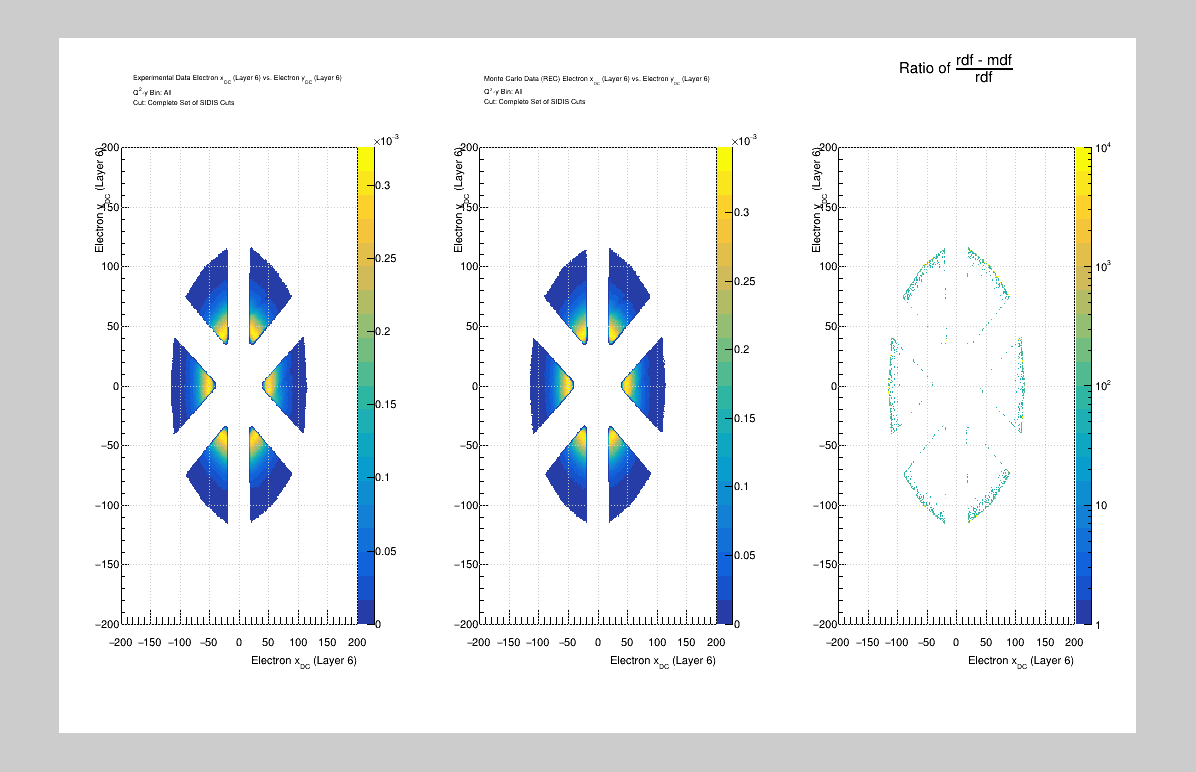

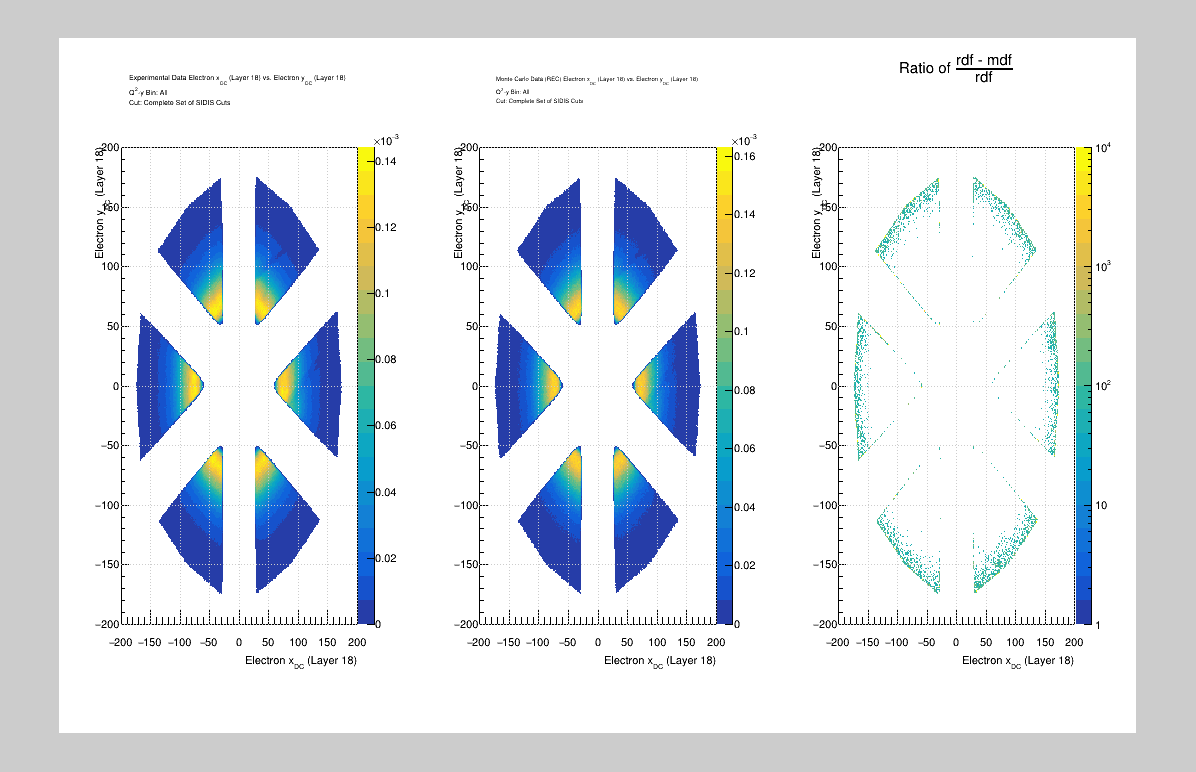

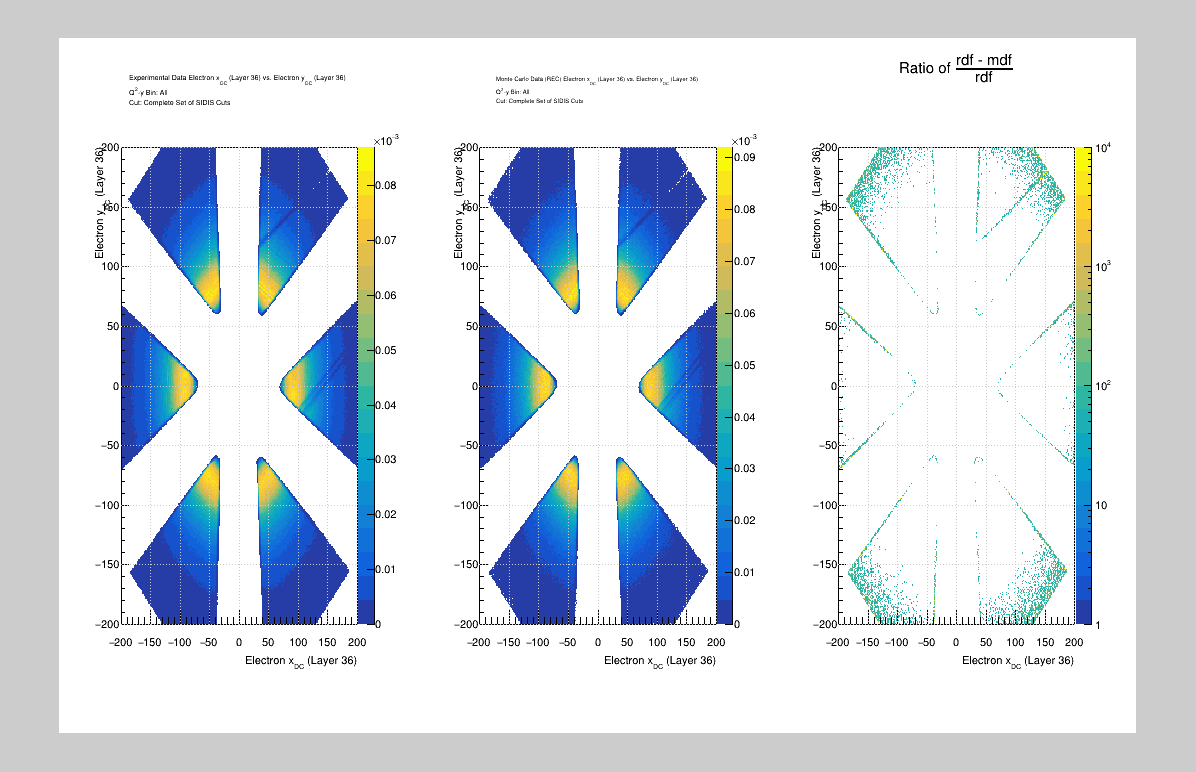

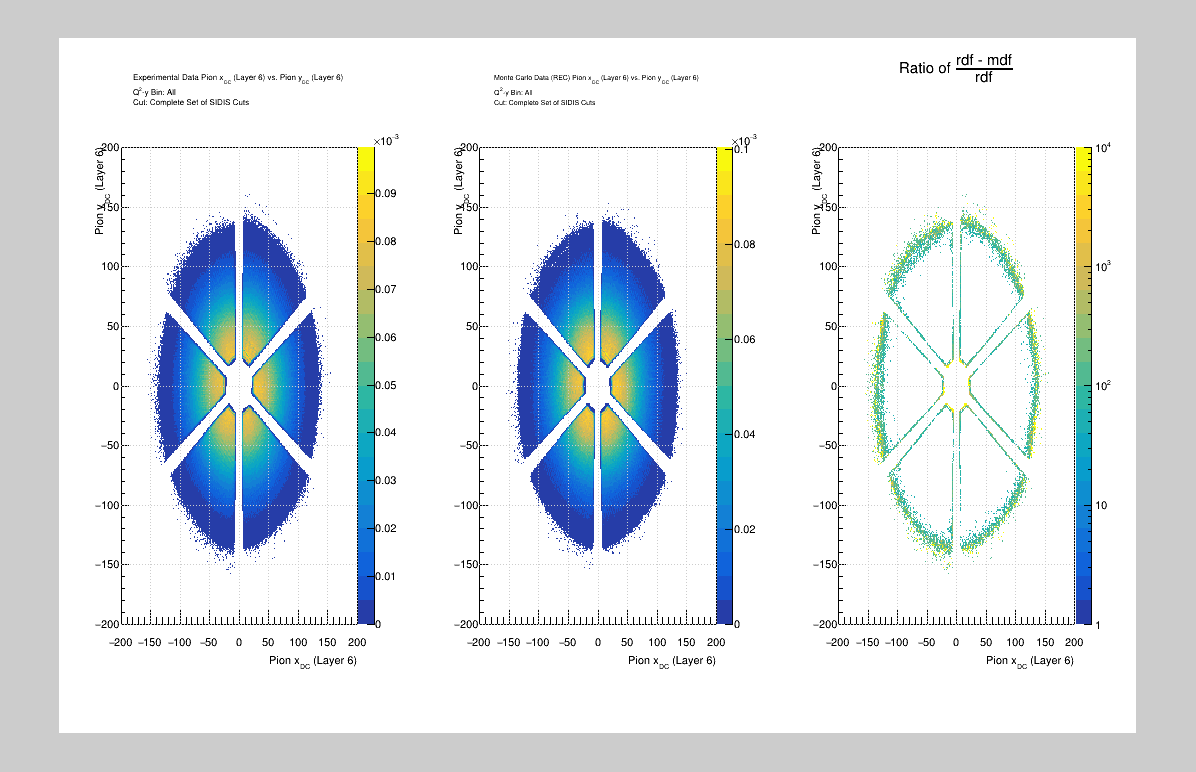

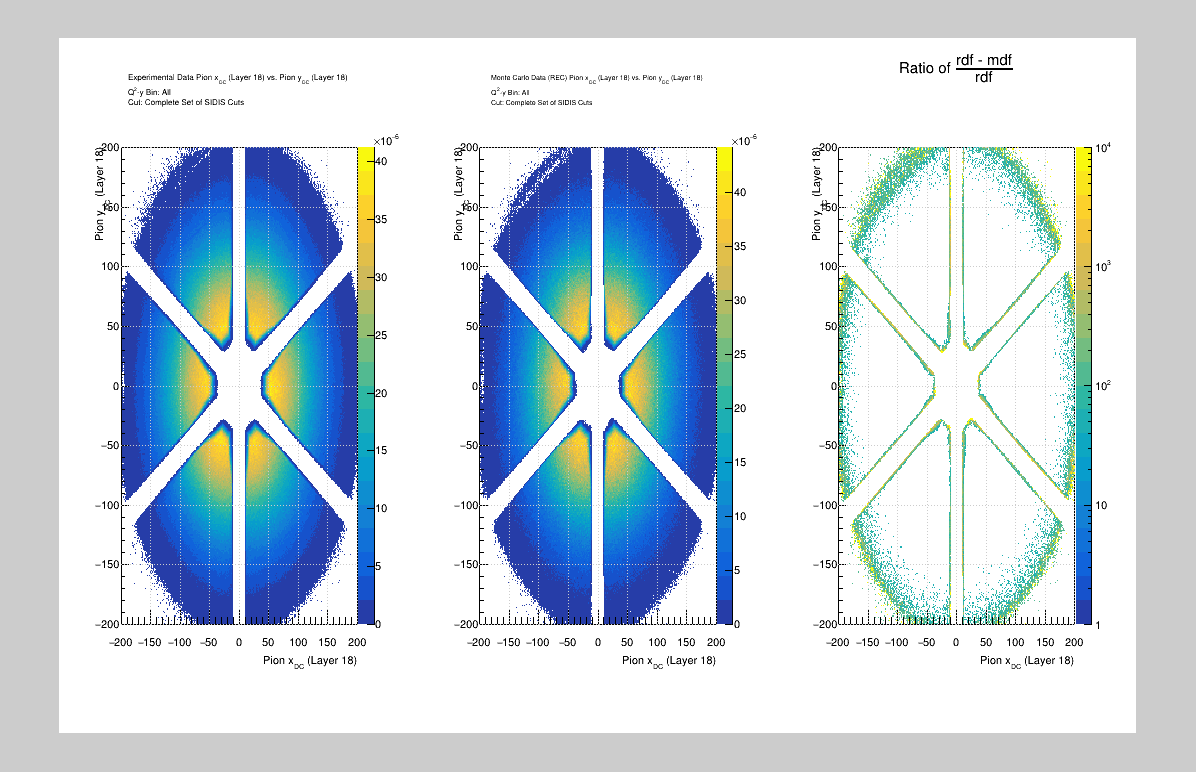

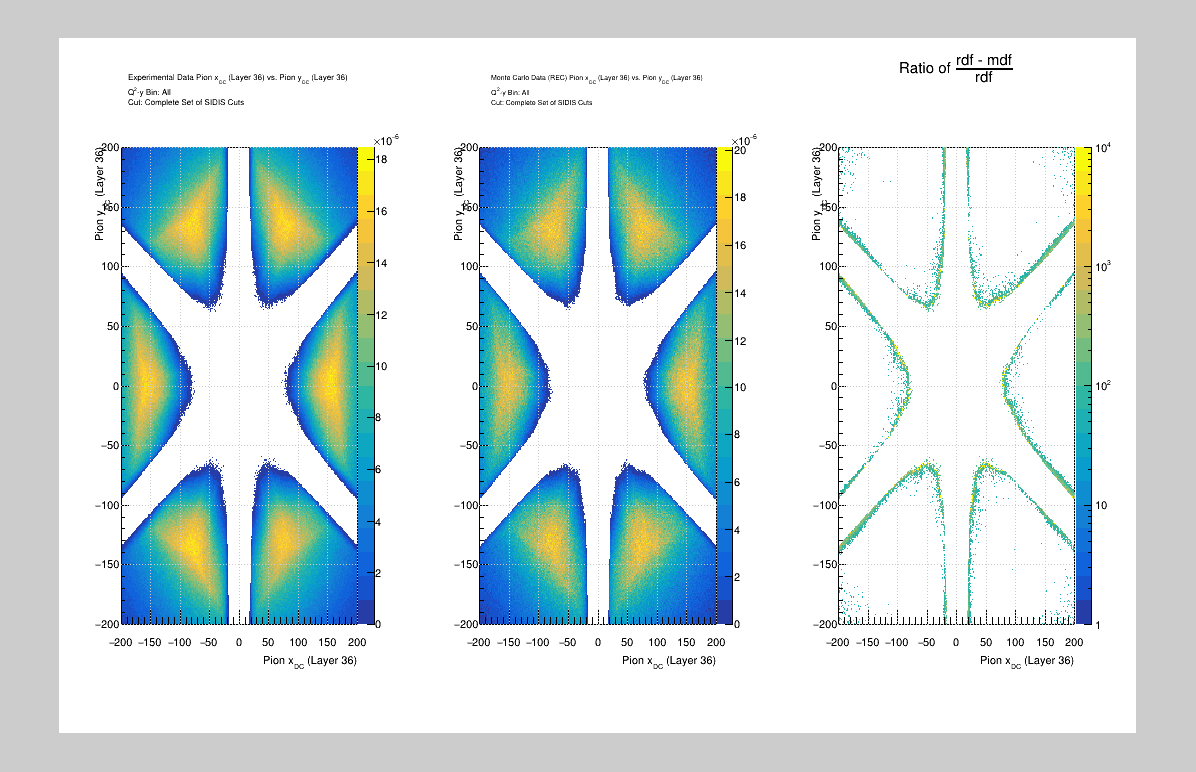

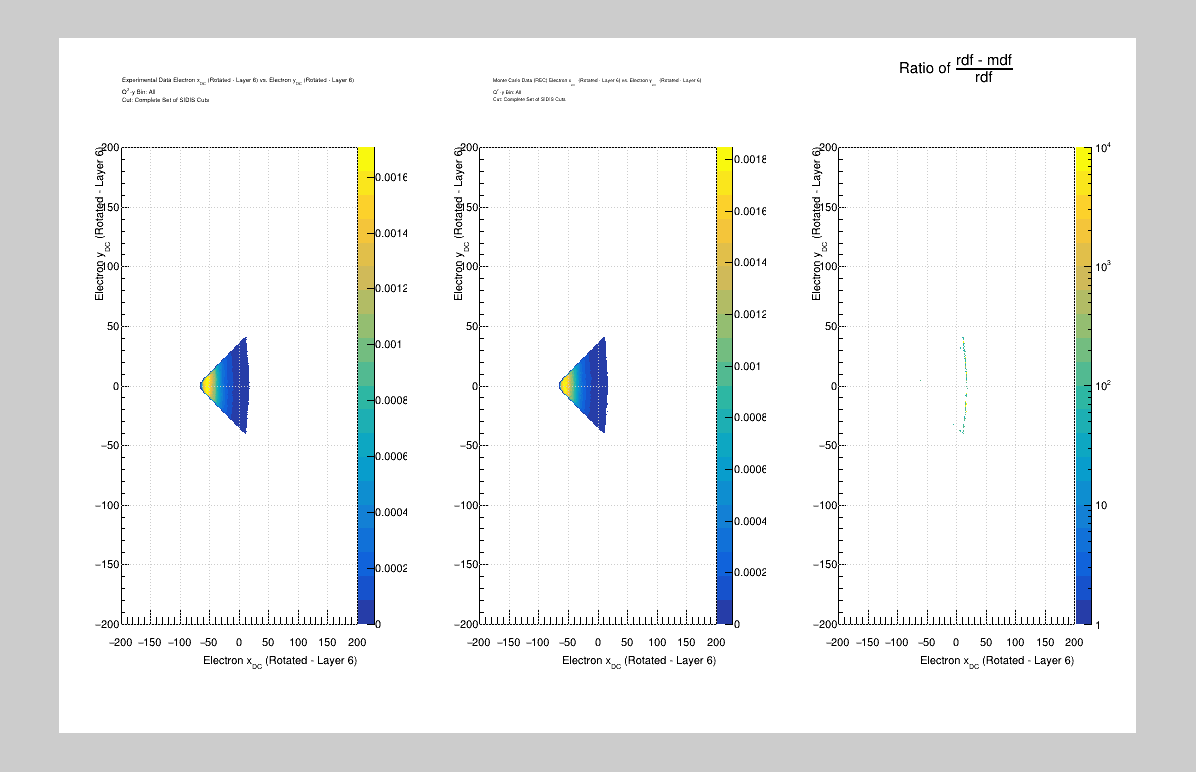

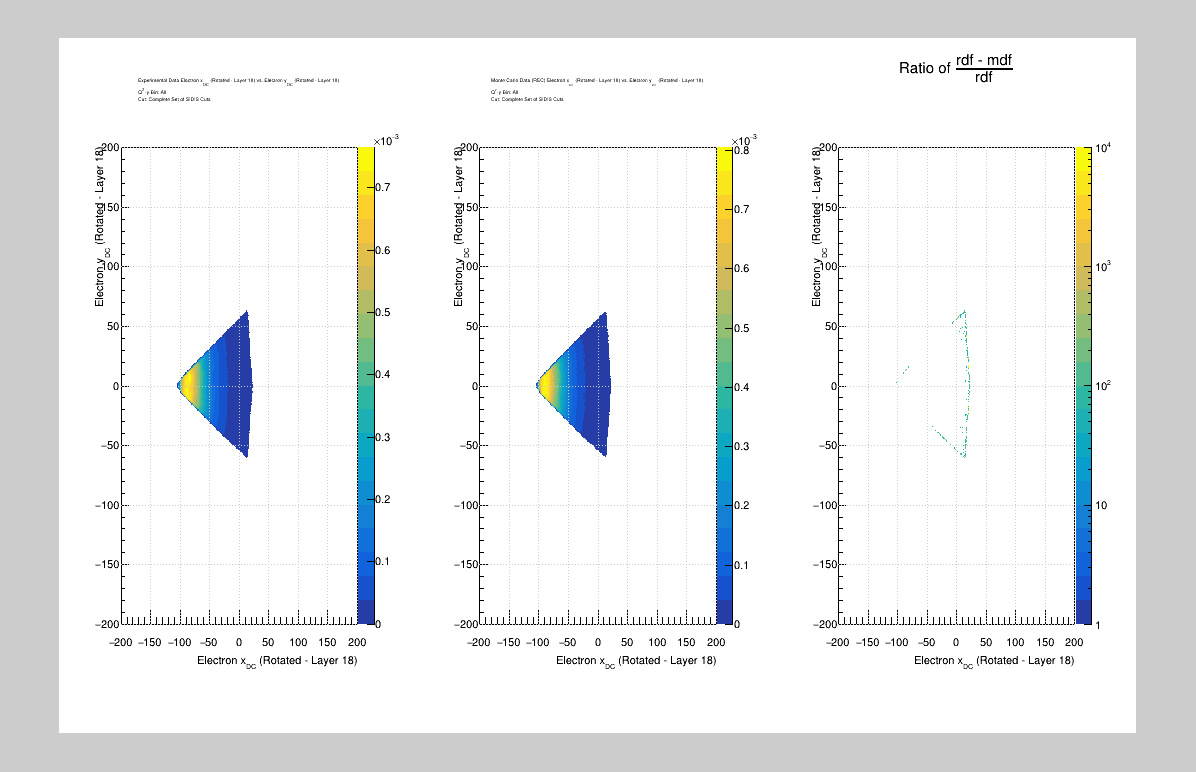

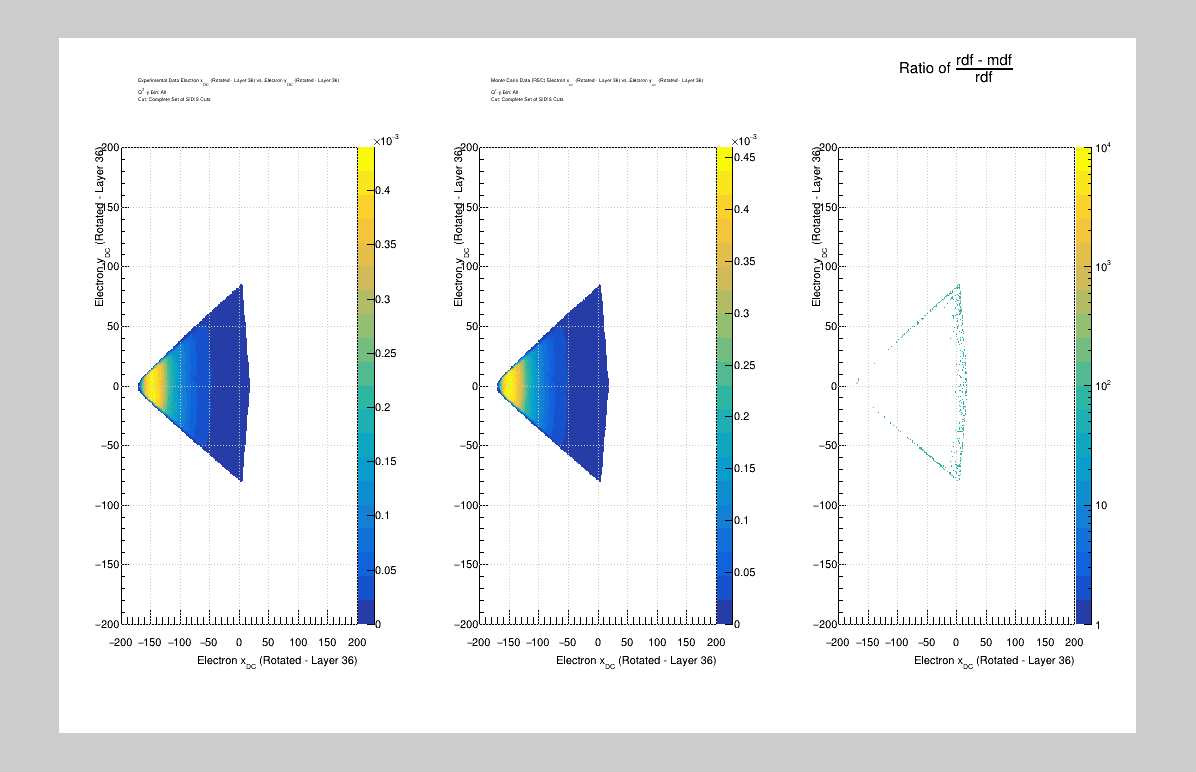

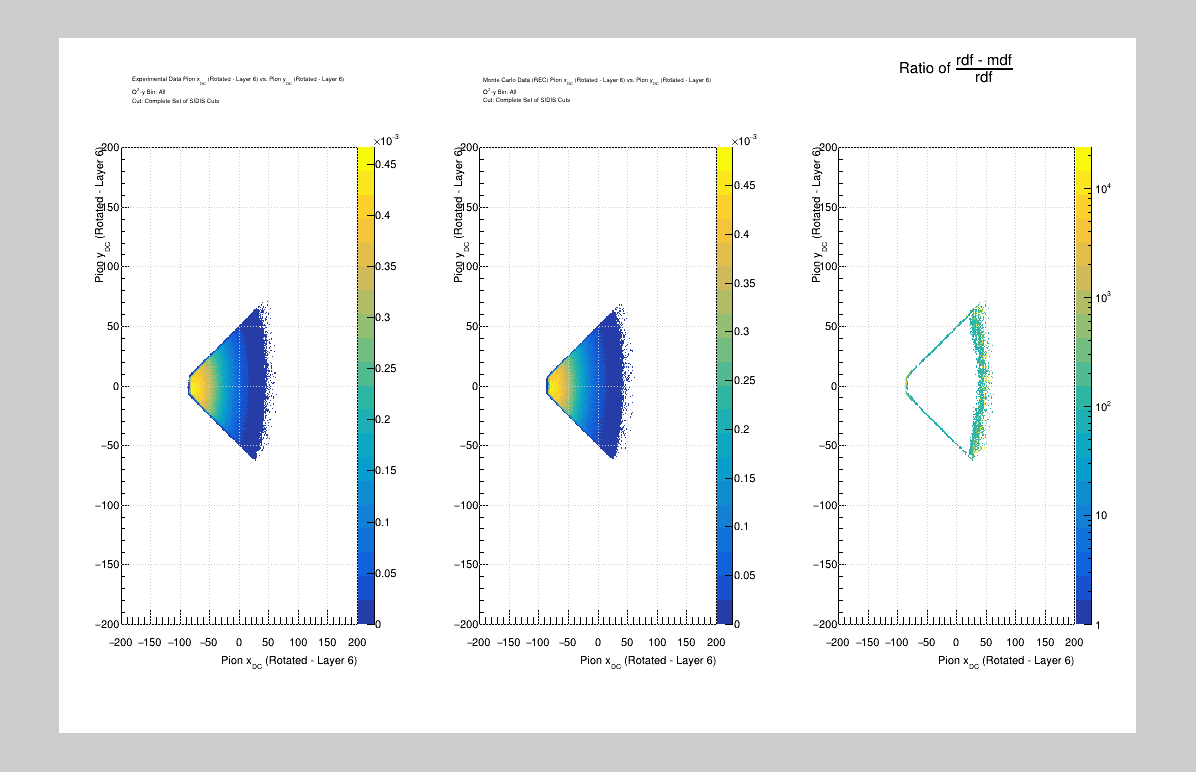

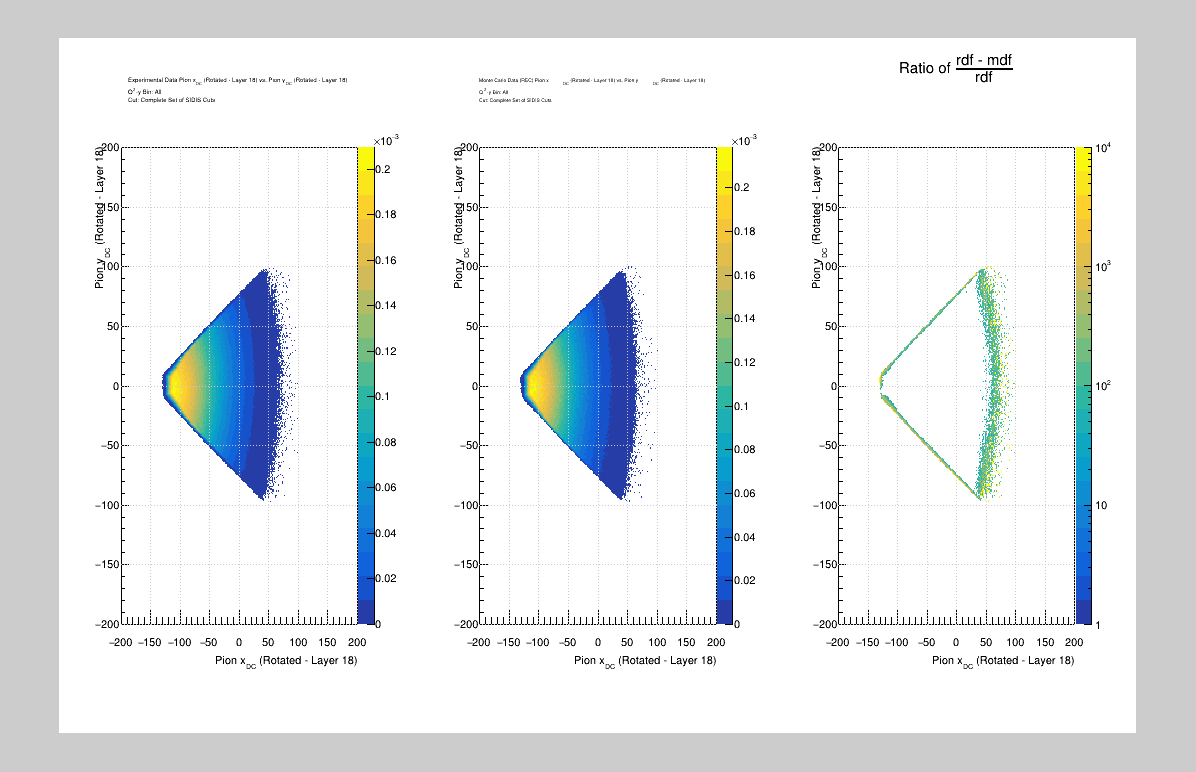

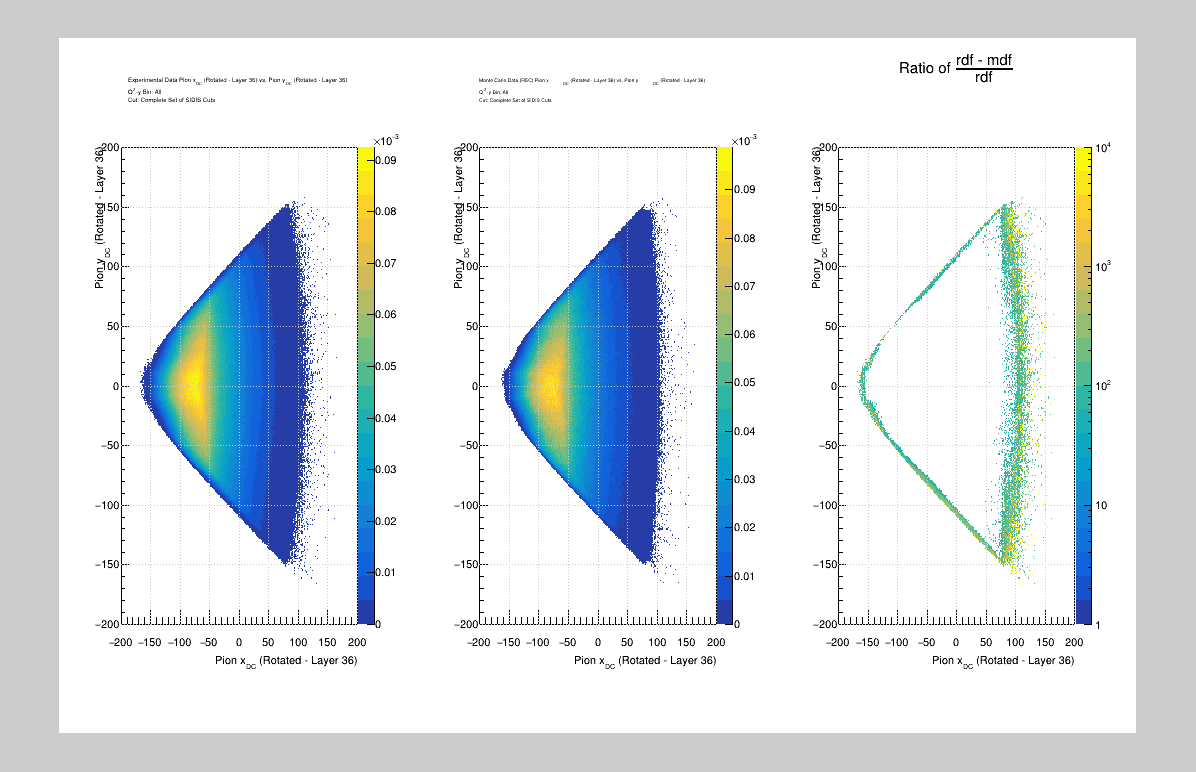

In [22]:
if(True):
    # Initialize a TCanvas
    canvas, hist = {}, {}
    Q2_y_bin = "All"
    # Q2_y_bin = "1"
    cut = "'no_cut'"
    # cut = "'cut_Complete_SIDIS'"
    
    Draw_1D_Q = not True

    ROOT.gStyle.SetOptStat("i")
    
    # Include_List = [f"(Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_bin}, z-PT-Bin=All])", f"Data-Cut={cut}"]
    Include_List = [f"(Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_bin}, z-PT-Bin=All])", f"Data-Cut={cut}", "_DC_"]
#     Include_List = [f"(Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_bin}, z-PT-Bin=All])", f"Data-Cut={cut}", "_DC_", "rot"]
    # Include_List = [f"(Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_bin}, z-PT-Bin=All])", f"Data-Cut={cut}", "pro"]
    
    # Exclude_List = ["Var-D1='Q2'", "Var-D1='el'", "Var-D1='pip'", "Normal_3D", "Response_Matrix_Normal_1D"]
    Exclude_List = ["Normal_3D", "Response_Matrix_Normal_1D"]
    # Exclude_List = ["Var-D1='Q2'", "Var-D1='el'", "Var-D1='pip'", "Var-D1='Hx", "DC_18", "DC_36", "Normal_3D", "Response_Matrix_Normal_1D"]
    # Exclude_List = ["pip", "Normal_3D", "Response_Matrix_Normal_1D"]
    # Exclude_List = ["Normal_3D", "Response_Matrix_Normal_1D", "DC_18", "DC_36"]
    # Exclude_List = ["DC", "Normal_3D", "Response_Matrix_Normal_1D"]
    # Exclude_List = ["Var-D1='Q2'", "Var-D1='el'", "Var-D1='pip'", "Normal_3D", "Response_Matrix_Normal_1D"]
    # Exclude_List = ["Var-D1='Q2'", "Var-D1='z'", "Var-D1='el", "Var-D1='Hx", "rot", "Normal_3D", "Response_Matrix_Normal_1D"]
    # Exclude_List = ["Var-D1='el", "Var-D1='Hx", "rot", "Normal_3D", "Response_Matrix_Normal_1D"]

    for key in rdf.GetListOfKeys():
        histo_name = key.GetName()
        histo_name_rdf = histo_name
        histo_name_mdf = histo_name_rdf.replace("='rdf'", "='mdf'")
        histo_name_bdf = histo_name_mdf.replace("Normal_2D", "Normal_Background_2D") # For MC Background
        # if(all(include in histo_name_rdf for include in [f"(Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_bin}, z-PT-Bin=All])", f"Data-Cut={cut}"]) and all(exclude not in histo_name_rdf for exclude in ["Var-D1='Q2'", "Var-D1='el'", "Var-D1='pip'", "Normal_3D", "Response_Matrix_Normal_1D"])):
        # if(all(include in histo_name_rdf for include in [f"(Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_bin}, z-PT-Bin=All])", f"Data-Cut={cut}"]) and all(exclude not in histo_name_rdf for exclude in ["Normal_3D", "Response_Matrix_Normal_1D"])):
        # if(all(include in histo_name_rdf for include in [f"(Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_bin}, z-PT-Bin=All])", f"Data-Cut={cut}"]) and all(exclude not in histo_name_rdf for exclude in ["Var-D1='Q2'", "Var-D1='el'", "Var-D1='pip'", "Var-D1='Hx", "DC_18", "DC_36", "Normal_3D", "Response_Matrix_Normal_1D"])):
        # if(all(include in histo_name_rdf for include in [f"(Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_bin}, z-PT-Bin=All])", f"Data-Cut={cut}", "_DC_"]) and all(exclude not in histo_name_rdf for exclude in ["Normal_3D", "Response_Matrix_Normal_1D"])):
        # if(all(include in histo_name_rdf for include in [f"(Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_bin}, z-PT-Bin=All])", f"Data-Cut={cut}", "_DC_", "rot"]) and all(exclude not in histo_name_rdf for exclude in ["Normal_3D", "Response_Matrix_Normal_1D"])):
        
#         if(all(include in histo_name_rdf for include in [f"(Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_bin}, z-PT-Bin=All])", f"Data-Cut={cut}", "_DC_", "rot"]) and all(exclude not in histo_name_rdf for exclude in ["pip", "Normal_3D", "Response_Matrix_Normal_1D"])):
#         if(all(include in histo_name_rdf for include in [f"(Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_bin}, z-PT-Bin=All])", f"Data-Cut={cut}", "_DC_", "rot"]) and all(exclude not in histo_name_rdf for exclude in ["Normal_3D", "Response_Matrix_Normal_1D"])):
            
        # if(all(include in histo_name_rdf for include in [f"(Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_bin}, z-PT-Bin=All])", f"Data-Cut={cut}", "_DC_"]) and all(exclude not in histo_name_rdf for exclude in ["Normal_3D", "Response_Matrix_Normal_1D", "DC_18", "DC_36"])):
#         if(all(include in histo_name_rdf for include in [f"(Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_bin}, z-PT-Bin=All])", f"Data-Cut={cut}", "pro"]) and all(exclude not in histo_name_rdf for exclude in ["Normal_3D", "Response_Matrix_Normal_1D"])):

#         if(all(include in histo_name_rdf for include in [f"(Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_bin}, z-PT-Bin=All])", f"Data-Cut={cut}"]) and all(exclude not in histo_name_rdf for exclude in ["DC", "Normal_3D", "Response_Matrix_Normal_1D"])):

#         if(all(include in histo_name_rdf for include in [f"(Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_bin}, z-PT-Bin=All])", f"Data-Cut={cut}"]) and all(exclude not in histo_name_rdf for exclude in ["Var-D1='Q2'", "Var-D1='el'", "Var-D1='pip'", "Normal_3D", "Response_Matrix_Normal_1D"])):
#         if(all(include in histo_name_rdf for include in [f"(Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_bin}, z-PT-Bin=All])", f"Data-Cut={cut}"]) and all(exclude not in histo_name_rdf for exclude in ["Var-D1='Q2'", "Var-D1='z'", "Var-D1='el", "Var-D1='Hx", "rot", "Normal_3D", "Response_Matrix_Normal_1D"])):
#         if(all(include in histo_name_rdf for include in [f"(Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_bin}, z-PT-Bin=All])", f"Data-Cut={cut}"]) and all(exclude not in histo_name_rdf for exclude in ["Var-D1='el", "Var-D1='Hx", "rot", "Normal_3D", "Response_Matrix_Normal_1D"])):

        if(all(include in histo_name_rdf for include in Include_List) and all(exclude not in histo_name_rdf for exclude in Exclude_List)):
        
            print(f"histo_name_rdf = {histo_name_rdf}\n{color.BOLD}type = {type(rdf.Get(histo_name_rdf))}{color.END}\n")
            canvas[histo_name] = Canvas_Create(Name=f"canvas_{histo_name}", Num_Columns=1, Num_Rows=2, Size_X=1200, Size_Y=800, cd_Space=0)
            canvas[histo_name].SetFillColor(17)  # Color index 17 corresponds to a light grey color

            canvas[f"{str(histo_name)}_cd".replace(cut, "'no_cut'")]             = canvas[histo_name].cd(1)
#             canvas[f"{str(histo_name)}_cd".replace(cut, "'cut_Complete_SIDIS_Proton'")] = canvas[histo_name].cd(2)
            canvas[f"{str(histo_name)}_cd".replace(cut, "'cut_Complete_SIDIS'")] = canvas[histo_name].cd(2)

            canvas[f"{str(histo_name)}_cd".replace(cut, "'no_cut'")].SetPad(0.05, 0.55, 0.95, 0.95)
#             canvas[f"{str(histo_name)}_cd".replace(cut, "'cut_Complete_SIDIS_Proton'")].SetPad(0.05, 0.05, 0.95, 0.95)
            canvas[f"{str(histo_name)}_cd".replace(cut, "'cut_Complete_SIDIS'")].SetPad(0.05, 0.05, 0.95, 0.95)
#             canvas[f"{str(histo_name)}_cd".replace(cut, "'cut_Complete_SIDIS'")].SetPad(0.05, 0.05, 0.05, 0.05)
    

            canvas[f"{str(histo_name)}_cd".replace(cut, "'no_cut'")].Divide(3, 1)
#             canvas[f"{str(histo_name)}_cd".replace(cut, "'cut_Complete_SIDIS_Proton'")].Divide(3, 1)
            canvas[f"{str(histo_name)}_cd".replace(cut, "'cut_Complete_SIDIS'")].Divide(3, 1)



#             for cut2 in ["'no_cut'", "'cut_Complete_SIDIS_Proton'"]:
            for cut2 in ["'no_cut'", "'cut_Complete_SIDIS'"]:
                histo_name_rdf = histo_name_rdf.replace(cut, cut2)
                histo_name_mdf = histo_name_mdf.replace(cut, cut2)
                histo_name_bdf = histo_name_bdf.replace(cut, cut2)

                hist[histo_name_rdf] = rdf.Get(histo_name_rdf)
                hist[histo_name_rdf].GetXaxis().SetRange(hist[histo_name_rdf].GetXaxis().FindBin(1), hist[histo_name_rdf].GetXaxis().FindBin(40))
                hist[histo_name_rdf] = hist[histo_name_rdf].Project3D("yz" if(all(flip not in histo_name_rdf for flip in ["Var-D2='elth'", "Var-D2='pipth'", "Var-D1='Hx", "Var-D1='ele_x_DC", "Var-D1='pip_x_DC"])) else "zy")
                hist[histo_name_mdf] = mdf.Get(histo_name_mdf)
                hist[histo_name_mdf].GetXaxis().SetRange(hist[histo_name_mdf].GetXaxis().FindBin(1), hist[histo_name_mdf].GetXaxis().FindBin(40))
                hist[histo_name_mdf] = hist[histo_name_mdf].Project3D("yz" if(all(flip not in histo_name_mdf for flip in ["Var-D2='elth'", "Var-D2='pipth'", "Var-D1='Hx", "Var-D1='ele_x_DC", "Var-D1='pip_x_DC"])) else "zy")
                hist[histo_name_bdf] = mdf.Get(histo_name_bdf)
                hist[histo_name_bdf].GetXaxis().SetRange(hist[histo_name_bdf].GetXaxis().FindBin(1), hist[histo_name_bdf].GetXaxis().FindBin(40))
                hist[histo_name_bdf] = hist[histo_name_bdf].Project3D("yz" if(all(flip not in histo_name_bdf for flip in ["Var-D2='elth'", "Var-D2='pipth'", "Var-D1='Hx", "Var-D1='ele_x_DC", "Var-D1='pip_x_DC"])) else "zy")

#                 hist[histo_name_rdf].RebinX(4)
#                 hist[histo_name_rdf].RebinY(4)
#                 hist[histo_name_mdf].RebinX(4)
#                 hist[histo_name_mdf].RebinY(4)
#                 hist[histo_name_bdf].RebinX(4)
#                 hist[histo_name_bdf].RebinY(4)

                hist[histo_name_rdf].SetTitle(str(str(hist[histo_name_rdf].GetTitle()).replace("yz projection", "")).replace("zy projection", ""))
                hist[histo_name_mdf].SetTitle(str(str(hist[histo_name_mdf].GetTitle()).replace("yz projection", "")).replace("zy projection", ""))
                # hist[histo_name_bdf].SetTitle(str(str(hist[histo_name_bdf].GetTitle()).replace("yz projection", "")).replace("zy projection", ""))
                
                hist[histo_name_mdf].Add(hist[histo_name_bdf])
                
                hist[f"{histo_name_rdf}_norm"] = hist[histo_name_rdf].Clone(f"{histo_name_rdf}_norm")
                hist[f"{histo_name_mdf}_norm"] = hist[histo_name_mdf].Clone(f"{histo_name_mdf}_norm")
                # hist[f"{histo_name_bdf}_norm"] = hist[histo_name_bdf].Clone(f"{histo_name_bdf}_norm")
                

                if(hist[f"{histo_name_rdf}_norm"].Integral() > 0):
                    hist[f"{histo_name_rdf}_norm"].Scale(1.0 / hist[f"{histo_name_rdf}_norm"].Integral())
                if(hist[f"{histo_name_mdf}_norm"].Integral() > 0):
                    hist[f"{histo_name_mdf}_norm"].Scale(1.0 / hist[f"{histo_name_mdf}_norm"].Integral())

                hist[f"{histo_name_rdf}_diff"] = hist[f"{histo_name_rdf}_norm"].Clone(f"{histo_name_rdf}_diff")
                # hist[f"{histo_name_rdf}_diff"].Add(hist[f"{histo_name_mdf}_norm"], -1)

                for x_bin in range(0,      hist[f"{histo_name_rdf}_diff"].GetNbinsX() + 1):
                    for y_bin in range(0,  hist[f"{histo_name_rdf}_diff"].GetNbinsY() + 1):
                        Histo_rdf_value  = hist[f"{histo_name_rdf}_norm"].GetBinContent(x_bin, y_bin)
                        Histo_mdf_value  = hist[f"{histo_name_mdf}_norm"].GetBinContent(x_bin, y_bin)
                        Histo_rdf_value  = round(Histo_rdf_value, 10)
                        Histo_mdf_value  = round(Histo_mdf_value, 10)
                        if(Histo_rdf_value == 0):
                            percent_diff = 10000 if(Histo_mdf_value != 0) else 0
                        else:
                            percent_diff = (abs(Histo_rdf_value - Histo_mdf_value)/Histo_rdf_value)*100
                        if(percent_diff   < 50):
                            percent_diff  = 0
                        # if(percent_diff   > 200):
                        #     percent_diff  = 10000
                        hist[f"{histo_name_rdf}_diff"].SetBinContent(x_bin, y_bin, percent_diff)

                hist[f"{histo_name_rdf}_diff"].SetTitle("Ratio of #frac{rdf - mdf}{rdf}")

                hist[f"{histo_name_rdf}_norm"].GetXaxis().SetRangeUser(-200, 200)
                hist[f"{histo_name_rdf}_norm"].GetYaxis().SetRangeUser(-200, 200)
                hist[f"{histo_name_mdf}_norm"].GetXaxis().SetRangeUser(-200, 200)
                hist[f"{histo_name_mdf}_norm"].GetYaxis().SetRangeUser(-200, 200)
                hist[f"{histo_name_rdf}_diff"].GetXaxis().SetRangeUser(-200, 200)
                hist[f"{histo_name_rdf}_diff"].GetYaxis().SetRangeUser(-200, 200)

                Draw_Canvas(canvas=canvas[f"{str(histo_name.replace(cut, cut2))}_cd"], cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
                hist[f"{histo_name_rdf}_norm"].Draw("colz")
                Draw_Canvas(canvas=canvas[f"{str(histo_name.replace(cut, cut2))}_cd"], cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
                hist[f"{histo_name_mdf}_norm"].Draw("colz")
                Draw_Canvas(canvas=canvas[f"{str(histo_name.replace(cut, cut2))}_cd"], cd_num=3, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
                ROOT.gPad.SetLogz(1)
                hist[f"{histo_name_rdf}_diff"].Draw("colz")

                canvas[histo_name].Update()
                
                if((Draw_1D_Q) and (cut2 in ["'cut_Complete_SIDIS'", "'cut_Complete_SIDIS_Proton'"])):
                    
                    def reset_axis_range(hist_1d_rdf, hist_1d_mdf, hist_1d_dif, Extra_bin_space=10):
                        """Reset the axis range to exclude empty bins at the beginning and end of the histograms."""
                        first_bin = 1
                        last_bin  = hist_1d_rdf.GetNbinsX()
                        # Find the first non-zero bin
                        for i in range(1, hist_1d_rdf.GetNbinsX() + 1):
                            if(hist_1d_rdf.GetBinContent(i) > 0):
                                first_bin = i
                                break
                        # Find the last non-zero bin
                        for i in range(hist_1d_rdf.GetNbinsX(), 0, -1):
                            if(hist_1d_rdf.GetBinContent(i) > 0):
                                last_bin = i
                                break
                        hist_1d_rdf.GetXaxis().SetRange((first_bin - Extra_bin_space) if(first_bin > (Extra_bin_space + 1)) else 1, (last_bin + Extra_bin_space) if(hist_1d_rdf.GetNbinsX() > (last_bin + Extra_bin_space)) else hist_1d_rdf.GetNbinsX())
                        hist_1d_mdf.GetXaxis().SetRange((first_bin - Extra_bin_space) if(first_bin > (Extra_bin_space + 1)) else 1, (last_bin + Extra_bin_space) if(hist_1d_rdf.GetNbinsX() > (last_bin + Extra_bin_space)) else hist_1d_rdf.GetNbinsX())
                        hist_1d_dif.GetXaxis().SetRange((first_bin - Extra_bin_space) if(first_bin > (Extra_bin_space + 1)) else 1, (last_bin + Extra_bin_space) if(hist_1d_rdf.GetNbinsX() > (last_bin + Extra_bin_space)) else hist_1d_rdf.GetNbinsX())
                        
                        
                    for axis in ["x", 'y']:
#                     for axis in ["x"]:
                        canvas[f"{histo_name}_1D_{axis}"] = Canvas_Create(Name=f"canvas_{histo_name}_1D_{axis}", Num_Columns=1, Num_Rows=1, Size_X=1200*2, Size_Y=800*2, cd_Space=0)
                        canvas[f"{histo_name}_1D_{axis}"].SetFillColor(17)  # Color index 17 corresponds to a light grey color

                        canvas[f"{str(histo_name)}_1D_{axis}_cd"] = canvas[f"{histo_name}_1D_{axis}"].cd(1)

                        canvas[f"{str(histo_name)}_1D_{axis}_cd"].SetPad(0.05, 0.05, 0.95, 0.95)
                        canvas[f"{str(histo_name)}_1D_{axis}_cd"].Divide(4, 1)
                        
                        hist[f"{histo_name_rdf}_norm_1D_{axis}"] = hist[f"{histo_name_rdf}_norm"].Clone(f"{histo_name_rdf}_norm_1D_{axis}")
                        hist[f"{histo_name_mdf}_norm_1D_{axis}"] = hist[f"{histo_name_mdf}_norm"].Clone(f"{histo_name_mdf}_norm_1D_{axis}")
                        if(str(axis) in ["x"]):
                            hist[f"{histo_name_rdf}_norm_1D_{axis}"] = hist[f"{histo_name_rdf}_norm_1D_{axis}"].ProjectionX(f"{histo_name_rdf}_norm_1D_{axis}")
                            hist[f"{histo_name_mdf}_norm_1D_{axis}"] = hist[f"{histo_name_mdf}_norm_1D_{axis}"].ProjectionX(f"{histo_name_mdf}_norm_1D_{axis}")
                        else:
                            hist[f"{histo_name_rdf}_norm_1D_{axis}"] = hist[f"{histo_name_rdf}_norm_1D_{axis}"].ProjectionY(f"{histo_name_rdf}_norm_1D_{axis}")
                            hist[f"{histo_name_mdf}_norm_1D_{axis}"] = hist[f"{histo_name_mdf}_norm_1D_{axis}"].ProjectionY(f"{histo_name_mdf}_norm_1D_{axis}")
                            
                            
                        hist[f"{histo_name_rdf}_diff_1D_{axis}"] = hist[f"{histo_name_rdf}_norm_1D_{axis}"].Clone(f"{histo_name_rdf}_diff_1D_{axis}")
                        hist[f"{histo_name_rdf}_diff_1D_{axis}"].Add(hist[f"{histo_name_mdf}_norm_1D_{axis}"], -1)
                        hist[f"{histo_name_rdf}_diff_1D_{axis}"].Divide(hist[f"{histo_name_rdf}_norm_1D_{axis}"])
                        hist[f"{histo_name_rdf}_diff_1D_{axis}"].Scale(100)
                        
                        hist[f"{histo_name_rdf}_diff_1D_{axis}"].SetTitle("Ratio of #frac{rdf - mdf}{rdf}")
                            
                        hist[f"{histo_name_rdf}_norm_1D_{axis}"].SetLineColor(ROOT.kBlue)
                        hist[f"{histo_name_mdf}_norm_1D_{axis}"].SetLineColor(ROOT.kRed)
                        hist[f"{histo_name_rdf}_diff_1D_{axis}"].SetLineColor(ROOT.kGreen)
                        
                        hist[f"{histo_name_rdf}_diff_1D_{axis}"].GetYaxis().SetTitle("% Difference")
                        
#                         reset_axis_range(hist_1d_rdf=hist[f"{histo_name_rdf}_norm_1D_{axis}"], hist_1d_mdf=hist[f"{histo_name_mdf}_norm_1D_{axis}"], hist_1d_dif=hist[f"{histo_name_rdf}_diff_1D_{axis}"])
                            
                        Draw_Canvas(canvas=canvas[f"{str(histo_name)}_1D_{axis}_cd"], cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
                        hist[f"{histo_name_rdf}_norm_1D_{axis}"].Draw("hist E0")
                        Draw_Canvas(canvas=canvas[f"{str(histo_name)}_1D_{axis}_cd"], cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
                        hist[f"{histo_name_mdf}_norm_1D_{axis}"].Draw("hist E0")
                        Draw_Canvas(canvas=canvas[f"{str(histo_name)}_1D_{axis}_cd"], cd_num=3, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
                        hist[f"{histo_name_rdf}_norm_1D_{axis}"].Draw("hist E0 same")
                        hist[f"{histo_name_mdf}_norm_1D_{axis}"].Draw("hist E0 same")
                        Draw_Canvas(canvas=canvas[f"{str(histo_name)}_1D_{axis}_cd"], cd_num=4, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
                        ROOT.gPad.SetLogy(0)
                        hist[f"{histo_name_rdf}_diff_1D_{axis}"].Draw("hist E0")
                        
                        canvas[f"{histo_name}_1D_{axis}"].Update()
                        canvas[f"{histo_name}_1D_{axis}"].Draw()
                    
            if(not Draw_1D_Q):
                canvas[histo_name].Draw()
        elif(all(include in histo_name_rdf for include in ["Normal_3D", "(Binning-Type='Y_bin'-[Q2-y-Bin=All, z-PT-Bin=All])"]) and all(exclude not in histo_name_rdf for exclude in ["Data-Cut='no_cut'", "Response_Matrix_Normal_1D"])):
            continue
            print(f"histo_name_rdf = {histo_name_rdf}\n{color.BOLD}type = {type(rdf.Get(histo_name_rdf))}{color.END}\n")
            canvas[histo_name_rdf] = ROOT.TCanvas(f"canvas_{histo_name_rdf}", f"Canvas_{histo_name_rdf}", 800, 600)
            hist[histo_name_rdf] = rdf.Get(histo_name_rdf)
            hist[histo_name_rdf].Draw("lego")
            canvas[histo_name_rdf].Update()
            canvas[histo_name_rdf].Draw()

    print("Done")
else:
    print("Cell not set to run...")

.

.

.

## For Making DC cuts

#### Cut Defininitions

In [6]:

import ROOT
ROOT.gStyle.SetOptStat("i")

def is_point_in_quadrilateral(x, y, quad, tol=1e-5):
    def cross_product(x1, y1, x2, y2, x3, y3):
        return (x2 - x1) * (y3 - y1) - (y2 - y1) * (x3 - x1)

    inside = True
    for i in range(len(quad)):
        x1, y1 = quad[i]
        x2, y2 = quad[(i + 1) % len(quad)]
        cp = cross_product(x1, y1, x2, y2, x, y)
        if(cp < -tol):
            inside = False
            break
    return inside

def is_point_in_quadrilateral_winding_number(x, y, quad):
    def angle(x1, y1, x2, y2):
        return math.atan2(y2 - y1, x2 - x1)
    winding_number = 0
    for i in range(len(quad)):
        x1, y1 = quad[i]
        x2, y2 = quad[(i + 1) % len(quad)]
        a1 = angle(x, y, x1, y1)
        a2 = angle(x, y, x2, y2)
        angle_diff = a2 - a1
        if(angle_diff > math.pi):
            angle_diff -= 2 * math.pi
        elif(angle_diff < -math.pi):
            angle_diff += 2 * math.pi
        winding_number += angle_diff
    return abs(winding_number) > math.pi


def is_point_in_polygon(x, y, polygon):
    def angle(x1, y1, x2, y2):
        return math.atan2(y2 - y1, x2 - x1)
    winding_number = 0
    num_vertices = len(polygon)
    for i in range(num_vertices):
        x1, y1 = polygon[i]
        x2, y2 = polygon[(i + 1) % num_vertices]
        a1 = angle(x, y, x1, y1)
        a2 = angle(x, y, x2, y2)
        angle_diff = a2 - a1
        if(angle_diff > math.pi):
            angle_diff -= 2 * math.pi
        elif(angle_diff < -math.pi):
            angle_diff += 2 * math.pi
        winding_number += angle_diff

    return abs(winding_number) > math.pi

def apply_cut_on_boxes(histogram, box_borders):
    for binx in range(0, histogram.GetNbinsX() + 2):
        for biny in range(0, histogram.GetNbinsY() + 2):
            x = histogram.GetXaxis().GetBinCenter(binx)
            y = histogram.GetYaxis().GetBinCenter(biny)
            if(any(is_point_in_polygon(x, y, quad) for quad in box_borders)):
                histogram.SetBinContent(binx, biny, 0)  # Set bin content to zero
    return histogram


def apply_circular_cut(histogram, center_x, center_y, radius, radius_inner=False, sector=1):
    """Apply a circular cut and zero out bins outside the circle."""
    for binx in range(0, histogram.GetNbinsX() + 2):
        for biny in range(0, histogram.GetNbinsY() + 2):
            x = histogram.GetXaxis().GetBinCenter(binx)
            y = histogram.GetYaxis().GetBinCenter(biny)
            Cut_Condition = False
            if(Cut_Condition):
                histogram.SetBinContent(binx, biny, 0)  # Set bin content to zero
    return histogram


print("Done")


Done


### Plots for Pions (Not Rotated)

In [7]:
if(not True):
    polygon_sec_1 = {}
    polygon_sec_1["Layer_6"]  = [(0, 0), (130, 75), (130, -75), (0, 0)]
    polygon_sec_1["Layer_6"]  = [(0, 0), (340, 200), (340, -200), (0, 0)]
    polygon_sec_1["Layer_6"].append((24,    0))
    polygon_sec_1["Layer_6"].append((24,   -6))
    polygon_sec_1["Layer_6"].append((111, -54))
    polygon_sec_1["Layer_6"].append((111,  54))
    polygon_sec_1["Layer_6"].append((24,    6))
    polygon_sec_1["Layer_6"].append((24,    0))
    
    
    polygon_sec_1["Layer_18"] = [(0, 0), (210, 125), (210, -125), (0, 0)]
    polygon_sec_1["Layer_18"] = [(0, 0), (340, 200), (340, -200), (0, 0)]
    polygon_sec_1["Layer_18"].append((45,     0))
    polygon_sec_1["Layer_18"].append((50,    -6))
    polygon_sec_1["Layer_18"].append((72,   -25))
    polygon_sec_1["Layer_18"].append((100,  -42))
    polygon_sec_1["Layer_18"].append((166,  -78))
    polygon_sec_1["Layer_18"].append((166,   78))
    polygon_sec_1["Layer_18"].append((150,   70))
    polygon_sec_1["Layer_18"].append((100,   44))
    polygon_sec_1["Layer_18"].append((50,    11))
    polygon_sec_1["Layer_18"].append((45,     0))
    
    polygon_sec_1["Layer_36"] = [(0, 0), (340, 200), (340, -200), (0, 0)]
    polygon_sec_1["Layer_36"].append((85,     0))
    polygon_sec_1["Layer_36"].append((90,    -7))
    polygon_sec_1["Layer_36"].append((100,  -10))
    polygon_sec_1["Layer_36"].append((115,  -35))
    polygon_sec_1["Layer_36"].append((135,  -49))
    polygon_sec_1["Layer_36"].append((218,  -99))
    polygon_sec_1["Layer_36"].append((265, -127))
    polygon_sec_1["Layer_36"].append((265,  130))
    polygon_sec_1["Layer_36"].append((213,  100))
    polygon_sec_1["Layer_36"].append((200,   91))
    polygon_sec_1["Layer_36"].append((160,   68))
    polygon_sec_1["Layer_36"].append((100,   25))
    polygon_sec_1["Layer_36"].append((86,     7))
    polygon_sec_1["Layer_36"].append((85,     0))
    

    polygon_sec_2 = {}
    polygon_sec_2["Layer_6"]  = [(0, 0), (130, 75),  (0, 140), (0, 0)]
    polygon_sec_2["Layer_6"]  = [(0, 0), (340, 200), (0, 350), (0, 0)]
    polygon_sec_2["Layer_6"].append((12,   21))
    polygon_sec_2["Layer_6"].append((8,    24))
    polygon_sec_2["Layer_6"].append((10,  120))
    polygon_sec_2["Layer_6"].append((100,  69))
    polygon_sec_2["Layer_6"].append((17,   19))
    polygon_sec_2["Layer_6"].append((12,   21))
    
    
    polygon_sec_2["Layer_18"] = [(0, 0), (210, 125), (0, 220), (0, 0)]
    polygon_sec_2["Layer_18"] = [(0, 0), (340, 200), (0, 350), (0, 0)]
    polygon_sec_2["Layer_18"].append((22,   38))
    polygon_sec_2["Layer_18"].append((16,   50))
    polygon_sec_2["Layer_18"].append((12,   84))
    polygon_sec_2["Layer_18"].append((12,  175))
    polygon_sec_2["Layer_18"].append((22,  178))
    polygon_sec_2["Layer_18"].append((50,  168))
    polygon_sec_2["Layer_18"].append((100, 141))
    polygon_sec_2["Layer_18"].append((151, 108))
    polygon_sec_2["Layer_18"].append((151, 103))
    polygon_sec_2["Layer_18"].append((100,  73))
    polygon_sec_2["Layer_18"].append((60,   51))
    polygon_sec_2["Layer_18"].append((50,   49))
    polygon_sec_2["Layer_18"].append((28,   38))
    polygon_sec_2["Layer_18"].append((22,   38))
    
    
    polygon_sec_2["Layer_36"] = [(0, 0), (340, 200), (0, 350), (0, 0)]
    polygon_sec_2["Layer_36"].append((40,   75))
    
    polygon_sec_2["Layer_36"].append((32,   90))
#     polygon_sec_2["Layer_36"].append((35,   95))
#     polygon_sec_2["Layer_36"].append((35,   99))
    polygon_sec_2["Layer_36"].append((28,  100))
    polygon_sec_2["Layer_36"].append((22,  130))
    polygon_sec_2["Layer_36"].append((24,  150))
    polygon_sec_2["Layer_36"].append((23,  200))
    polygon_sec_2["Layer_36"].append((22,  250))
    polygon_sec_2["Layer_36"].append((20,  290))
    polygon_sec_2["Layer_36"].append((25,  290))
    polygon_sec_2["Layer_36"].append((100, 250))
    polygon_sec_2["Layer_36"].append((185, 200))    
    polygon_sec_2["Layer_36"].append((200, 190))
    polygon_sec_2["Layer_36"].append((240, 165))
    polygon_sec_2["Layer_36"].append((200, 142))
    polygon_sec_2["Layer_36"].append((150, 113))
    polygon_sec_2["Layer_36"].append((120,  98))
    polygon_sec_2["Layer_36"].append((110,  95))
    polygon_sec_2["Layer_36"].append((105,  97))
    polygon_sec_2["Layer_36"].append((100,  95))
    polygon_sec_2["Layer_36"].append((60,   78))
    polygon_sec_2["Layer_36"].append((50,   70))
    
    
    polygon_sec_2["Layer_36"].append((40,   75))

    polygon_sec_3 = {}
    polygon_sec_3["Layer_6"]  = [(0, 0), (0, 140), (-130, 75), (0, 0)]
    polygon_sec_3["Layer_6"]  = [(0, 0), (0, 350), (-340, 200), (0, 0)]
    polygon_sec_3["Layer_6"].append((-12,   21))
    polygon_sec_3["Layer_6"].append((-17,   18))
    polygon_sec_3["Layer_6"].append((-98,   70))
    polygon_sec_3["Layer_6"].append((-11,  120))
    polygon_sec_3["Layer_6"].append((-8,    24))
    polygon_sec_3["Layer_6"].append((-12,   21))
    
    
    polygon_sec_3["Layer_18"] = [(0, 0), (0, 220), (-210, 125), (0, 0)]
    polygon_sec_3["Layer_18"] = [(0, 0), (0, 350), (-340, 200), (0, 0)]
    polygon_sec_3["Layer_18"].append((-22,    38))
    polygon_sec_3["Layer_18"].append((-30,    35))
    polygon_sec_3["Layer_18"].append((-35,    40))
    polygon_sec_3["Layer_18"].append((-50,    45))
    polygon_sec_3["Layer_18"].append((-80,    61))
    polygon_sec_3["Layer_18"].append((-150,  105))
    polygon_sec_3["Layer_18"].append((-80,   150))
    polygon_sec_3["Layer_18"].append((-14,   180))
    polygon_sec_3["Layer_18"].append((-14,    80))
    polygon_sec_3["Layer_18"].append((-17,    60))
    polygon_sec_3["Layer_18"].append((-18,    42))
    polygon_sec_3["Layer_18"].append((-22,    38))
    
    polygon_sec_3["Layer_36"] = [(0, 0), (0, 350), (-340, 200), (0, 0)]
    polygon_sec_3["Layer_36"].append((-50,    72))
    polygon_sec_3["Layer_36"].append((-40,    80))
    polygon_sec_3["Layer_36"].append((-35,   100))
    polygon_sec_3["Layer_36"].append((-30,   110))
    polygon_sec_3["Layer_36"].append((-30,   150))
    polygon_sec_3["Layer_36"].append((-27,   200))
    polygon_sec_3["Layer_36"].append((-27,   250))
    polygon_sec_3["Layer_36"].append((-27,   285))#
    polygon_sec_3["Layer_36"].append((-100,  245))
    polygon_sec_3["Layer_36"].append((-185,  200))
    polygon_sec_3["Layer_36"].append((-225,  168))#
    polygon_sec_3["Layer_36"].append((-200,  145))
    polygon_sec_3["Layer_36"].append((-150,  116))
    polygon_sec_3["Layer_36"].append((-120,  100))
    polygon_sec_3["Layer_36"].append((-100,   87))
    polygon_sec_3["Layer_36"].append((-54,    71))
    polygon_sec_3["Layer_36"].append((-50,    72))

    polygon_sec_4 = {}
    polygon_sec_4["Layer_6"]  = [(0, 0), (-130, 75), (-130, -75), (0, 0)]
    polygon_sec_4["Layer_6"]  = [(0, 0), (-340, 200), (-340, -200), (0, 0)]
    polygon_sec_4["Layer_6"].append((-24,    0))
    polygon_sec_4["Layer_6"].append((-24,   -6))
    polygon_sec_4["Layer_6"].append((-110, -54))
    polygon_sec_4["Layer_6"].append((-110,  54))
    polygon_sec_4["Layer_6"].append((-24,    6))
    polygon_sec_4["Layer_6"].append((-24,    0))
    
    
    polygon_sec_4["Layer_18"] = [(0, 0), (-210, 125), (-210, -125), (0, 0)]
    polygon_sec_4["Layer_18"] = [(0, 0), (-340, 200), (-340, -200), (0, 0)]
    polygon_sec_4["Layer_18"].append((-40,     0))
    polygon_sec_4["Layer_18"].append((-40,    -5))
    polygon_sec_4["Layer_18"].append((-50,    -8))
    polygon_sec_4["Layer_18"].append((-61,   -18))
    polygon_sec_4["Layer_18"].append((-62,   -21))
    polygon_sec_4["Layer_18"].append((-166,  -80))
    polygon_sec_4["Layer_18"].append((-166,  -78))
    polygon_sec_4["Layer_18"].append((-172,    0))
    polygon_sec_4["Layer_18"].append((-166,   80))
    polygon_sec_4["Layer_18"].append((-150,   70))
    polygon_sec_4["Layer_18"].append((-100,   43))
    polygon_sec_4["Layer_18"].append((-70,    25))
    polygon_sec_4["Layer_18"].append((-65,    20))
    polygon_sec_4["Layer_18"].append((-50,    10))
    polygon_sec_4["Layer_18"].append((-42,     5))
    polygon_sec_4["Layer_18"].append((-40,     0))
    
    polygon_sec_4["Layer_36"] = [(0, 0), (-340, 200), (-340, -200), (0, 0)]
    polygon_sec_4["Layer_36"].append((-85,     0))
    polygon_sec_4["Layer_36"].append((-86,    -7))
    polygon_sec_4["Layer_36"].append((-96,   -15))
    polygon_sec_4["Layer_36"].append((-100,  -25))
    polygon_sec_4["Layer_36"].append((-131,  -49))
    polygon_sec_4["Layer_36"].append((-150,  -61))
    polygon_sec_4["Layer_36"].append((-160,  -67))
    polygon_sec_4["Layer_36"].append((-200,  -90))
    polygon_sec_4["Layer_36"].append((-213,  -99))
    polygon_sec_4["Layer_36"].append((-265, -129))
    polygon_sec_4["Layer_36"].append((-265,  127))
    polygon_sec_4["Layer_36"].append((-218,   99))
    polygon_sec_4["Layer_36"].append((-135,   49))
    polygon_sec_4["Layer_36"].append((-115,   37))
    polygon_sec_4["Layer_36"].append((-100,   18))
    polygon_sec_4["Layer_36"].append((-90,    11))
    
    
    polygon_sec_4["Layer_36"].append((-85,     0))

    polygon_sec_5 = {}
    polygon_sec_5["Layer_6"]  = [(0, 0), (-140, -81), (0, -200), (0, 0)]
    polygon_sec_5["Layer_6"]  = [(0, 0), (-340, -200), (0, -450), (0, 0)]
    polygon_sec_5["Layer_6"].append((-14,   -20))
    polygon_sec_5["Layer_6"].append((-8,    -25))
    polygon_sec_5["Layer_6"].append((-9,    -80))
    polygon_sec_5["Layer_6"].append((-12,   -120))
    polygon_sec_5["Layer_6"].append((-15,   -130))
    polygon_sec_5["Layer_6"].append((-65,   -110))
    polygon_sec_5["Layer_6"].append((-105,  -75))
    polygon_sec_5["Layer_6"].append((-100,  -70))
    polygon_sec_5["Layer_6"].append((-17,   -18))
    polygon_sec_5["Layer_6"].append((-14,   -20))
    
    
    polygon_sec_5["Layer_18"] = [(0, 0), (-210, -125), (0, -270), (0, 0)]    
    polygon_sec_5["Layer_18"] = [(0, 0), (-340, -200), (0, -450), (0, 0)]
    polygon_sec_5["Layer_18"].append((-21,   -35))
    polygon_sec_5["Layer_18"].append((-13,   -38))
    polygon_sec_5["Layer_18"].append((-16,   -45))
    polygon_sec_5["Layer_18"].append((-12,   -60))
    polygon_sec_5["Layer_18"].append((-12,  -200))
    polygon_sec_5["Layer_18"].append((-50,  -190))
    polygon_sec_5["Layer_18"].append((-100, -168))
    polygon_sec_5["Layer_18"].append((-140, -141))
    polygon_sec_5["Layer_18"].append((-160, -115))
    polygon_sec_5["Layer_18"].append((-151, -103))
    polygon_sec_5["Layer_18"].append((-100,  -73))
    polygon_sec_5["Layer_18"].append((-50,   -44))
    polygon_sec_5["Layer_18"].append((-30,   -37))
    polygon_sec_5["Layer_18"].append((-26,   -31))
    polygon_sec_5["Layer_18"].append((-21,   -35))
    
    polygon_sec_5["Layer_36"] = [(0, 0), (-340, -200), (0, -450), (0, 0)]

    polygon_sec_6 = {}
    polygon_sec_6["Layer_6"]  = [(0, 0), (0, -140), (130, -75), (0, 0)]
    polygon_sec_6["Layer_6"]  = [(0, 0), (0, -450), (340, -200), (0, 0)]
    polygon_sec_6["Layer_6"].append((12,   -21))
    polygon_sec_6["Layer_6"].append((17,   -18))
    polygon_sec_6["Layer_6"].append((100,  -69))
    polygon_sec_6["Layer_6"].append((10,  -118))
    polygon_sec_6["Layer_6"].append((8,    -24))
    polygon_sec_6["Layer_6"].append((12,   -21))
    
    
    polygon_sec_6["Layer_18"] = [(0, 0), (0, -210), (210, -125), (0, 0)]
    polygon_sec_6["Layer_18"] = [(0, 0), (0, -450), (340, -200), (0, 0)]
    
    polygon_sec_6["Layer_18"].append((20,   -35))
    polygon_sec_6["Layer_18"].append((27,   -34))
    polygon_sec_6["Layer_18"].append((30,   -35))
    polygon_sec_6["Layer_18"].append((35,   -38))
    polygon_sec_6["Layer_18"].append((50,   -43))
    polygon_sec_6["Layer_18"].append((80,   -61))
    polygon_sec_6["Layer_18"].append((150, -101))
    polygon_sec_6["Layer_18"].append((150, -105))
    polygon_sec_6["Layer_18"].append((80,  -150))
    polygon_sec_6["Layer_18"].append((13,  -180))
    polygon_sec_6["Layer_18"].append((13,   -80))
    polygon_sec_6["Layer_18"].append((17,   -60))
    polygon_sec_6["Layer_18"].append((18,   -42))
    polygon_sec_6["Layer_18"].append((15,   -39))
    polygon_sec_6["Layer_18"].append((20,   -35))

    
    polygon_sec_6["Layer_36"] = [(0, 0), (0, -450), (340, -200), (0, 0)]
    polygon_sec_6["Layer_36"].append((50,    -72))
#     polygon_sec_6["Layer_36"].append((40,    -80))
    polygon_sec_6["Layer_36"].append((38,    -80))
    polygon_sec_6["Layer_36"].append((35,   -100))
    polygon_sec_6["Layer_36"].append((30,   -110))
    polygon_sec_6["Layer_36"].append((30,   -150))
    polygon_sec_6["Layer_36"].append((27,   -200))
    polygon_sec_6["Layer_36"].append((26,   -235))
    polygon_sec_6["Layer_36"].append((25,   -250))
    polygon_sec_6["Layer_36"].append((24,   -285))#
    polygon_sec_6["Layer_36"].append((100,  -245))
    polygon_sec_6["Layer_36"].append((185,  -195))
    polygon_sec_6["Layer_36"].append((235,  -165))#
    polygon_sec_6["Layer_36"].append((230,  -157))
    polygon_sec_6["Layer_36"].append((200,  -141))
    polygon_sec_6["Layer_36"].append((150,  -115))
    polygon_sec_6["Layer_36"].append((120,   -95))
    polygon_sec_6["Layer_36"].append((100,   -85))
    polygon_sec_6["Layer_36"].append((75,    -76))
    polygon_sec_6["Layer_36"].append((54,    -71))
    polygon_sec_6["Layer_36"].append((50,    -72))
    


    Particle = "pip"
    DC_Layer = 36
    for ii in hist:
        if(all(include_item in str(ii) for include_item in ["_diff", "cut_Complete_SIDIS", f"{Particle}_x_DC", f"_{DC_Layer}"])):
    #     if(all(include_item in str(ii) for include_item in ["_diff", "cut_Complete_SIDIS"])):
            print(ii)

            quadrilaterals = []

            radius_inner = False
            SECTOR_List = [1, 2, 3, 4, 5, 6]
            # SECTOR_List = [1, 2, 3, 4, 5, 6, "All"]
            SECTOR_List = ["All"]
#             SECTOR_List = [6]
            
            
            
            
            
            
            
            
            canvas, h1, h2, lines, line_Max, circle = {}, {}, {}, {}, {}, {}
            pl = {}
            text_label = {}
            for SECTOR in SECTOR_List:
                h1[SECTOR] = hist[ii].Clone(f"h1_{SECTOR}")
                # h1[SECTOR] = Histo_rdf_2D.Clone(f"h1_{SECTOR}")
                # h1[SECTOR].Scale(Histo_rdf_Total)

                # h1[SECTOR] = Histo_mdf_2D.Clone(f"h1_{SECTOR}")
                # h1[SECTOR].Scale(Histo_mdf_Total)
                lines[SECTOR] = []
                if(SECTOR in [1, 0, "All"]):
                    quadrilaterals.append(polygon_sec_1[f"Layer_{DC_Layer}"])
                if(SECTOR in [2, 0, "All"]):
                    quadrilaterals.append(polygon_sec_2[f"Layer_{DC_Layer}"])
                if(SECTOR in [3, 0, "All"]):
                    quadrilaterals.append(polygon_sec_3[f"Layer_{DC_Layer}"])
                if(SECTOR in [4, 0, "All"]):
                    quadrilaterals.append(polygon_sec_4[f"Layer_{DC_Layer}"])
                if(SECTOR in [5, 0, "All"]):
                    quadrilaterals.append(polygon_sec_5[f"Layer_{DC_Layer}"])
                if(SECTOR in [6, 0, "All"]):
                    quadrilaterals.append(polygon_sec_6[f"Layer_{DC_Layer}"])

#                 if(DC_Layer in [6]):
#                     h1[SECTOR].GetXaxis().SetRangeUser(-150, 150)
#                     h1[SECTOR].GetYaxis().SetRangeUser(-175, 175)

                    # # Sector 1
                    # h1[SECTOR].GetXaxis().SetRangeUser(0, 150)
                    # h1[SECTOR].GetYaxis().SetRangeUser(-100, 100)

                    # # Sector 2
                    # h1[SECTOR].GetXaxis().SetRangeUser(-50, 150)
                    # h1[SECTOR].GetYaxis().SetRangeUser(0,   150)

                    # # Sector 3
                    # h1[SECTOR].GetXaxis().SetRangeUser(-150, 50)
                    # h1[SECTOR].GetYaxis().SetRangeUser(0,   150)

                    # # Sector 4
                    # h1[SECTOR].GetXaxis().SetRangeUser(-150,   0)
                    # h1[SECTOR].GetYaxis().SetRangeUser(-100, 100)

                    # # Sector 5
                    # h1[SECTOR].GetXaxis().SetRangeUser(-150, 50)
                    # h1[SECTOR].GetYaxis().SetRangeUser(-160,  0)

                    # # Sector 6
                    # h1[SECTOR].GetXaxis().SetRangeUser(-50, 150)
                    # h1[SECTOR].GetYaxis().SetRangeUser(-150,  0)
                    
#                 if(DC_Layer in [18]):
#                     h1[SECTOR].GetXaxis().SetRangeUser(-225, 225)
#                     h1[SECTOR].GetYaxis().SetRangeUser(-250, 300)
                    
                    # h1[SECTOR].GetXaxis().SetRangeUser(-5, 225)
                    # h1[SECTOR].GetYaxis().SetRangeUser(-300, 5)
                    # h1[SECTOR].GetYaxis().SetRangeUser(-100, 100)
                
                if(DC_Layer in [36]):
                    h1[SECTOR].GetXaxis().SetRangeUser(-500, 500)
                    h1[SECTOR].GetYaxis().SetRangeUser(-500, 500)
                    
#                     # Sec 1
#                     h1[SECTOR].GetXaxis().SetRangeUser(-5,   500)
#                     h1[SECTOR].GetYaxis().SetRangeUser(-200, 200)
                    
#                     # Sec 4
#                     h1[SECTOR].GetXaxis().SetRangeUser(-500, 5)
#                     h1[SECTOR].GetYaxis().SetRangeUser(-200, 200)
                    
#                     # Sec 2
#                     h1[SECTOR].GetXaxis().SetRangeUser(-5,   500)
#                     h1[SECTOR].GetYaxis().SetRangeUser(-5,   500)
                    
#                     # Sec 5
#                     h1[SECTOR].GetXaxis().SetRangeUser(-500, 5)
#                     h1[SECTOR].GetYaxis().SetRangeUser(-500, 5)

#                     # Sec 3
#                     h1[SECTOR].GetXaxis().SetRangeUser(-500, 5)
#                     h1[SECTOR].GetYaxis().SetRangeUser(-5, 500)

#                     # Sec 6
#                     h1[SECTOR].GetXaxis().SetRangeUser(-5, 500)
#                     h1[SECTOR].GetYaxis().SetRangeUser(-500, 5)


                h1[SECTOR].SetTitle("".join(["#splitline{Sector ", str(SECTOR), "}{", str(h1[SECTOR].GetTitle()), "}"]))
                h1[SECTOR].SetTitle("".join(["#splitline{Sector ", str(SECTOR), "}{#splitline{#splitline{#scale[1.75]{Normalized % Diff of DCx_{", "#pi+" if(Particle in ["pip"]) else "el", "} vs DCy_{", "#pi+" if(Particle in ["pip"]) else "el", "}}}{#scale[1.5]{Pass Version: #color[4]{Pass 2}}}}{#scale[1.55]{Abs(Data - MC)/Data}}}"]))

                # print(str(h1[SECTOR].GetTitle()))
                h2[SECTOR] = h1[SECTOR].Clone(f"h2_{SECTOR}")

                
                
                
            # #     # Apply the cut
            # #     h2[SECTOR] = apply_circular_cut(h2[SECTOR], center_x, center_y, radius, radius_inner, sector=SECTOR)
#                 h2[SECTOR] = apply_cut_on_boxes(histogram=h2[SECTOR], box_borders=quadrilaterals)




                # h2 = Histo_ratio_2D

                # Draw the histogram
                canvas[SECTOR] = Canvas_Create(Name=f"Name_{SECTOR}", Num_Columns=2, Num_Rows=1, Size_X=2000, Size_Y=1600, cd_Space=0)
                Draw_Canvas(canvas=canvas[SECTOR], cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
                h1[SECTOR].Draw("colz")
                ROOT.gPad.SetLogz(1)
                Draw_Canvas(canvas=canvas[SECTOR], cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
                h2[SECTOR].Draw("COLZ")
                # h2[SECTOR].RebinX(20)
                # h2[SECTOR].RebinY(20)
                ROOT.gPad.SetLogz(1)

        #         print("\tAfter:")
        #         max_x, max_y = print_max_bin_coordinates(h2[SECTOR])


                for CD_NUM in [1, 2]:
                    Draw_Canvas(canvas=canvas[SECTOR], cd_num=CD_NUM, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)

                    try:
                        for ii, polygon in enumerate(quadrilaterals):
                            n_points = len(polygon)
                            pl[(SECTOR, CD_NUM, ii)] = ROOT.TPolyLine(n_points + 1)
                            for i, (x, y) in enumerate(polygon):
                                pl[(SECTOR, CD_NUM, ii)].SetPoint(i, x, y)
                                # Add a label for the point
                                text_label[(SECTOR, CD_NUM, ii, i)] = ROOT.TText(x, y, f"P{i+1}: ({x}, {y})")
                                # text_label[(SECTOR, CD_NUM, ii, i)] = ROOT.TText(x, y, f"({x}, {y})")
                                text_label[(SECTOR, CD_NUM, ii, i)].SetTextSize(0.0115)        # Adjust the size as needed
                                text_label[(SECTOR, CD_NUM, ii, i)].SetTextAlign(12)           # Align left and vertically centered
                                text_label[(SECTOR, CD_NUM, ii, i)].SetTextColor(ROOT.kBlack)  # Set text color
                                text_label[(SECTOR, CD_NUM, ii, i)].SetTextAngle(90 if(i%2 != 0) else 45)
                                if((SECTOR not in ["All"]) and (not True)):
                                    text_label[(SECTOR, CD_NUM, ii, i)].Draw("same")
                            # Close the shape by repeating the first point
                            pl[(SECTOR, CD_NUM, ii)].SetPoint(n_points, polygon[0][0], polygon[0][1])
                            pl[(SECTOR, CD_NUM, ii)].SetLineColor(2)  # Red color
                            pl[(SECTOR, CD_NUM, ii)].SetLineWidth(1)
                            pl[(SECTOR, CD_NUM, ii)].Draw("same")
                        canvas[SECTOR].Update()
                    except:
                        print("ERROR in box.Draw('same')")

                ROOT.gStyle.SetOptStat("i")
                canvas[SECTOR].Update()
                canvas[SECTOR].Draw()
    print("Done")
else:
    print(f"{color.RED}\nNOT RUNNING THIS CELL\n{color.END}")


NOT RUNNING THIS CELL



### Plots for Pions (Rotated)

In [8]:
if(not True):
    
    def apply_cut_on_boxes(histogram, box_borders):
        for binx in range(0, histogram.GetNbinsX() + 2):
            for biny in range(0, histogram.GetNbinsY() + 2):
                x = histogram.GetXaxis().GetBinCenter(binx)
                y = histogram.GetYaxis().GetBinCenter(biny)
                if(not (any(is_point_in_polygon(x, y, quad) for quad in box_borders))):
                    histogram.SetBinContent(binx, biny, 0)  # Set bin content to zero
        return histogram
    
    polygon = {}
    polygon["Layer_6"]  = [(-83, 0), (-83, -5), (21, -58)]
    polygon["Layer_6"].append((21, -45))
    polygon["Layer_6"].append((25, -40))
    polygon["Layer_6"].append((30, -20))
    polygon["Layer_6"].append((35,   0))
    polygon["Layer_6"].append((35,  20))
    polygon["Layer_6"].append((25,  40))
    polygon["Layer_6"].append((20,  58))
    polygon["Layer_6"].append((-83,  6))
    polygon["Layer_6"].append((-83,  0))
    
    polygon["Layer_18"] = [(-127, 0), (-127, -7), (-120, -7), (-100, -19), (-50, -48), (0, -74), (21, -84), (30, -85)]
    polygon["Layer_18"].append((35,  -70))
    polygon["Layer_18"].append((40,  -50))
    polygon["Layer_18"].append((54,    0))
    polygon["Layer_18"].append((50,   40))
    polygon["Layer_18"].append((40,   60))
    polygon["Layer_18"].append((30,   85))
    polygon["Layer_18"].append((32,   91))#
    polygon["Layer_18"].append((0,    75))
    polygon["Layer_18"].append((-100, 22))
    polygon["Layer_18"].append((-120,  8))
    polygon["Layer_18"].append((-126,  8))
    
    polygon["Layer_18"].append((-127,  0))
    
    polygon["Layer_36"] = [(-151, 0), (-150, -10), (-140, -12), (-120, -32), (-100, -46), (-50, -72), (0, -101), (50, -130), (70, -140)]
    polygon["Layer_36"].append((75,  -110))
    polygon["Layer_36"].append((75,   -85))
    polygon["Layer_36"].append((85,   -50))
    polygon["Layer_36"].append((95,     0))
    polygon["Layer_36"].append((85,    50))
    polygon["Layer_36"].append((75,   100))
    polygon["Layer_36"].append((75,   110))
    polygon["Layer_36"].append((75,   145))
    polygon["Layer_36"].append((0,    105))
    polygon["Layer_36"].append((-50,   75))
    polygon["Layer_36"].append((-75,   65))
    polygon["Layer_36"].append((-100,  50))
    polygon["Layer_36"].append((-120,  42))
    polygon["Layer_36"].append((-145,  15))
    polygon["Layer_36"].append((-150,  10))
    
    polygon["Layer_36"].append((-151, 0))


    Particle = "pip"
    DC_Layer = 36
    for ii in hist:
        if(all(include_item in str(ii) for include_item in ["_diff", "cut_Complete_SIDIS", f"{Particle}_x_DC", "rot", f"_{DC_Layer}"])):
            print(ii)
            quadrilaterals = []            
            canvas, h1, h2, lines, line_Max, circle = {}, {}, {}, {}, {}, {}
            pl = {}
            text_label = {}
            SECTOR = "All"
            
            h1[SECTOR] = hist[ii].Clone(f"h1_{SECTOR}")
            # h1[SECTOR] = Histo_rdf_2D.Clone(f"h1_{SECTOR}")
            # h1[SECTOR].Scale(Histo_rdf_Total)

            # h1[SECTOR] = Histo_mdf_2D.Clone(f"h1_{SECTOR}")
            # h1[SECTOR].Scale(Histo_mdf_Total)
            lines[SECTOR] = []
            
            quadrilaterals.append(polygon[f"Layer_{DC_Layer}"])
            
            if(DC_Layer in [6]):
                h1[SECTOR].GetXaxis().SetRangeUser(-100, 100)
                h1[SECTOR].GetYaxis().SetRangeUser(-100, 100)

            if(DC_Layer in [18]):
                h1[SECTOR].GetXaxis().SetRangeUser(-150, 100)
                h1[SECTOR].GetYaxis().SetRangeUser(-110, 110)

            if(DC_Layer in [36]):
                h1[SECTOR].GetXaxis().SetRangeUser(-200, 200)
                h1[SECTOR].GetYaxis().SetRangeUser(-200, 200)

            h1[SECTOR].SetTitle("".join(["#splitline{Sector ", str(SECTOR), "}{", str(h1[SECTOR].GetTitle()), "}"]))
            h1[SECTOR].SetTitle("".join(["#splitline{Sector ", str(SECTOR), "}{#splitline{#splitline{#scale[1.75]{Normalized % Diff of DCx_{", "#pi+" if(Particle in ["pip"]) else "el", "} vs DCy_{", "#pi+" if(Particle in ["pip"]) else "el", "}}}{#scale[1.5]{Pass Version: #color[4]{Pass 2}}}}{#scale[1.55]{Abs(Data - MC)/Data}}}"]))

            # print(str(h1[SECTOR].GetTitle()))
            h2[SECTOR] = h1[SECTOR].Clone(f"h2_{SECTOR}")




            # # # Apply the cut
            # # h2[SECTOR] = apply_circular_cut(h2[SECTOR], center_x, center_y, radius, radius_inner, sector=SECTOR)
#             h2[SECTOR] = apply_cut_on_boxes(histogram=h2[SECTOR], box_borders=quadrilaterals)

            # h2 = Histo_ratio_2D

            # Draw the histogram
            canvas[SECTOR] = Canvas_Create(Name=f"Name_{SECTOR}", Num_Columns=2, Num_Rows=1, Size_X=2000, Size_Y=1600, cd_Space=0)
            Draw_Canvas(canvas=canvas[SECTOR], cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
            h1[SECTOR].Draw("colz")
            ROOT.gPad.SetLogz(1)
            Draw_Canvas(canvas=canvas[SECTOR], cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
            h2[SECTOR].Draw("COLZ")
            # h2[SECTOR].RebinX(20)
            # h2[SECTOR].RebinY(20)
            ROOT.gPad.SetLogz(1)

    #         print("\tAfter:")
    #         max_x, max_y = print_max_bin_coordinates(h2[SECTOR])


            for CD_NUM in [1, 2]:
                Draw_Canvas(canvas=canvas[SECTOR], cd_num=CD_NUM, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)

                try:
                    for ii, polygon_ii in enumerate(quadrilaterals):
                        n_points = len(polygon_ii)
                        pl[(SECTOR, CD_NUM, ii)] = ROOT.TPolyLine(n_points + 1)
                        for i, (x, y) in enumerate(polygon_ii):
                            pl[(SECTOR, CD_NUM, ii)].SetPoint(i, x, y)
                            # Add a label for the point
                            text_label[(SECTOR, CD_NUM, ii, i)] = ROOT.TText(x, y, f"P{i+1}: ({x}, {y})")
                            # text_label[(SECTOR, CD_NUM, ii, i)] = ROOT.TText(x, y, f"({x}, {y})")
                            text_label[(SECTOR, CD_NUM, ii, i)].SetTextSize(0.0115)        # Adjust the size as needed
                            text_label[(SECTOR, CD_NUM, ii, i)].SetTextAlign(12)           # Align left and vertically centered
                            text_label[(SECTOR, CD_NUM, ii, i)].SetTextColor(ROOT.kBlack)  # Set text color
                            text_label[(SECTOR, CD_NUM, ii, i)].SetTextAngle(90 if(i%2 != 0) else 45)
                            if((SECTOR not in ["All"]) and (not True)):
                                text_label[(SECTOR, CD_NUM, ii, i)].Draw("same")
                        # Close the shape by repeating the first point
                        pl[(SECTOR, CD_NUM, ii)].SetPoint(n_points, polygon_ii[0][0], polygon_ii[0][1])
                        pl[(SECTOR, CD_NUM, ii)].SetLineColor(2)  # Red color
                        pl[(SECTOR, CD_NUM, ii)].SetLineWidth(1)
                        pl[(SECTOR, CD_NUM, ii)].Draw("same")
                    canvas[SECTOR].Update()
                except:
                    print("ERROR in box.Draw('same')")

            ROOT.gStyle.SetOptStat("i")
            canvas[SECTOR].Update()
            canvas[SECTOR].Draw()
            
    print(f"""{color.BOLD}
    
    
def is_point_in_polygon(x, y, polygon):
    def angle(x1, y1, x2, y2):
        return math.atan2(y2 - y1, x2 - x1)
    winding_number = 0
    num_vertices = len(polygon)
    for i in range(num_vertices):
        x1, y1 = polygon[i]
        x2, y2 = polygon[(i + 1) % num_vertices]
        a1 = angle(x, y, x1, y1)
        a2 = angle(x, y, x2, y2)
        angle_diff = a2 - a1
        if(angle_diff > math.pi):
            angle_diff -= 2 * math.pi
        elif(angle_diff < -math.pi):
            angle_diff += 2 * math.pi
        winding_number += angle_diff
      
Polygon_Layers = {polygon}


{color.END}""")
            
            
    print("Done")
else:
    print(f"{color.RED}\nNOT RUNNING THIS CELL\n{color.END}")
    def apply_cut_on_boxes(histogram, box_borders):
        for binx in range(0, histogram.GetNbinsX() + 2):
            for biny in range(0, histogram.GetNbinsY() + 2):
                x = histogram.GetXaxis().GetBinCenter(binx)
                y = histogram.GetYaxis().GetBinCenter(biny)
                if(any(is_point_in_polygon(x, y, quad) for quad in box_borders)):
                    histogram.SetBinContent(binx, biny, 0)  # Set bin content to zero
        return histogram


NOT RUNNING THIS CELL



In [9]:
# Stop

.

.

### Plots for Electrons

In [10]:
if(not True):
    polygon_sec_1 = {}
    polygon_sec_1["Layer_6"]  = []

    polygon_sec_1["Layer_18"] = []
    polygon_sec_1["Layer_36"] = []

    polygon_sec_2 = {}
    polygon_sec_2["Layer_6"]  = []
    polygon_sec_2["Layer_18"] = []
    polygon_sec_2["Layer_36"] = []

    polygon_sec_3 = {}
    polygon_sec_3["Layer_6"]  = []
    polygon_sec_3["Layer_18"] = []
    polygon_sec_3["Layer_36"] = []

    polygon_sec_4 = {}
    polygon_sec_4["Layer_6"]  = []

    polygon_sec_4["Layer_18"] = []
    polygon_sec_4["Layer_36"] = []

    polygon_sec_5 = {}
    polygon_sec_5["Layer_6"]  = []

    polygon_sec_5["Layer_18"] = []
    polygon_sec_5["Layer_36"] = []

    polygon_sec_6 = {}
    polygon_sec_6["Layer_6"]  = []
    polygon_sec_6["Layer_18"] = []
    polygon_sec_6["Layer_36"] = []


    Particle = "ele"
    DC_Layer = 6
    for ii in hist:
        if(all(include_item in str(ii) for include_item in ["_diff", "cut_Complete_SIDIS", f"{Particle}_x_DC", f"_{DC_Layer}"])):
    #     if(all(include_item in str(ii) for include_item in ["_diff", "cut_Complete_SIDIS"])):
            print(ii)

            quadrilaterals = []

            radius_inner = False
            SECTOR_List = [1, 2, 3, 4, 5, 6]
            # SECTOR_List = [1, 2, 3, 4, 5, 6, "All"]
            SECTOR_List = ["All"]
    #         SECTOR_List = [4]
            canvas, h1, h2, lines, line_Max, circle = {}, {}, {}, {}, {}, {}
            pl = {}
            text_label = {}
            for SECTOR in SECTOR_List:
                h1[SECTOR] = hist[ii].Clone(f"h1_{SECTOR}")
                # h1[SECTOR] = Histo_rdf_2D.Clone(f"h1_{SECTOR}")
                # h1[SECTOR].Scale(Histo_rdf_Total)

                # h1[SECTOR] = Histo_mdf_2D.Clone(f"h1_{SECTOR}")
                # h1[SECTOR].Scale(Histo_mdf_Total)
                lines[SECTOR] = []
                if(SECTOR in [1, 0, "All"]):
                    quadrilaterals.append(polygon_sec_1[f"Layer_{DC_Layer}"])
                if(SECTOR in [2, 0, "All"]):
                    quadrilaterals.append(polygon_sec_2[f"Layer_{DC_Layer}"])
                if(SECTOR in [3, 0, "All"]):
                    quadrilaterals.append(polygon_sec_3[f"Layer_{DC_Layer}"])
                if(SECTOR in [4, 0, "All"]):
                    quadrilaterals.append(polygon_sec_4[f"Layer_{DC_Layer}"])
                if(SECTOR in [5, 0, "All"]):
                    quadrilaterals.append(polygon_sec_5[f"Layer_{DC_Layer}"])
                if(SECTOR in [6, 0, "All"]):
                    quadrilaterals.append(polygon_sec_6[f"Layer_{DC_Layer}"])

                if(DC_Layer in [6]):
                    h1[SECTOR].GetXaxis().SetRangeUser(-150, 150)
                    h1[SECTOR].GetYaxis().SetRangeUser(-175, 175)

                    # # Sector 1
                    # h1[SECTOR].GetXaxis().SetRangeUser(0, 150)
                    # h1[SECTOR].GetYaxis().SetRangeUser(-100, 100)

                    # # Sector 2
                    # h1[SECTOR].GetXaxis().SetRangeUser(-50, 150)
                    # h1[SECTOR].GetYaxis().SetRangeUser(0,   150)

                    # # Sector 3
                    # h1[SECTOR].GetXaxis().SetRangeUser(-150, 50)
                    # h1[SECTOR].GetYaxis().SetRangeUser(0,   150)

                    # # Sector 4
                    # h1[SECTOR].GetXaxis().SetRangeUser(-150,   0)
                    # h1[SECTOR].GetYaxis().SetRangeUser(-100, 100)

                    # # Sector 5
                    # h1[SECTOR].GetXaxis().SetRangeUser(-150, 50)
                    # h1[SECTOR].GetYaxis().SetRangeUser(-160,  0)

                    # # Sector 6
                    # h1[SECTOR].GetXaxis().SetRangeUser(-50, 150)
                    # h1[SECTOR].GetYaxis().SetRangeUser(-150,  0)


                h1[SECTOR].SetTitle("".join(["#splitline{Sector ", str(SECTOR), "}{", str(h1[SECTOR].GetTitle()), "}"]))
                h1[SECTOR].SetTitle("".join(["#splitline{Sector ", str(SECTOR), "}{#splitline{#splitline{#scale[1.75]{Normalized % Diff of DCx_{", "#pi+" if(Particle in ["pip"]) else "el", "} vs DCy_{", "#pi+" if(Particle in ["pip"]) else "el", "}}}{#scale[1.5]{Pass Version: #color[4]{Pass 2}}}}{#scale[1.55]{Abs(Data - MC)/Data}}}"]))

                # print(str(h1[SECTOR].GetTitle()))
                h2[SECTOR] = h1[SECTOR].Clone(f"h2_{SECTOR}")

            #     # Apply the cut
            #     h2[SECTOR] = apply_circular_cut(h2[SECTOR], center_x, center_y, radius, radius_inner, sector=SECTOR)
                h2[SECTOR] = apply_cut_on_boxes(histogram=h2[SECTOR], box_borders=quadrilaterals)

                # h2 = Histo_ratio_2D

                # Draw the histogram
                canvas[SECTOR] = Canvas_Create(Name=f"Name_{SECTOR}", Num_Columns=2, Num_Rows=1, Size_X=2000, Size_Y=1600, cd_Space=0)
                Draw_Canvas(canvas=canvas[SECTOR], cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
                h1[SECTOR].Draw("colz")
                ROOT.gPad.SetLogz(1)
                Draw_Canvas(canvas=canvas[SECTOR], cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
                h2[SECTOR].Draw("COLZ")
                # h2[SECTOR].RebinX(20)
                # h2[SECTOR].RebinY(20)
                ROOT.gPad.SetLogz(1)

        #         print("\tAfter:")
        #         max_x, max_y = print_max_bin_coordinates(h2[SECTOR])


                for CD_NUM in [1, 2]:
                    Draw_Canvas(canvas=canvas[SECTOR], cd_num=CD_NUM, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)

                    try:
                        for ii, polygon in enumerate(quadrilaterals):
                            n_points = len(polygon)
                            pl[(SECTOR, CD_NUM, ii)] = ROOT.TPolyLine(n_points + 1)
                            for i, (x, y) in enumerate(polygon):
                                pl[(SECTOR, CD_NUM, ii)].SetPoint(i, x, y)
                                # Add a label for the point
                                text_label[(SECTOR, CD_NUM, ii, i)] = ROOT.TText(x, y, f"P{i+1}: ({x}, {y})")
                                # text_label[(SECTOR, CD_NUM, ii, i)] = ROOT.TText(x, y, f"({x}, {y})")
                                text_label[(SECTOR, CD_NUM, ii, i)].SetTextSize(0.0115)        # Adjust the size as needed
                                text_label[(SECTOR, CD_NUM, ii, i)].SetTextAlign(12)           # Align left and vertically centered
                                text_label[(SECTOR, CD_NUM, ii, i)].SetTextColor(ROOT.kBlack)  # Set text color
                                text_label[(SECTOR, CD_NUM, ii, i)].SetTextAngle(90 if(i%2 != 0) else 45)
                                if((SECTOR not in ["All"]) and (not True)):
                                    text_label[(SECTOR, CD_NUM, ii, i)].Draw("same")
                            # Close the shape by repeating the first point
                            pl[(SECTOR, CD_NUM, ii)].SetPoint(n_points, polygon[0][0], polygon[0][1])
                            pl[(SECTOR, CD_NUM, ii)].SetLineColor(2)  # Red color
                            pl[(SECTOR, CD_NUM, ii)].SetLineWidth(1)
                            pl[(SECTOR, CD_NUM, ii)].Draw("same")
                        canvas[SECTOR].Update()
                    except:
                        print("ERROR in box.Draw('same')")

                ROOT.gStyle.SetOptStat("i")
                canvas[SECTOR].Update()
                canvas[SECTOR].Draw()
                
    print("Done")
                
else:
    print(f"{color.RED}\nNOT RUNNING THIS CELL\n{color.END}")



NOT RUNNING THIS CELL



### Plots for Electrons (Rotated)

((Histo-Group='Normal_2D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin=All, z-PT-Bin=All]), (Var-D1='pip_x_DC_6_rot'-[NumBins=700, MinBin=-350, MaxBin=350]), (Var-D2='pip_y_DC_6_rot'-[NumBins=700, MinBin=-350, MaxBin=350]))_diff
((Histo-Group='Normal_2D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin=All, z-PT-Bin=All]), (Var-D1='pip_x_DC_18_rot'-[NumBins=700, MinBin=-350, MaxBin=350]), (Var-D2='pip_y_DC_18_rot'-[NumBins=700, MinBin=-350, MaxBin=350]))_diff
((Histo-Group='Normal_2D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin=All, z-PT-Bin=All]), (Var-D1='pip_x_DC_36_rot'-[NumBins=700, MinBin=-350, MaxBin=350]), (Var-D2='pip_y_DC_36_rot'-[NumBins=700, MinBin=-350, MaxBin=350]))_diff

    
auto Polygon_Layers = std::map<std::string, std::vector<std::pair<double, double>>>{
	{"Layer_6__ele",	{{-65,	0},	{-65,	-3},	{13,

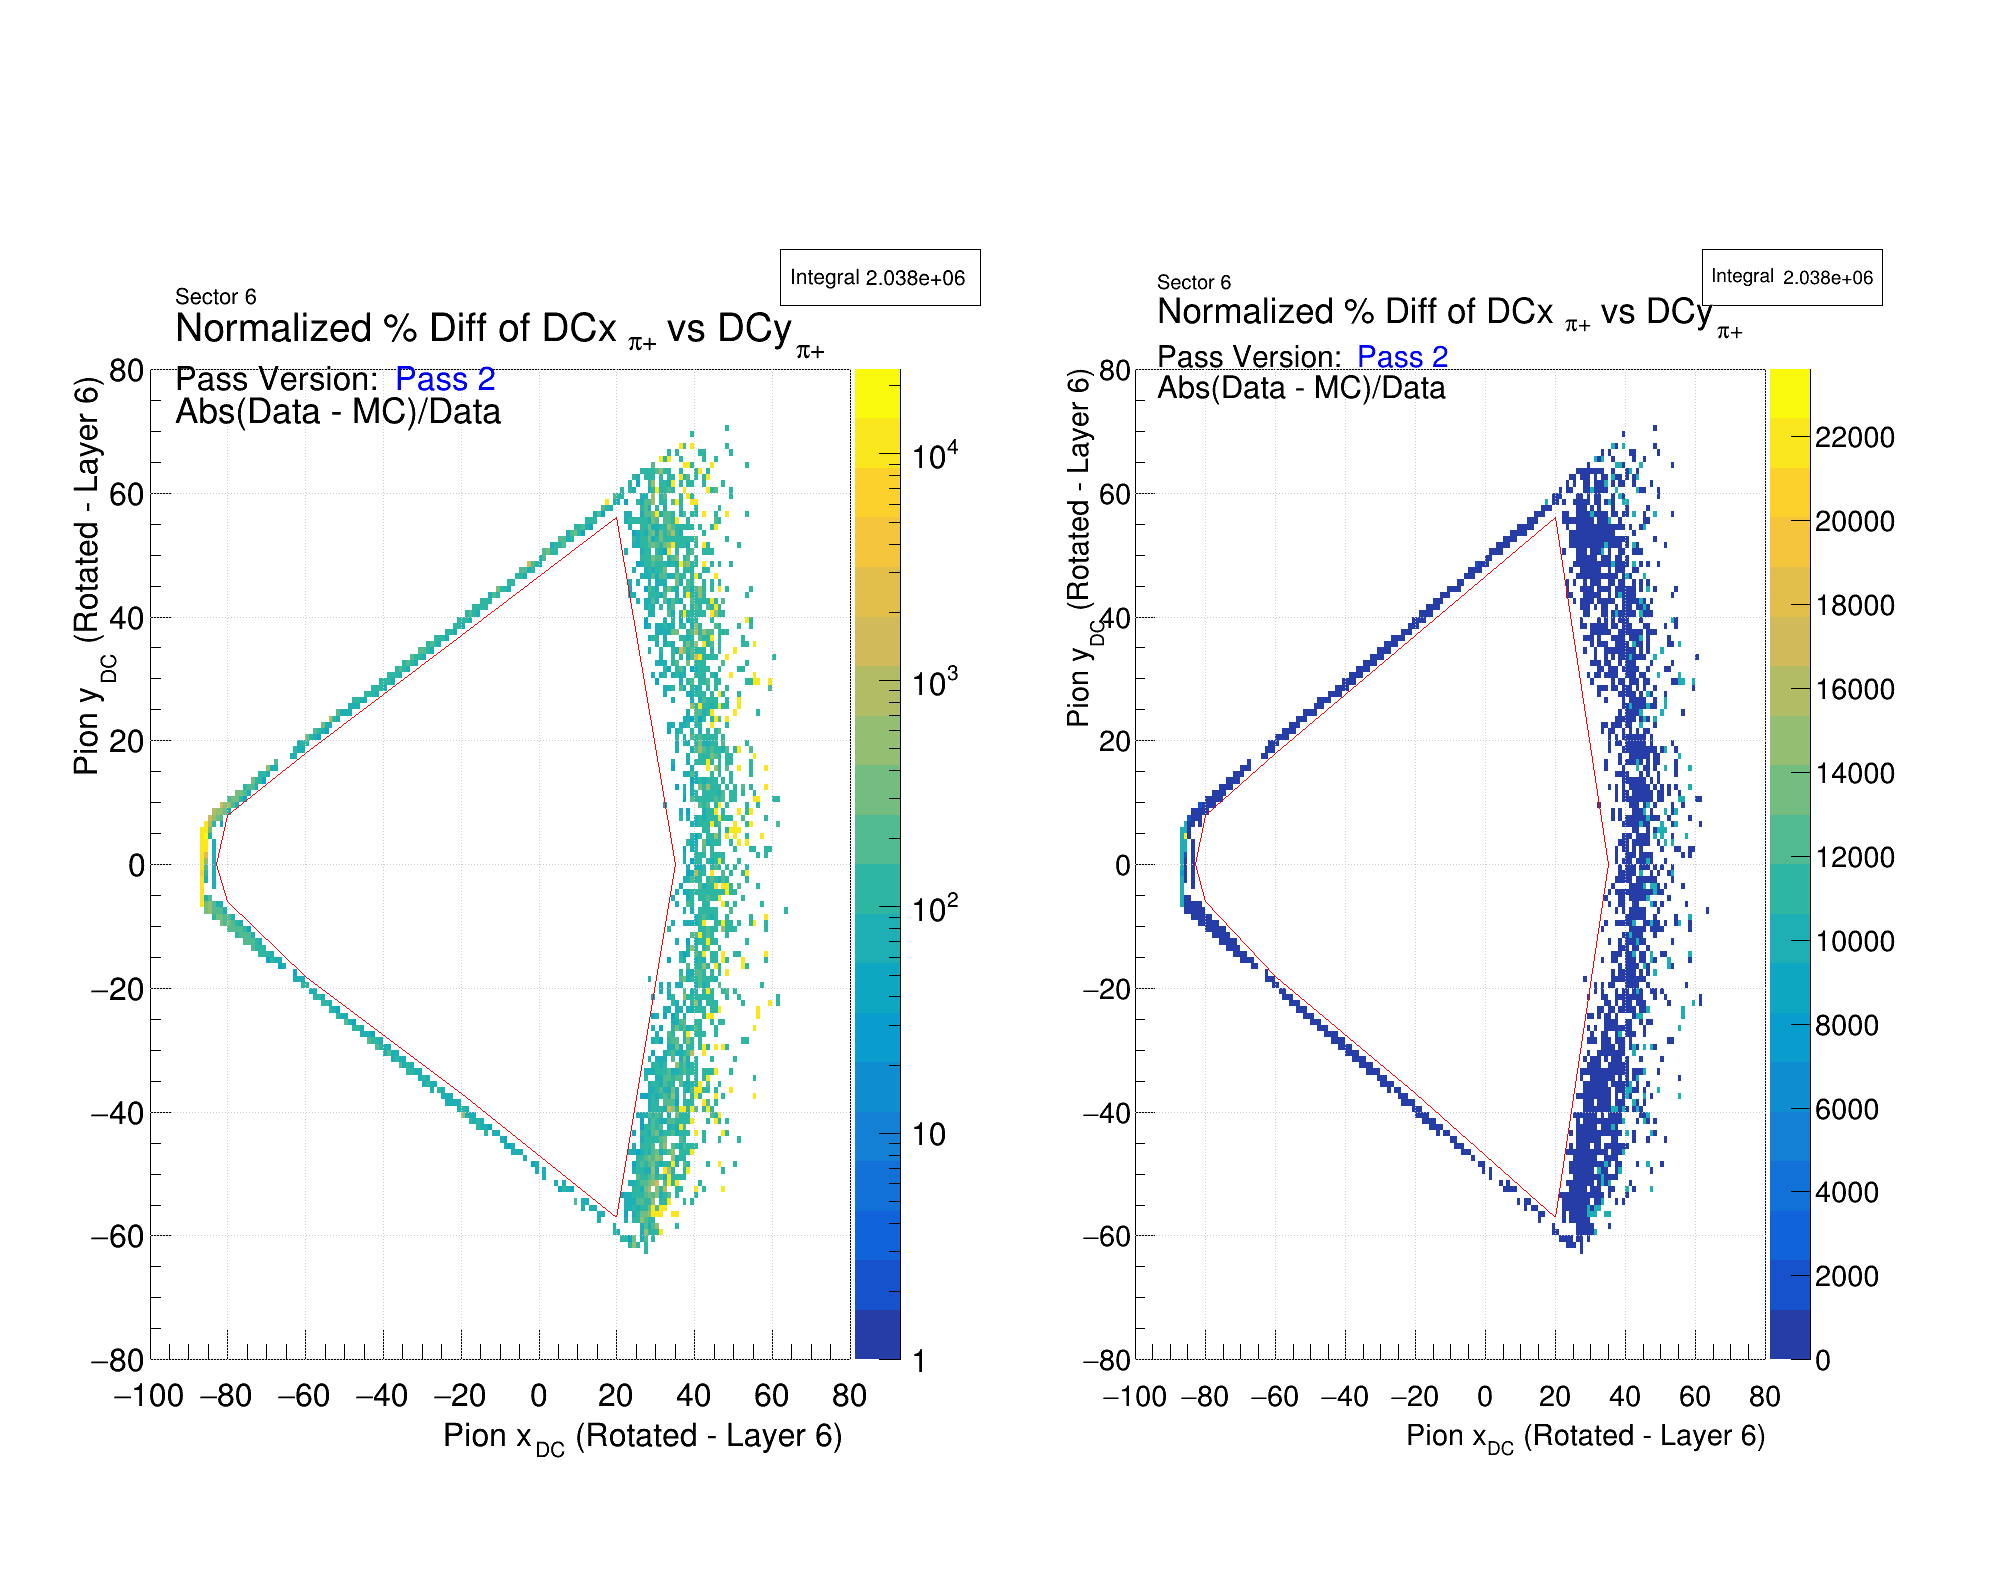

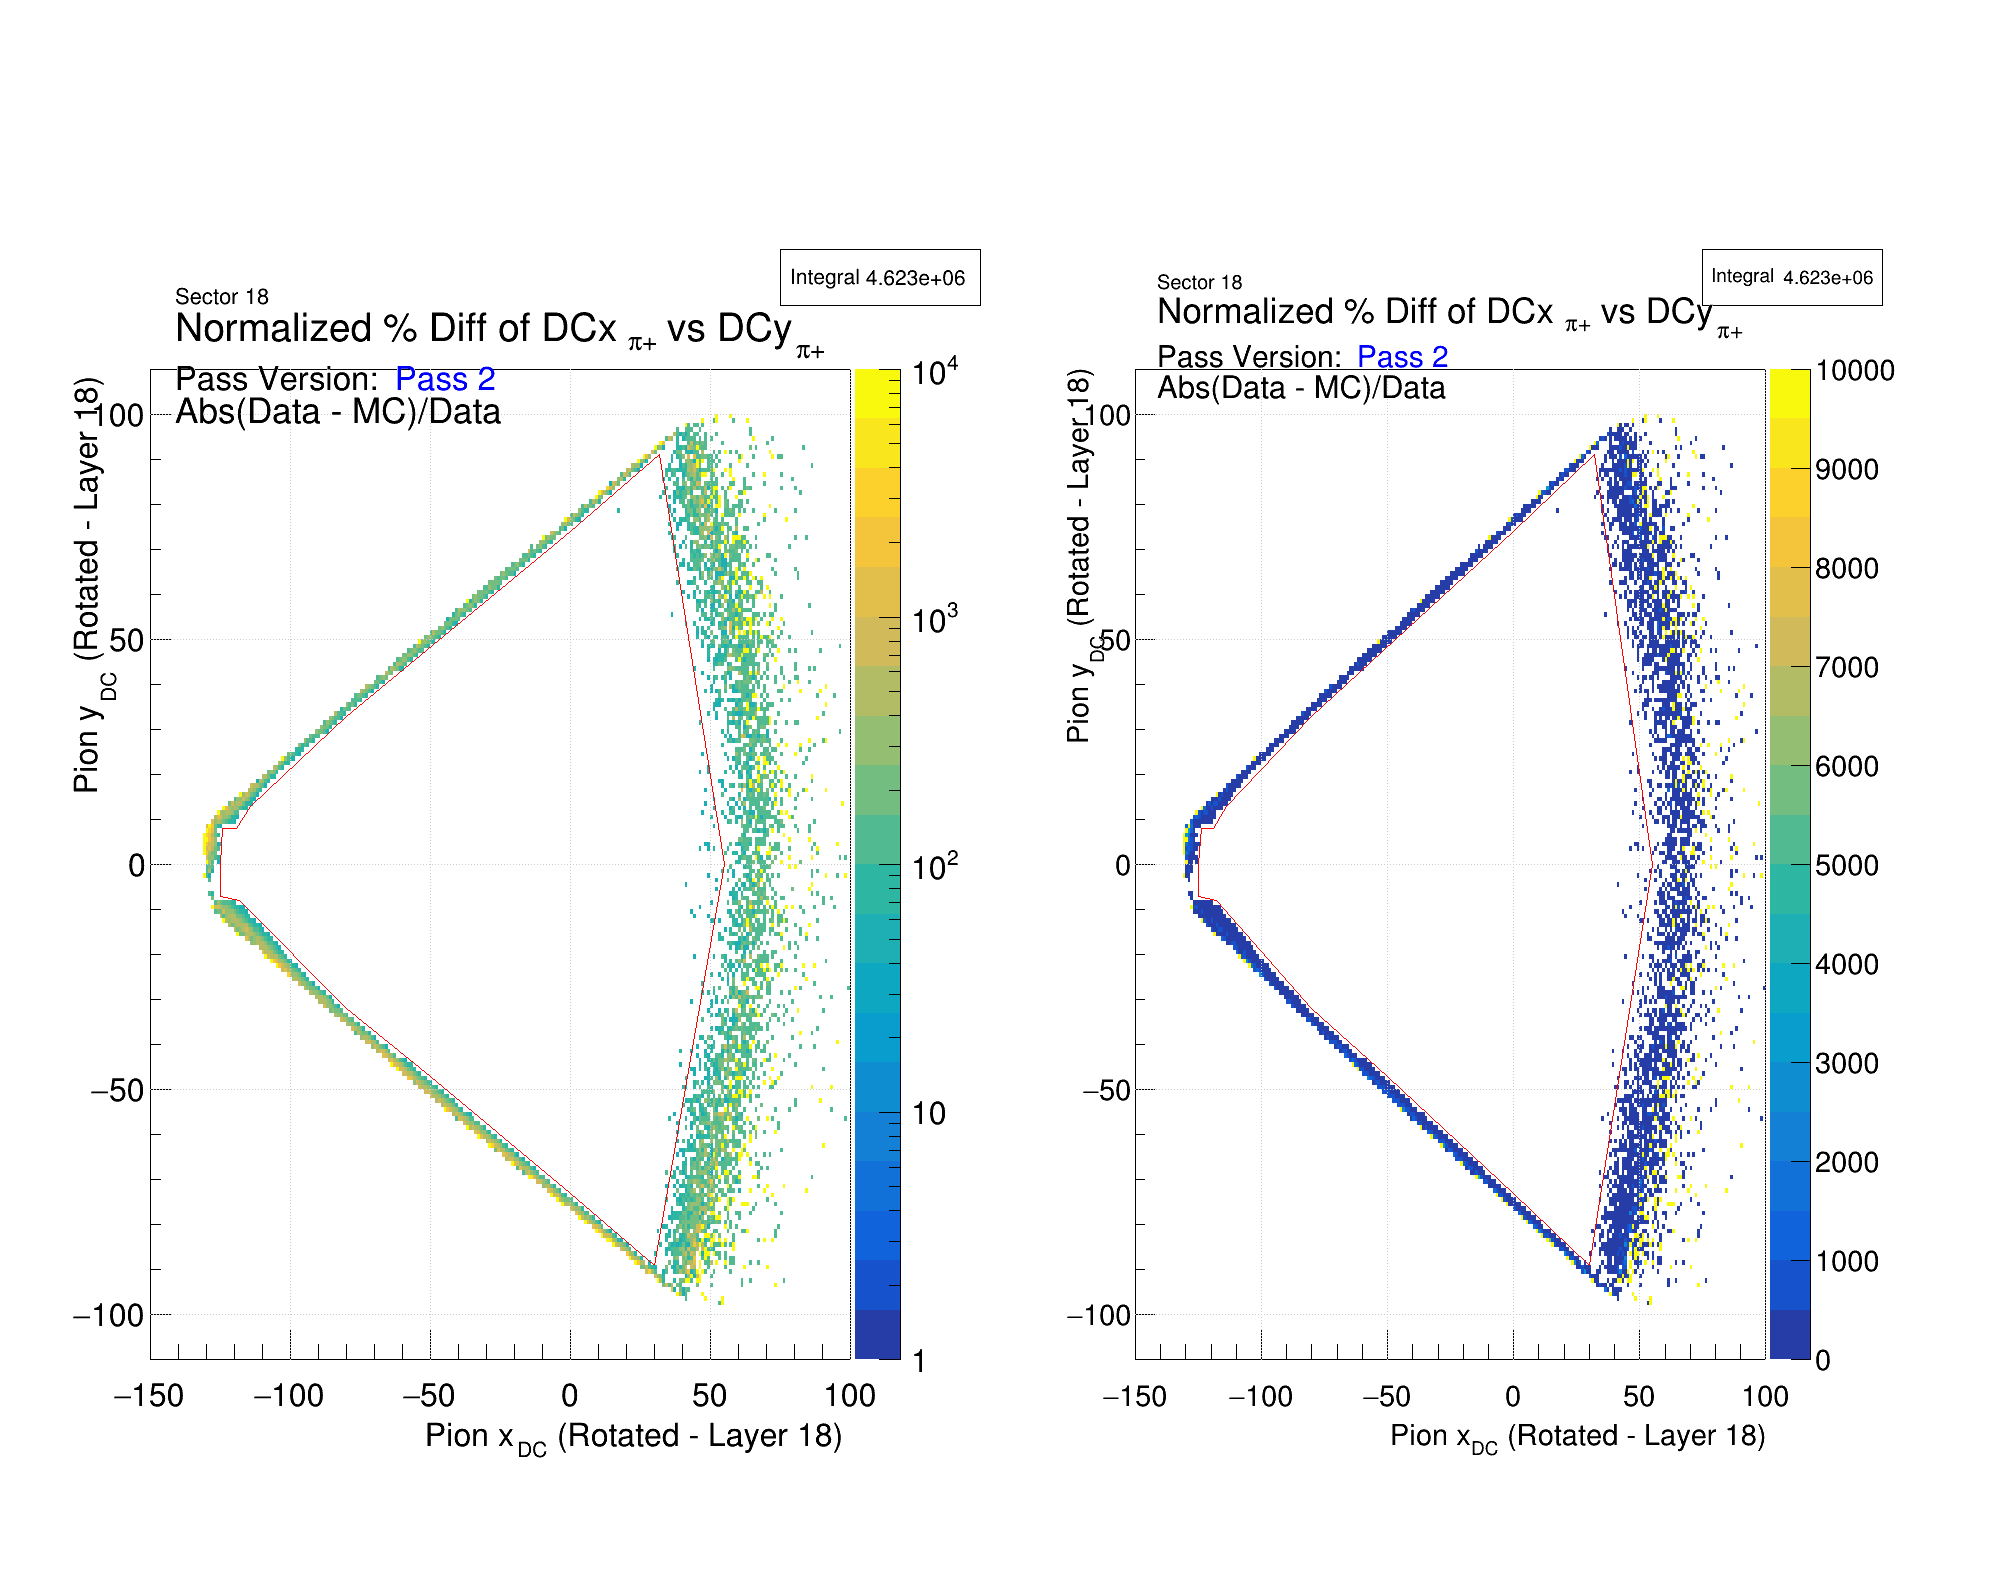

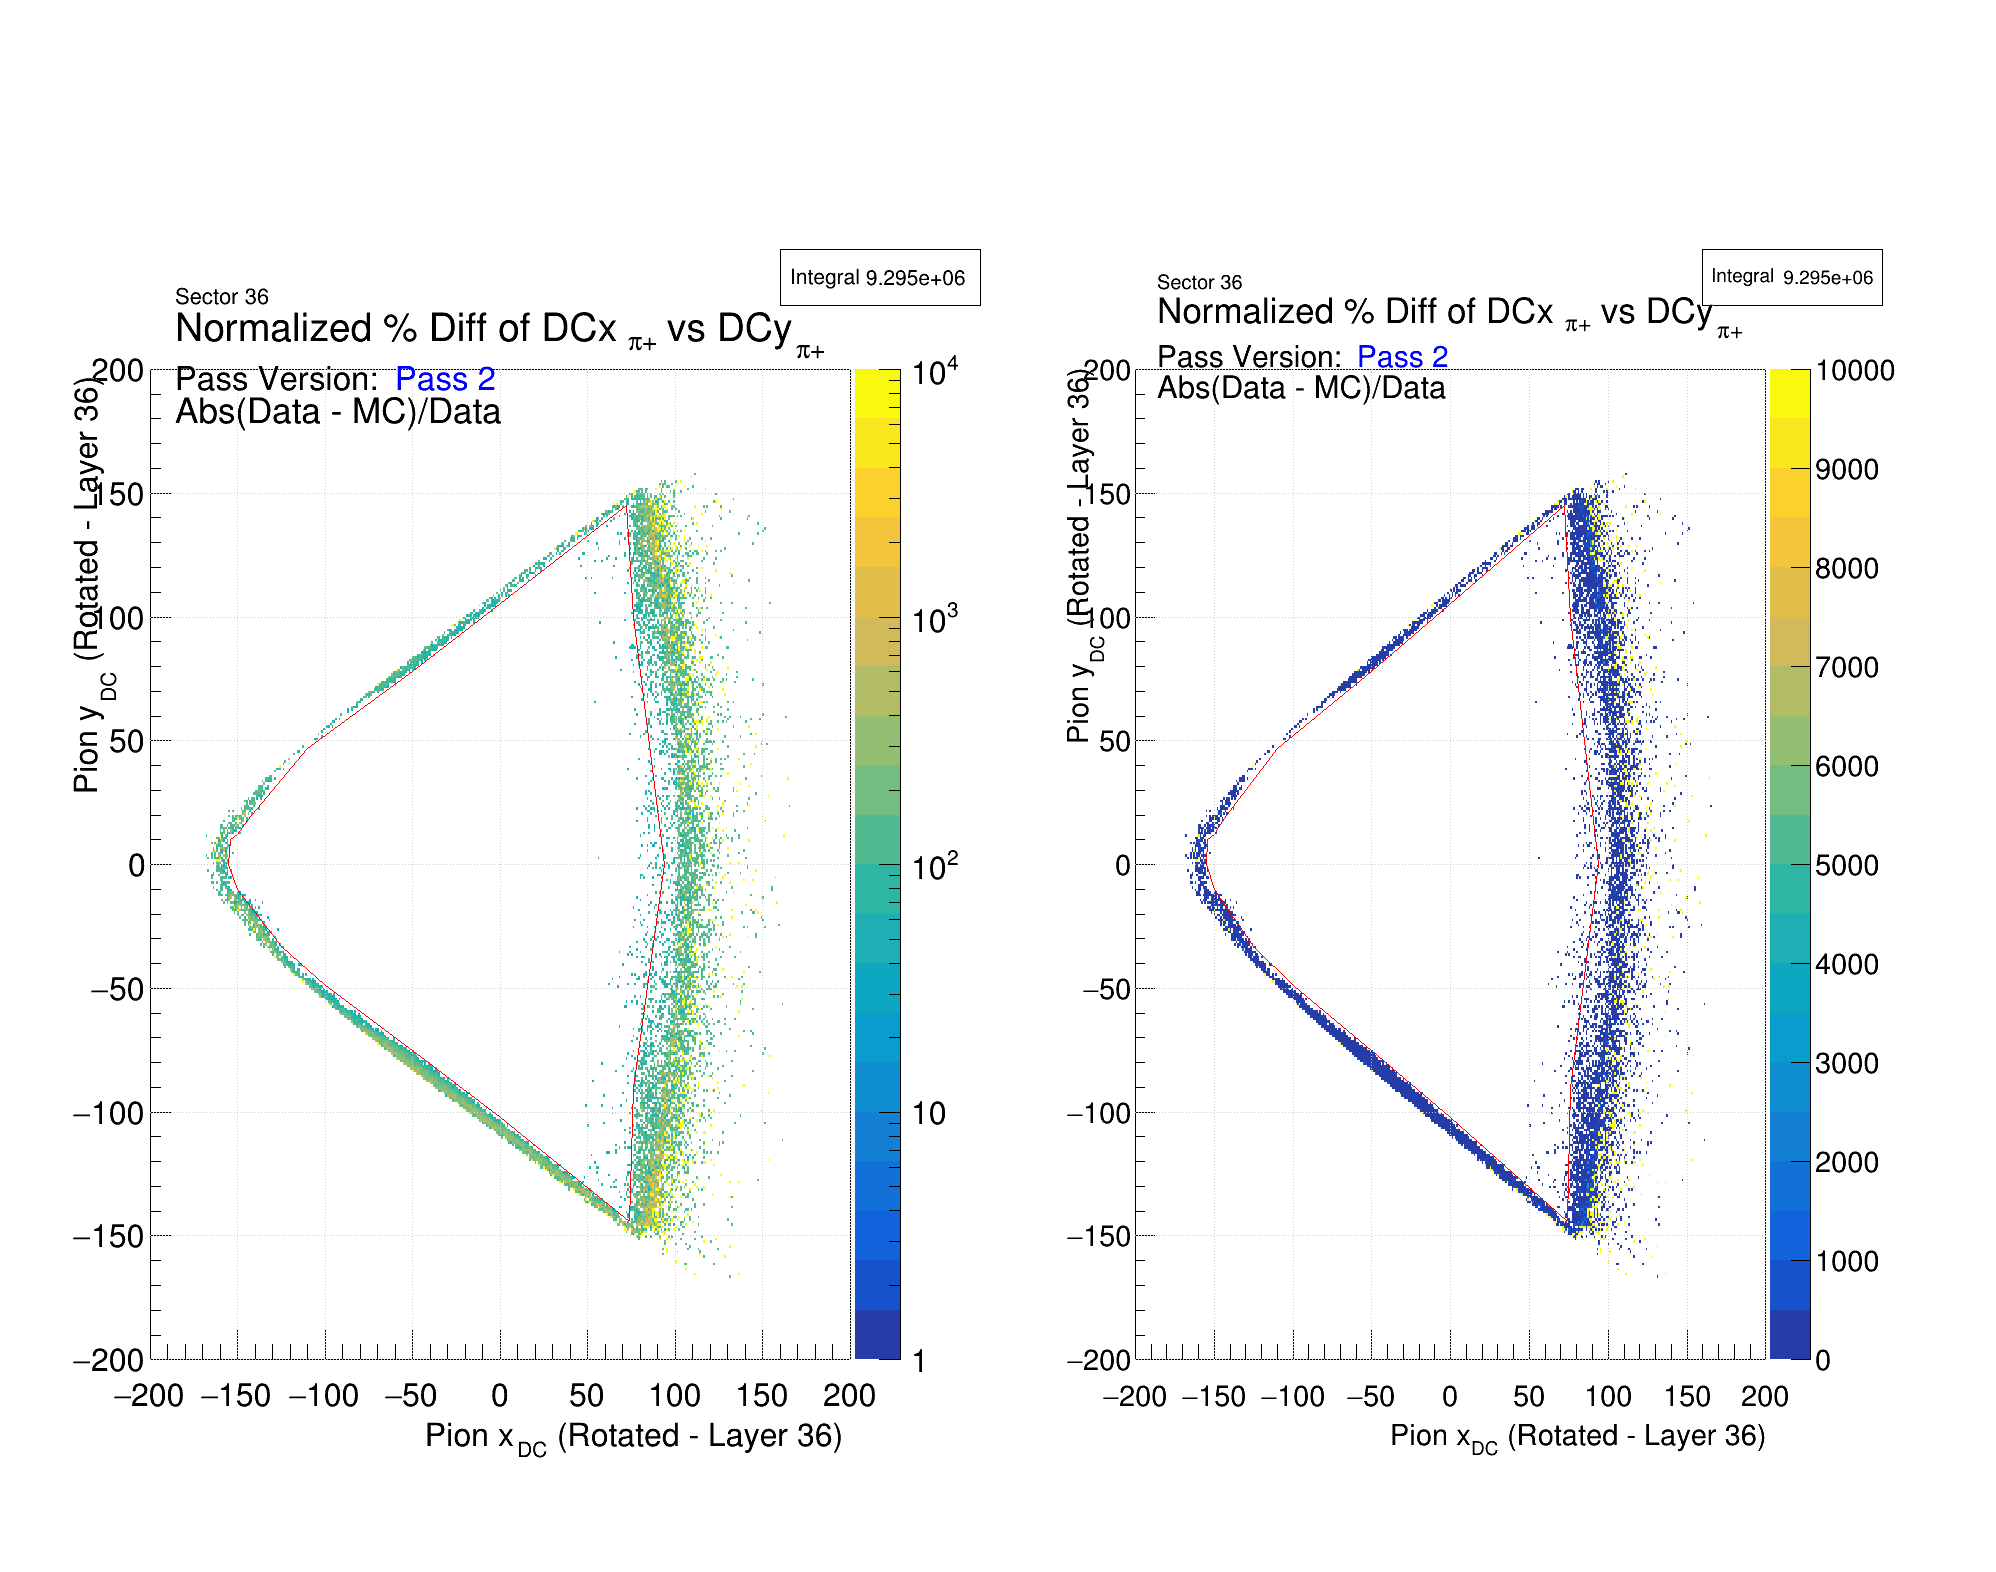

In [21]:
if(True):
    
    def apply_cut_on_boxes(histogram, box_borders):
        for binx in range(0, histogram.GetNbinsX() + 2):
            for biny in range(0, histogram.GetNbinsY() + 2):
                x = histogram.GetXaxis().GetBinCenter(binx)
                y = histogram.GetYaxis().GetBinCenter(biny)
                if(not (any(is_point_in_polygon(x, y, quad) for quad in box_borders))):
                    histogram.SetBinContent(binx, biny, 0)  # Set bin content to zero
        return histogram
    
    polygon = {}
    polygon["Layer_6__ele"] = [(-65, 0), (-65, -3), (13, -41), (14, -40)]
#     polygon["Layer_6__ele"].append((17,  -20))
    polygon["Layer_6__ele"].append((19,    0))
#     polygon["Layer_6__ele"].append((17,   20))
#     polygon["Layer_6__ele"].append((14,   40))
    polygon["Layer_6__ele"].append((13,   42))#
#     polygon["Layer_6__ele"].append((-40,  22))
#     polygon["Layer_6__ele"].append((-60,   6))
#     polygon["Layer_6__ele"].append((-61,   3))
    polygon["Layer_6__ele"].append((-65,   2))
    polygon["Layer_6__ele"].append((-65,   0))
    
    polygon["Layer_18_ele"] = [(-105, 0), (-94, -8), (15, -62)]
    polygon["Layer_18_ele"].append((25,   0))
    polygon["Layer_18_ele"].append((15,   63))#
    polygon["Layer_18_ele"].append((-92,  9))
    polygon["Layer_18_ele"].append((-105, 0))
    
    polygon["Layer_18_ele"].append((-127,  0))
    
    polygon["Layer_36_ele"] = [(-170, 0), (-169, -5), (-100, -36), (5, -81)]
    polygon["Layer_36_ele"].append((18,    0))
    polygon["Layer_36_ele"].append((5,    85))#
    polygon["Layer_36_ele"].append((-75,  49))
    polygon["Layer_36_ele"].append((-170,  3))    
    polygon["Layer_36_ele"].append((-170,  0))
    
    
    polygon["Layer_6__pip"] = [(-83,  0), (-80, -6), (-60, -18), (-20, -37), (20, -57)]
    polygon["Layer_6__pip"].append((35,   0))
    polygon["Layer_6__pip"].append((20,  56))
    polygon["Layer_6__pip"].append((-20, 37))
    polygon["Layer_6__pip"].append((-60, 18))
    polygon["Layer_6__pip"].append((-80,  8))
    polygon["Layer_6__pip"].append((-83,  0))
    
#     polygon["Layer_18_pip"] = [(-114, 0), (-114, -7), (-80,  -32), (-50, -47), (0, -73), (30, -89)]
    polygon["Layer_18_pip"] = [(-118, 0), (-114, -7), (-80,  -32), (-50, -47), (0, -73), (30, -89)]
    polygon["Layer_18_pip"].append((55,    0))
    polygon["Layer_18_pip"].append((30,   89))
    polygon["Layer_18_pip"].append((0,    73))
    polygon["Layer_18_pip"].append((-80,  33))
    polygon["Layer_18_pip"].append((-114,  8))
#     polygon["Layer_18_pip"].append((-114,  0))
    polygon["Layer_18_pip"].append((-118,  0))
    
    
    
    polygon["Layer_18_pip"] = [(-125, 0), (-125, -7), (-118, -8), (-80,  -32), (-50, -47), (0, -73), (30, -89)]
    polygon["Layer_18_pip"].append((55,    0))
    polygon["Layer_18_pip"].append((32,   91))#
    polygon["Layer_18_pip"].append((0,    74))
    polygon["Layer_18_pip"].append((-80,  33))
    polygon["Layer_18_pip"].append((-114, 13))
    polygon["Layer_18_pip"].append((-119,  8))
    polygon["Layer_18_pip"].append((-124,  8))
    polygon["Layer_18_pip"].append((-125,  0))
    
    
#     polygon["Layer_36_pip"] = [(-150, 0), (-150, -10), (-100,  -40), (-50, -70), (0, -100), (75, -140)]
    polygon["Layer_36_pip"] = [(-150, 0), (-150, -10), (-100,  -40), (-90, -45), (-90, -50), (-50, -70), (0, -102), (74, -145)]
    polygon["Layer_36_pip"].append((94,    0))
    polygon["Layer_36_pip"].append((75,  140))#
    polygon["Layer_36_pip"].append((72,  144))
#     polygon["Layer_36_pip"].append((0,   100))
    polygon["Layer_36_pip"].append((0,   103))
#     polygon["Layer_36_pip"].append((-50,  70))
    polygon["Layer_36_pip"].append((-50,  73))
#     polygon["Layer_36_pip"].append((-100, 40))
    polygon["Layer_36_pip"].append((-100, 48))
    polygon["Layer_36_pip"].append((-110, 48))
    polygon["Layer_36_pip"].append((-142, 20))
    polygon["Layer_36_pip"].append((-147, 15))
    polygon["Layer_36_pip"].append((-150, 10))
    polygon["Layer_36_pip"].append((-150,  0))
    
#     polygon["Layer_36_pip"] = [(-150, -10), (-100, -10), (-100, -40)]

    polygon["Layer_36_pip"] = [(-155, 0), (-150, -10), (-125,  -33), (-100, -49), (-50, -75), (0, -102), (74, -144)]
    polygon["Layer_36_pip"].append((76,  -90))
    polygon["Layer_36_pip"].append((94,    0))
    
    polygon["Layer_36_pip"].append((76,  100))
#     polygon["Layer_36_pip"].append((75,  140))#
    polygon["Layer_36_pip"].append((72,  145))
#     polygon["Layer_36_pip"].append((0,   100))

#     polygon["Layer_36_pip"].append((0,   103))
    polygon["Layer_36_pip"].append((-10, 100))
#     polygon["Layer_36_pip"].append((-50,  70))
#     polygon["Layer_36_pip"].append((-50,  73))

    polygon["Layer_36_pip"].append((-50,  78))
    
#     polygon["Layer_36_pip"].append((-100, 40))
#     polygon["Layer_36_pip"].append((-100, 48))
    polygon["Layer_36_pip"].append((-110, 47))
    polygon["Layer_36_pip"].append((-142, 20))
    polygon["Layer_36_pip"].append((-147, 15))
    polygon["Layer_36_pip"].append((-150, 12))
    polygon["Layer_36_pip"].append((-154, 10))
    polygon["Layer_36_pip"].append((-155,  0))


    Particle = "pip"
    DC_Layer = 36
    canvas, h1, h2, lines, line_Max, circle = {}, {}, {}, {}, {}, {}
    pl = {}
    text_label = {}
    for DC_Layer in [6, 18, 36]:
        SECTOR = DC_Layer # "All"
        for ii in hist:
            if(all(include_item in str(ii) for include_item in ["_diff", "cut_Complete_SIDIS", f"{Particle}_x_DC", "rot", f"_{DC_Layer}"])):
    #         if(all(include_item in str(ii) for include_item in ["_diff", "cut_Complete_SIDIS", f"pip_x_DC", "rot", f"_{DC_Layer}"])):
    #         if(all(include_item in str(ii) for include_item in ["mdf", "_norm", "cut_Complete_SIDIS", f"{Particle}_x_DC", "rot", f"_{DC_Layer}"])):
                print(ii)
                quadrilaterals = []            
#                 canvas, h1, h2, lines, line_Max, circle = {}, {}, {}, {}, {}, {}
#                 pl = {}
#                 text_label = {}
#                 SECTOR = DC_Layer # "All"

                h1[SECTOR] = hist[ii].Clone(f"h1_{SECTOR}")
                # h1[SECTOR] = Histo_rdf_2D.Clone(f"h1_{SECTOR}")
                # h1[SECTOR].Scale(Histo_rdf_Total)

                # h1[SECTOR] = Histo_mdf_2D.Clone(f"h1_{SECTOR}")
                # h1[SECTOR].Scale(Histo_mdf_Total)
                lines[SECTOR] = []

                quadrilaterals.append(polygon["".join(["Layer_", str(DC_Layer), "_", "" if (DC_Layer not in [6]) else "_", str(Particle)])])

                if(Particle in ["ele"]):
                    if(DC_Layer in [6]):
                        h1[SECTOR].GetXaxis().SetRangeUser(-80,  60)
                        h1[SECTOR].GetYaxis().SetRangeUser(-80,  80)

                    if(DC_Layer in [18]):
                        h1[SECTOR].GetXaxis().SetRangeUser(-150, 100)
                        h1[SECTOR].GetYaxis().SetRangeUser(-110, 110)

                    if(DC_Layer in [36]):
                        h1[SECTOR].GetXaxis().SetRangeUser(-200, 200)
                        h1[SECTOR].GetYaxis().SetRangeUser(-200, 200)
                else:
                    if(DC_Layer in [6]):
                        h1[SECTOR].GetXaxis().SetRangeUser(-100, 80)
                        h1[SECTOR].GetYaxis().SetRangeUser(-80,  80)

                    if(DC_Layer in [18]):
                        h1[SECTOR].GetXaxis().SetRangeUser(-150, 100)
                        h1[SECTOR].GetYaxis().SetRangeUser(-110, 110)

                    if(DC_Layer in [36]):
                        h1[SECTOR].GetXaxis().SetRangeUser(-200, 200)
                        h1[SECTOR].GetYaxis().SetRangeUser(-200, 200)

                h1[SECTOR].SetTitle("".join(["#splitline{Sector ", str(SECTOR), "}{", str(h1[SECTOR].GetTitle()), "}"]))
                h1[SECTOR].SetTitle("".join(["#splitline{Sector ", str(SECTOR), "}{#splitline{#splitline{#scale[1.75]{Normalized % Diff of DCx_{", "#pi+" if(Particle in ["pip"]) else "el", "} vs DCy_{", "#pi+" if(Particle in ["pip"]) else "el", "}}}{#scale[1.5]{Pass Version: #color[4]{Pass 2}}}}{#scale[1.55]{Abs(Data - MC)/Data}}}"]))

                # print(str(h1[SECTOR].GetTitle()))
                h2[SECTOR] = h1[SECTOR].Clone(f"h2_{SECTOR}")




                # # # Apply the cut
                # # h2[SECTOR] = apply_circular_cut(h2[SECTOR], center_x, center_y, radius, radius_inner, sector=SECTOR)
#                 h2[SECTOR] = apply_cut_on_boxes(histogram=h2[SECTOR], box_borders=quadrilaterals)

                # h2 = Histo_ratio_2D

                # Draw the histogram
                canvas[SECTOR] = Canvas_Create(Name=f"Name_{SECTOR}", Num_Columns=2, Num_Rows=1, Size_X=2000, Size_Y=1600, cd_Space=0)
                canvas[SECTOR].Draw()
                Draw_Canvas(canvas=canvas[SECTOR], cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
                h1[SECTOR].Draw("colz")
                ROOT.gPad.SetLogz(1)
                Draw_Canvas(canvas=canvas[SECTOR], cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
                h2[SECTOR].Draw("COLZ")
                # h2[SECTOR].RebinX(20)
                # h2[SECTOR].RebinY(20)
                ROOT.gPad.SetLogz(0)

        #         print("\tAfter:")
        #         max_x, max_y = print_max_bin_coordinates(h2[SECTOR])


                for CD_NUM in [1, 2]:
                    Draw_Canvas(canvas=canvas[SECTOR], cd_num=CD_NUM, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)

                    try:
                        for ii, polygon_ii in enumerate(quadrilaterals):
                            n_points = len(polygon_ii)
                            pl[(SECTOR, CD_NUM, ii)] = ROOT.TPolyLine(n_points + 1)
                            for i, (x, y) in enumerate(polygon_ii):
                                pl[(SECTOR, CD_NUM, ii)].SetPoint(i, x, y)
                                # Add a label for the point
                                text_label[(SECTOR, CD_NUM, ii, i)] = ROOT.TText(x, y, f"P{i+1}: ({x}, {y})")
                                # text_label[(SECTOR, CD_NUM, ii, i)] = ROOT.TText(x, y, f"({x}, {y})")
                                text_label[(SECTOR, CD_NUM, ii, i)].SetTextSize(0.0115)        # Adjust the size as needed
                                text_label[(SECTOR, CD_NUM, ii, i)].SetTextAlign(12)           # Align left and vertically centered
                                text_label[(SECTOR, CD_NUM, ii, i)].SetTextColor(ROOT.kBlack)  # Set text color
                                text_label[(SECTOR, CD_NUM, ii, i)].SetTextAngle(90 if(i%2 != 0) else 45)
                                if((SECTOR not in ["All"]) and (not True)):
                                    text_label[(SECTOR, CD_NUM, ii, i)].Draw("same")
                            # Close the shape by repeating the first point
                            pl[(SECTOR, CD_NUM, ii)].SetPoint(n_points, polygon_ii[0][0], polygon_ii[0][1])
                            pl[(SECTOR, CD_NUM, ii)].SetLineColor(2)  # Red color
                            pl[(SECTOR, CD_NUM, ii)].SetLineWidth(1)
                            pl[(SECTOR, CD_NUM, ii)].Draw("same")
                        canvas[SECTOR].Update()
                    except:
                        print("ERROR in box.Draw('same')")

                ROOT.gStyle.SetOptStat("i")
                canvas[SECTOR].Update()
                canvas[SECTOR].Draw()

#     print(f"""{color.BOLD}
    
    
# def is_point_in_polygon(x, y, polygon):
#     def angle(x1, y1, x2, y2):
#         return math.atan2(y2 - y1, x2 - x1)
#     winding_number = 0
#     num_vertices = len(polygon)
#     for i in range(num_vertices):
#         x1, y1 = polygon[i]
#         x2, y2 = polygon[(i + 1) % num_vertices]
#         a1 = angle(x, y, x1, y1)
#         a2 = angle(x, y, x2, y2)
#         angle_diff = a2 - a1
#         if(angle_diff > math.pi):
#             angle_diff -= 2 * math.pi
#         elif(angle_diff < -math.pi):
#             angle_diff += 2 * math.pi
#         winding_number += angle_diff
      
# Polygon_Layers = {polygon}

# ## PYTHON CODE:
# Data_Frame_Input = Data_Frame_Input.Filter('(is_point_in_polygon(ele_x_DC_6_rot, ele_y_DC_6_rot, Polygon_Layers["Layer_6"])) && (is_point_in_polygon(ele_x_DC_18_rot, ele_y_DC_18_rot, Polygon_Layers["Layer_18"])) && (is_point_in_polygon(ele_x_DC_36_rot, ele_y_DC_36_rot, Polygon_Layers["Layer_36"]))')

# {color.END}""")

    print(str("".join([color.BOLD, """
    
auto Polygon_Layers = std::map<std::string, std::vector<std::pair<double, double>>>{
\t""", str(str(str(str(str(str(str(polygon).replace("[", "{")).replace("], 'Lay", "}},\n\t{'Lay")).replace("]", "}")).replace(":", ",")).replace("(", "{")).replace(")", "}")).replace(", ", ",\t"), """
};""", color.END])).replace("'", '"'))
            
            
    print("\n\nDone")
else:
    print(f"{color.RED}\nNOT RUNNING THIS CELL\n{color.END}")
    def apply_cut_on_boxes(histogram, box_borders):
        for binx in range(0, histogram.GetNbinsX() + 2):
            for biny in range(0, histogram.GetNbinsY() + 2):
                x = histogram.GetXaxis().GetBinCenter(binx)
                y = histogram.GetYaxis().GetBinCenter(biny)
                if(any(is_point_in_polygon(x, y, quad) for quad in box_borders)):
                    histogram.SetBinContent(binx, biny, 0)  # Set bin content to zero
        return histogram

In [12]:
# polygon

In [13]:
Stop

NameError: name 'Stop' is not defined

.

.

.

## Comparing New & Old MC (2D)

In [ ]:
if(True):
    # Initialize a TCanvas
    rdf = ROOT.TFile("/w/hallb-scshelf2102/clas12/richcap/SIDIS_Analysis/Histo_Files_ROOT/SIDIS_epip_MC_Matched_Unsmeared_Pass_2_New_Fiducial_Cut_Test_V5_OGMC.root",  "READ")
    mdf = ROOT.TFile("/w/hallb-scshelf2102/clas12/richcap/SIDIS_Analysis/Histo_Files_ROOT/SIDIS_epip_MC_Matched_Unsmeared_Pass_2_New_Fiducial_Cut_Test_V5_NewMC.root", "READ")

    canvas, hist = {}, {}
    Q2_y_bin = "All"
    # Q2_y_bin = "1"
    cut = "'no_cut'"
    # cut = "'cut_Complete_SIDIS'"

    ROOT.gStyle.SetOptStat("i")

    for key in rdf.GetListOfKeys():
        histo_name = key.GetName()
        histo_name_rdf = histo_name.replace("='rdf'", "='mdf'")
        histo_name_mdf = histo_name_rdf.replace("='rdf'", "='mdf'")
        histo_name_mdf = f"new_{histo_name_mdf}"
#         if(all(include in histo_name_rdf for include in [f"(Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_bin}, z-PT-Bin=All])", f"Data-Cut={cut}"]) and all(exclude not in histo_name_rdf for exclude in ["Var-D1='Q2'", "Var-D1='el'", "Var-D1='pip'", "Var-D1='z", "Normal_3D", "Response_Matrix_Normal_1D"])):
        if(all(include in histo_name_rdf for include in [f"(Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_bin}, z-PT-Bin=All])", f"Data-Cut={cut}", "Normal_2D"]) and all(exclude not in histo_name_rdf for exclude in ["Var-D1='H", "DC", "PCal", "Normal_3D", "Response_Matrix_Normal_1D"])):
            print(f"histo_name_rdf = {histo_name_rdf}\n{color.BOLD}type = {type(rdf.Get(histo_name_rdf))}{color.END}\n")
            # canvas[histo_name_rdf] = ROOT.TCanvas(f"canvas_{histo_name_rdf}", f"Comparison of {histo_name_rdf}", 1200, 400)
            # canvas[histo_name_rdf].Divide(3, 1)
            
            # canvas[histo_name] = Canvas_Create(Name=f"canvas_{histo_name}", Num_Columns=1, Num_Rows=2, Size_X=1200, Size_Y=800, cd_Space=0)
            # canvas[histo_name].SetFillColor(17)  # Color index 17 corresponds to a light grey color

            # canvas[f"{str(histo_name)}_cd".replace(cut, "'no_cut'")]             = canvas[histo_name].cd(1)
            # canvas[f"{str(histo_name)}_cd".replace(cut, "'cut_Complete_SIDIS'")] = canvas[histo_name].cd(2)

            # canvas[f"{str(histo_name)}_cd".replace(cut, "'no_cut'")].SetPad(0.05, 0.55, 0.95, 0.95)
            # canvas[f"{str(histo_name)}_cd".replace(cut, "'cut_Complete_SIDIS'")].SetPad(0.05, 0.05, 0.95, 0.55)

            # canvas[f"{str(histo_name)}_cd".replace(cut, "'no_cut'")].Divide(3, 1)
            # canvas[f"{str(histo_name)}_cd".replace(cut, "'cut_Complete_SIDIS'")].Divide(3, 1)
            
            canvas[histo_name] = Canvas_Create(Name=f"canvas_{histo_name}", Num_Columns=1, Num_Rows=2, Size_X=1200, Size_Y=800, cd_Space=0)
            canvas[histo_name].SetFillColor(17)  # Color index 17 corresponds to a light grey color

            canvas[f"{str(histo_name)}_cd".replace(cut, "'no_cut'")]             = canvas[histo_name].cd(1)
            canvas[f"{str(histo_name)}_cd".replace(cut, "'cut_Complete_SIDIS'")] = canvas[histo_name].cd(2)

            canvas[f"{str(histo_name)}_cd".replace(cut, "'no_cut'")].SetPad(0.05, 0.55, 0.95, 0.95)
            # canvas[f"{str(histo_name)}_cd".replace(cut, "'cut_Complete_SIDIS'")].SetPad(0.05, 0.05, 0.95, 0.55)
            canvas[f"{str(histo_name)}_cd".replace(cut, "'cut_Complete_SIDIS'")].SetPad(0.05, 0.05, 0.95, 0.95)

            canvas[f"{str(histo_name)}_cd".replace(cut, "'no_cut'")].Divide(3, 1)
            canvas[f"{str(histo_name)}_cd".replace(cut, "'cut_Complete_SIDIS'")].Divide(3, 1)



            for cut2 in ["'no_cut'", "'cut_Complete_SIDIS'"]:
                histo_name_rdf = histo_name_rdf.replace(cut, cut2)
                histo_name_mdf = histo_name_mdf.replace(cut, cut2)

                hist[histo_name_rdf] = rdf.Get(histo_name_rdf)
                hist[histo_name_rdf].GetXaxis().SetRange(hist[histo_name_rdf].GetXaxis().FindBin(1), hist[histo_name_rdf].GetXaxis().FindBin(40))
                hist[histo_name_rdf] = hist[histo_name_rdf].Project3D("yz" if(all(flip not in histo_name_rdf for flip in ["Var-D2='elth'", "Var-D2='pipth'", "Var-D1='Hx", "Var-D1='ele_x_DC", "Var-D1='pip_x_DC"])) else "zy")
                hist[histo_name_mdf] = mdf.Get(histo_name_mdf.replace("new_", ""))
                hist[histo_name_mdf].GetXaxis().SetRange(hist[histo_name_mdf].GetXaxis().FindBin(1), hist[histo_name_mdf].GetXaxis().FindBin(40))
                hist[histo_name_mdf] = hist[histo_name_mdf].Project3D("yz" if(all(flip not in histo_name_mdf for flip in ["Var-D2='elth'", "Var-D2='pipth'", "Var-D1='Hx", "Var-D1='ele_x_DC", "Var-D1='pip_x_DC"])) else "zy")

#                 hist[histo_name_rdf].RebinX(10)
#                 hist[histo_name_rdf].RebinY(10)
#                 hist[histo_name_mdf].RebinX(10)
#                 hist[histo_name_mdf].RebinY(10)

                hist[histo_name_rdf].SetTitle(str(str(str(hist[histo_name_rdf].GetTitle()).replace("yz projection", "")).replace("zy projection", "")).replace("(REC)", "(REC - Stefan's)"))
                hist[histo_name_mdf].SetTitle(str(str(str(hist[histo_name_mdf].GetTitle()).replace("yz projection", "")).replace("zy projection", "")).replace("(REC)", "(REC - My New)"))

                hist[f"{histo_name_rdf}_norm"] = hist[histo_name_rdf].Clone(f"{histo_name_rdf}_norm")
                hist[f"{histo_name_mdf}_norm"] = hist[histo_name_mdf].Clone(f"{histo_name_mdf}_norm")

                if(hist[f"{histo_name_rdf}_norm"].Integral() > 0):
                    hist[f"{histo_name_rdf}_norm"].Scale(1.0 / hist[f"{histo_name_rdf}_norm"].Integral())
                if(hist[f"{histo_name_mdf}_norm"].Integral() > 0):
                    hist[f"{histo_name_mdf}_norm"].Scale(1.0 / hist[f"{histo_name_mdf}_norm"].Integral())

                hist[f"{histo_name_rdf}_diff"] = hist[f"{histo_name_rdf}_norm"].Clone(f"{histo_name_rdf}_diff")
                # hist[f"{histo_name_rdf}_diff"].Add(hist[f"{histo_name_mdf}_norm"], -1)

                for x_bin in range(0,      hist[f"{histo_name_rdf}_diff"].GetNbinsX() + 1):
                    for y_bin in range(0,  hist[f"{histo_name_rdf}_diff"].GetNbinsY() + 1):
                        Histo_rdf_value  = hist[f"{histo_name_rdf}_norm"].GetBinContent(x_bin, y_bin)
                        Histo_mdf_value  = hist[f"{histo_name_mdf}_norm"].GetBinContent(x_bin, y_bin)
                        Histo_rdf_value  = round(Histo_rdf_value, 4)
                        Histo_mdf_value  = round(Histo_mdf_value, 4)
                        if(Histo_rdf_value == 0):
                            percent_diff = 1000 if(Histo_mdf_value != 0) else 0
                        else:
                            percent_diff = (abs(Histo_rdf_value - Histo_mdf_value)/Histo_rdf_value)*100
                        # if(percent_diff   < 10):
                        #     percent_diff  = 0
                        hist[f"{histo_name_rdf}_diff"].SetBinContent(x_bin, y_bin, percent_diff)

                hist[f"{histo_name_rdf}_diff"].SetTitle("Ratio of (Normalized) #frac{old - new}{old}")

                Draw_Canvas(canvas=canvas[f"{str(histo_name.replace(cut, cut2))}_cd"], cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
                # hist[f"{histo_name_rdf}_norm"].Draw("colz")
                hist[f"{histo_name_rdf}"].Draw("colz")
                Draw_Canvas(canvas=canvas[f"{str(histo_name.replace(cut, cut2))}_cd"], cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
                # hist[f"{histo_name_mdf}_norm"].Draw("colz")
                hist[f"{histo_name_mdf}"].Draw("colz")
                Draw_Canvas(canvas=canvas[f"{str(histo_name.replace(cut, cut2))}_cd"], cd_num=3, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
                ROOT.gPad.SetLogz(1)
                hist[f"{histo_name_rdf}_diff"].Draw("colz")

                canvas[histo_name].Update()
            canvas[histo_name].Draw()
        elif(all(include in histo_name_rdf for include in ["Normal_3D", "(Binning-Type='Y_bin'-[Q2-y-Bin=All, z-PT-Bin=All])"]) and all(exclude not in histo_name_rdf for exclude in ["Data-Cut='no_cut'", "Response_Matrix_Normal_1D"])):
            continue
            print(f"histo_name_rdf = {histo_name_rdf}\n{color.BOLD}type = {type(rdf.Get(histo_name_rdf))}{color.END}\n")
            canvas[histo_name_rdf] = ROOT.TCanvas(f"canvas_{histo_name_rdf}", f"Canvas_{histo_name_rdf}", 800, 600)
            hist[histo_name_rdf] = rdf.Get(histo_name_rdf)
            hist[histo_name_rdf].Draw("lego")
            canvas[histo_name_rdf].Update()
            canvas[histo_name_rdf].Draw()

    print("Done")
else:
    print("Cell not set to run...")

## Comparing New & Old MC (1D)

In [ ]:
# if(True):
#     # Initialize a TCanvas
#     rdf = ROOT.TFile("/w/hallb-scshelf2102/clas12/richcap/SIDIS_Analysis/Histo_Files_ROOT/SIDIS_epip_MC_Matched_Unsmeared_Pass_2_New_Fiducial_Cut_Test_V5_OGMC.root",  "READ")
#     mdf = ROOT.TFile("/w/hallb-scshelf2102/clas12/richcap/SIDIS_Analysis/Histo_Files_ROOT/SIDIS_epip_MC_Matched_Unsmeared_Pass_2_New_Fiducial_Cut_Test_V5_NewMC.root", "READ")

#     canvas, hist = {}, {}
#     Q2_y_bin = "All"
#     # Q2_y_bin = "1"
#     cut = "'no_cut'"
#     # cut = "'cut_Complete_SIDIS'"

#     ROOT.gStyle.SetOptStat("i")

#     for key in rdf.GetListOfKeys():
#         histo_name = key.GetName()
#         histo_name_rdf = histo_name.replace("='rdf'", "='mdf'")
#         histo_name_mdf = histo_name_rdf.replace("='rdf'", "='mdf'")
#         histo_name_mdf = f"new_{histo_name_mdf}"
#         if(all(include in histo_name_rdf for include in [f"(Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_bin}, z-PT-Bin=All])", f"Data-Cut={cut}", "Normal_2D"]) and all(exclude not in histo_name_rdf for exclude in ["Var-D1='H", "DC", "PCal", "Normal_3D", "Response_Matrix_Normal_1D"])):
#             print(f"histo_name_rdf = {histo_name_rdf}\n{color.BOLD}type = {type(rdf.Get(histo_name_rdf))}{color.END}\n")
            
#             canvas[histo_name] = Canvas_Create(Name=f"canvas_{histo_name}", Num_Columns=1, Num_Rows=2, Size_X=1200, Size_Y=800, cd_Space=0)
#             canvas[histo_name].SetFillColor(17)  # Color index 17 corresponds to a light grey color

#             canvas[f"{str(histo_name)}_cd".replace(cut, "'no_cut'")]             = canvas[histo_name].cd(1)
#             canvas[f"{str(histo_name)}_cd".replace(cut, "'cut_Complete_SIDIS'")] = canvas[histo_name].cd(2)

#             canvas[f"{str(histo_name)}_cd".replace(cut, "'no_cut'")].SetPad(0.05, 0.55, 0.95, 0.95)
#             canvas[f"{str(histo_name)}_cd".replace(cut, "'cut_Complete_SIDIS'")].SetPad(0.05, 0.05, 0.95, 0.55)
# #             canvas[f"{str(histo_name)}_cd".replace(cut, "'cut_Complete_SIDIS'")].SetPad(0.05, 0.05, 0.95, 0.95)

#             canvas[f"{str(histo_name)}_cd".replace(cut, "'no_cut'")].Divide(3, 1)
#             canvas[f"{str(histo_name)}_cd".replace(cut, "'cut_Complete_SIDIS'")].Divide(3, 1)

#             for cut2 in ["'no_cut'", "'cut_Complete_SIDIS'"]:
#                 histo_name_rdf = histo_name_rdf.replace(cut, cut2)
#                 histo_name_mdf = histo_name_mdf.replace(cut, cut2)

#                 hist[histo_name_rdf] = rdf.Get(histo_name_rdf)
#                 hist[histo_name_rdf].GetXaxis().SetRange(hist[histo_name_rdf].GetXaxis().FindBin(1), hist[histo_name_rdf].GetXaxis().FindBin(40))
#                 hist[histo_name_rdf] = hist[histo_name_rdf].Project3D("yz" if(all(flip not in histo_name_rdf for flip in ["Var-D2='elth'", "Var-D2='pipth'", "Var-D1='Hx", "Var-D1='ele_x_DC", "Var-D1='pip_x_DC"])) else "zy")
#                 hist[histo_name_mdf] = mdf.Get(histo_name_mdf.replace("new_", ""))
#                 hist[histo_name_mdf].GetXaxis().SetRange(hist[histo_name_mdf].GetXaxis().FindBin(1), hist[histo_name_mdf].GetXaxis().FindBin(40))
#                 hist[histo_name_mdf] = hist[histo_name_mdf].Project3D("yz" if(all(flip not in histo_name_mdf for flip in ["Var-D2='elth'", "Var-D2='pipth'", "Var-D1='Hx", "Var-D1='ele_x_DC", "Var-D1='pip_x_DC"])) else "zy")

#                 hist[histo_name_rdf].SetTitle(str(str(str(hist[histo_name_rdf].GetTitle()).replace("yz projection", "")).replace("zy projection", "")).replace("(REC)", "(REC - Stefan's)"))
#                 hist[histo_name_mdf].SetTitle(str(str(str(hist[histo_name_mdf].GetTitle()).replace("yz projection", "")).replace("zy projection", "")).replace("(REC)", "(REC - My New)"))

#                 hist[f"{histo_name_rdf}_norm"] = hist[histo_name_rdf].Clone(f"{histo_name_rdf}_norm")
#                 hist[f"{histo_name_mdf}_norm"] = hist[histo_name_mdf].Clone(f"{histo_name_mdf}_norm")

#                 if(hist[f"{histo_name_rdf}_norm"].Integral() > 0):
#                     hist[f"{histo_name_rdf}_norm"].Scale(1.0 / hist[f"{histo_name_rdf}_norm"].Integral())
#                 if(hist[f"{histo_name_mdf}_norm"].Integral() > 0):
#                     hist[f"{histo_name_mdf}_norm"].Scale(1.0 / hist[f"{histo_name_mdf}_norm"].Integral())

#                 hist[f"{histo_name_rdf}_diff"] = hist[f"{histo_name_rdf}_norm"].Clone(f"{histo_name_rdf}_diff")

#                 for x_bin in range(0,      hist[f"{histo_name_rdf}_diff"].GetNbinsX() + 1):
#                     for y_bin in range(0,  hist[f"{histo_name_rdf}_diff"].GetNbinsY() + 1):
#                         Histo_rdf_value  = hist[f"{histo_name_rdf}_norm"].GetBinContent(x_bin, y_bin)
#                         Histo_mdf_value  = hist[f"{histo_name_mdf}_norm"].GetBinContent(x_bin, y_bin)
#                         Histo_rdf_value  = round(Histo_rdf_value, 4)
#                         Histo_mdf_value  = round(Histo_mdf_value, 4)
#                         if(Histo_rdf_value == 0):
#                             percent_diff = 1000 if(Histo_mdf_value != 0) else 0
#                         else:
#                             percent_diff = (abs(Histo_rdf_value - Histo_mdf_value)/Histo_rdf_value)*100

#                         hist[f"{histo_name_rdf}_diff"].SetBinContent(x_bin, y_bin, percent_diff)

#                 hist[f"{histo_name_rdf}_diff"].SetTitle("Ratio of (Normalized) #frac{old - new}{old}")

#                 Draw_Canvas(canvas=canvas[f"{str(histo_name.replace(cut, cut2))}_cd"], cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#                 hist[f"{histo_name_rdf}"].Draw("colz")
#                 Draw_Canvas(canvas=canvas[f"{str(histo_name.replace(cut, cut2))}_cd"], cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#                 hist[f"{histo_name_mdf}"].Draw("colz")
#                 Draw_Canvas(canvas=canvas[f"{str(histo_name.replace(cut, cut2))}_cd"], cd_num=3, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#                 ROOT.gPad.SetLogz(1)
#                 hist[f"{histo_name_rdf}_diff"].Draw("colz")

#                 canvas[histo_name].Update()
#             canvas[histo_name].Draw()
#         elif(all(include in histo_name_rdf for include in ["Normal_3D", "(Binning-Type='Y_bin'-[Q2-y-Bin=All, z-PT-Bin=All])"]) and all(exclude not in histo_name_rdf for exclude in ["Data-Cut='no_cut'", "Response_Matrix_Normal_1D"])):
#             continue
#             print(f"histo_name_rdf = {histo_name_rdf}\n{color.BOLD}type = {type(rdf.Get(histo_name_rdf))}{color.END}\n")
#             canvas[histo_name_rdf] = ROOT.TCanvas(f"canvas_{histo_name_rdf}", f"Canvas_{histo_name_rdf}", 800, 600)
#             hist[histo_name_rdf] = rdf.Get(histo_name_rdf)
#             hist[histo_name_rdf].Draw("lego")
#             canvas[histo_name_rdf].Update()
#             canvas[histo_name_rdf].Draw()

#     print("Done")
# else:
#     print("Cell not set to run...")

In [ ]:
if(True):
    
    def reset_axis_range(hist_1d_rdf, hist_1d_mdf, hist_1d_dif, Extra_bin_space=2):
        """Reset the axis range to exclude empty bins at the beginning and end of the histograms."""
        first_bin = 1
        last_bin  = hist_1d_rdf.GetNbinsX()
        # Find the first non-zero bin
        for i in range(1, hist_1d_rdf.GetNbinsX() + 1):
            if(hist_1d_rdf.GetBinContent(i) > 0):
                first_bin = i
                break
        # Find the last non-zero bin
        for i in range(hist_1d_rdf.GetNbinsX(), 0, -1):
            if(hist_1d_rdf.GetBinContent(i) > 0):
                last_bin = i
                break
        hist_1d_rdf.GetXaxis().SetRange((first_bin - Extra_bin_space) if(first_bin > (Extra_bin_space + 1)) else 1, (last_bin + Extra_bin_space) if(hist_1d_rdf.GetNbinsX() > (last_bin + Extra_bin_space)) else hist_1d_rdf.GetNbinsX())
        hist_1d_mdf.GetXaxis().SetRange((first_bin - Extra_bin_space) if(first_bin > (Extra_bin_space + 1)) else 1, (last_bin + Extra_bin_space) if(hist_1d_rdf.GetNbinsX() > (last_bin + Extra_bin_space)) else hist_1d_rdf.GetNbinsX())
        hist_1d_dif.GetXaxis().SetRange((first_bin - Extra_bin_space) if(first_bin > (Extra_bin_space + 1)) else 1, (last_bin + Extra_bin_space) if(hist_1d_rdf.GetNbinsX() > (last_bin + Extra_bin_space)) else hist_1d_rdf.GetNbinsX())


    def calculate_average(hist_diff):
        """Calculate the average of the absolute values of the bin contents and its uncertainty."""
        sum_abs_values = 0
        sum_weights = 0
        sum_error_squared = 0
        for ii in range(1, hist_diff.GetNbinsX() + 1):
            bin_content = hist_diff.GetBinContent(ii)
            bin_error   = hist_diff.GetBinError(ii)
            abs_value = abs(bin_content)
            sum_abs_values += abs_value
            sum_error_squared += (bin_error ** 2)
        n_bins            = hist_diff.GetNbinsX()
        average_abs_value = (sum_abs_values / n_bins)               if(n_bins > 0) else 0
        uncertainty       = (ROOT.sqrt(sum_error_squared) / n_bins) if(n_bins > 0) else 0
        return average_abs_value, uncertainty



    # Initialize a TFile to read the histograms
    # rdf = ROOT.TFile("/w/hallb-scshelf2102/clas12/richcap/SIDIS_Analysis/Histo_Files_ROOT/SIDIS_epip_MC_Matched_Unsmeared_Pass_2_New_Fiducial_Cut_Test_V5_OGMC.root",  "READ")
    # mdf = ROOT.TFile("/w/hallb-scshelf2102/clas12/richcap/SIDIS_Analysis/Histo_Files_ROOT/SIDIS_epip_MC_Matched_Unsmeared_Pass_2_New_Fiducial_Cut_Test_V5_NewMC.root", "READ")
    
    rdf = ROOT.TFile("/w/hallb-scshelf2102/clas12/richcap/SIDIS_Analysis/Histo_Files_ROOT/SIDIS_epip_MC_Matched_Unsmeared_Pass_2_New_Fiducial_Cut_Test_FC0_V7_OGMC.root",  "READ")
    mdf = ROOT.TFile("/w/hallb-scshelf2102/clas12/richcap/SIDIS_Analysis/Histo_Files_ROOT/SIDIS_epip_MC_Matched_Unsmeared_Pass_2_New_Fiducial_Cut_Test_FC0_V7_NewMC.root", "READ")

    canvas, hist, latex = {}, {}, {}
    Q2_y_bin = "All"
    cut = "'cut_Complete_SIDIS'"

    ROOT.gStyle.SetOptStat("i")

    for key in rdf.GetListOfKeys():
        histo_name = key.GetName()
        histo_name_rdf = histo_name.replace("='rdf'", "='mdf'")
        histo_name_mdf = histo_name_rdf.replace("='rdf'", "='mdf'")
        histo_name_mdf = f"new_{histo_name_mdf}"
        
        if(all(include in histo_name_rdf for include in [f"(Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_bin}, z-PT-Bin=All])", f"Data-Cut={cut}", "Normal_2D"]) and all(exclude not in histo_name_rdf for exclude in ["Var-D1='H", "DC", "PCal", "Normal_3D", "Response_Matrix_Normal_1D"])):
            print(f"histo_name_rdf = {histo_name_rdf}\n{color.BOLD}type = {type(rdf.Get(histo_name_rdf))}{color.END}\n")
            
            # canvas[histo_name] = Canvas_Create(Name=f"canvas_{histo_name}", Num_Columns=1, Num_Rows=2, Size_X=1600, Size_Y=1000, cd_Space=0)
            canvas[histo_name] = Canvas_Create(Name=f"canvas_{histo_name}", Num_Columns=1, Num_Rows=2, Size_X=3200, Size_Y=2000, cd_Space=0)
            canvas[histo_name].SetFillColor(17)  # Color index 17 corresponds to a light grey color

            canvas[f"{str(histo_name)}_cd_1"] = canvas[histo_name].cd(2)
            canvas[f"{str(histo_name)}_cd_2"] = canvas[histo_name].cd(1)

            canvas[f"{str(histo_name)}_cd_2"].SetPad(0.05, 0.55, 0.95, 0.95)
            canvas[f"{str(histo_name)}_cd_1"].SetPad(0.05, 0.05, 0.95, 0.55)

            canvas[f"{str(histo_name)}_cd_1"].Divide(4, 1)
            canvas[f"{str(histo_name)}_cd_2"].Divide(4, 1)
        

            # Access the 2D histograms from the files
            hist[histo_name_rdf] = rdf.Get(histo_name_rdf)
            hist[histo_name_mdf] = mdf.Get(histo_name_mdf.replace("new_", ""))
            
            hist[histo_name_rdf] = rdf.Get(histo_name_rdf)
            hist[histo_name_rdf].GetXaxis().SetRange(hist[histo_name_rdf].GetXaxis().FindBin(1), hist[histo_name_rdf].GetXaxis().FindBin(40))
            hist[histo_name_rdf] = hist[histo_name_rdf].Project3D("yz" if(all(flip not in histo_name_rdf for flip in ["Var-D2='elth'", "Var-D2='pipth'", "Var-D1='Hx", "Var-D1='ele_x_DC", "Var-D1='pip_x_DC"])) else "zy")
            hist[histo_name_mdf] = mdf.Get(histo_name_mdf.replace("new_", ""))
            hist[histo_name_mdf].GetXaxis().SetRange(hist[histo_name_mdf].GetXaxis().FindBin(1), hist[histo_name_mdf].GetXaxis().FindBin(40))
            hist[histo_name_mdf] = hist[histo_name_mdf].Project3D("yz" if(all(flip not in histo_name_mdf for flip in ["Var-D2='elth'", "Var-D2='pipth'", "Var-D1='Hx", "Var-D1='ele_x_DC", "Var-D1='pip_x_DC"])) else "zy")
            
#             hist[histo_name_rdf].RebinX(4)
#             hist[histo_name_rdf].RebinY(4)
#             hist[histo_name_mdf].RebinX(4)
#             hist[histo_name_mdf].RebinY(4)

            # Set titles for the histograms
            hist[histo_name_rdf].SetTitle(str(str(str(hist[histo_name_rdf].GetTitle()).replace("yz projection", "")).replace("zy projection", "")).replace("(REC)", f"#color[{ROOT.kBlue}]{{(REC - Stefan's)}}"))
            hist[histo_name_mdf].SetTitle(str(str(str(hist[histo_name_mdf].GetTitle()).replace("yz projection", "")).replace("zy projection", "")).replace("(REC)", f"#color[{ROOT.kRed}]{{(REC - My New)}}"))

            # Create 1D projections for X and Y axes
            hist[f"{histo_name_rdf}_hist_1D_x_rdf"] = hist[histo_name_rdf].ProjectionX(f"{histo_name_rdf}_projX")
            hist[f"{histo_name_rdf}_hist_1D_y_rdf"] = hist[histo_name_rdf].ProjectionY(f"{histo_name_rdf}_projY")
            hist[f"{histo_name_mdf}_hist_1D_x_mdf"] = hist[histo_name_mdf].ProjectionX(f"{histo_name_mdf}_projX")
            hist[f"{histo_name_mdf}_hist_1D_y_mdf"] = hist[histo_name_mdf].ProjectionY(f"{histo_name_mdf}_projY")
            
            X_Var_Title = str(hist[f"{histo_name_rdf}_hist_1D_x_rdf"].GetXaxis().GetTitle())
            Y_Var_Title = str(hist[f"{histo_name_rdf}_hist_1D_y_rdf"].GetXaxis().GetTitle())
            
            hist[f"{histo_name_rdf}_hist_1D_x_rdf"].SetTitle(str(str(hist[f"{histo_name_rdf}_hist_1D_x_rdf"].GetTitle()).replace(f"{Y_Var_Title} vs. ", " ")).replace(f" vs.{Y_Var_Title}", ""))
            hist[f"{histo_name_rdf}_hist_1D_y_rdf"].SetTitle(str(str(hist[f"{histo_name_rdf}_hist_1D_y_rdf"].GetTitle()).replace(f"{X_Var_Title} vs. ", " ")).replace(f" vs.{X_Var_Title}", ""))
            hist[f"{histo_name_mdf}_hist_1D_x_mdf"].SetTitle(str(str(hist[f"{histo_name_mdf}_hist_1D_x_mdf"].GetTitle()).replace(f"{Y_Var_Title} vs. ", " ")).replace(f" vs.{Y_Var_Title}", ""))
            hist[f"{histo_name_mdf}_hist_1D_y_mdf"].SetTitle(str(str(hist[f"{histo_name_mdf}_hist_1D_y_mdf"].GetTitle()).replace(f"{X_Var_Title} vs. ", " ")).replace(f" vs.{X_Var_Title}", ""))

            # Normalize the 1D histograms
            if(hist[f"{histo_name_rdf}_hist_1D_x_rdf"].Integral() > 0):
                hist[f"{histo_name_rdf}_hist_1D_x_rdf"].Scale(1.0 / hist[f"{histo_name_rdf}_hist_1D_x_rdf"].Integral())
            if(hist[f"{histo_name_rdf}_hist_1D_y_rdf"].Integral() > 0):
                hist[f"{histo_name_rdf}_hist_1D_y_rdf"].Scale(1.0 / hist[f"{histo_name_rdf}_hist_1D_y_rdf"].Integral())
            if(hist[f"{histo_name_mdf}_hist_1D_x_mdf"].Integral() > 0):
                hist[f"{histo_name_mdf}_hist_1D_x_mdf"].Scale(1.0 / hist[f"{histo_name_mdf}_hist_1D_x_mdf"].Integral())
            if(hist[f"{histo_name_mdf}_hist_1D_y_mdf"].Integral() > 0):
                hist[f"{histo_name_mdf}_hist_1D_y_mdf"].Scale(1.0 / hist[f"{histo_name_mdf}_hist_1D_y_mdf"].Integral())

            # Calculate the differences for the X and Y projections
            hist[f"{histo_name_rdf}_hist_1D_x_diff"] = hist[f"{histo_name_rdf}_hist_1D_x_rdf"].Clone(f"{histo_name_rdf}_projX_diff")
            hist[f"{histo_name_rdf}_hist_1D_y_diff"] = hist[f"{histo_name_rdf}_hist_1D_y_rdf"].Clone(f"{histo_name_rdf}_projY_diff")
            hist[f"{histo_name_rdf}_hist_1D_x_diff"].Add(hist[f"{histo_name_mdf}_hist_1D_x_mdf"], -1)
            hist[f"{histo_name_rdf}_hist_1D_y_diff"].Add(hist[f"{histo_name_mdf}_hist_1D_y_mdf"], -1)
            hist[f"{histo_name_rdf}_hist_1D_x_diff"].Divide(hist[f"{histo_name_rdf}_hist_1D_x_rdf"])
            hist[f"{histo_name_rdf}_hist_1D_y_diff"].Divide(hist[f"{histo_name_rdf}_hist_1D_y_rdf"])
            hist[f"{histo_name_rdf}_hist_1D_x_diff"].Scale(100)
            hist[f"{histo_name_rdf}_hist_1D_y_diff"].Scale(100)
            hist[f"{histo_name_rdf}_hist_1D_x_diff"].SetTitle("Ratio of (Normalized) #frac{Old - New}{Old} (% Difference)")
            hist[f"{histo_name_rdf}_hist_1D_y_diff"].SetTitle("Ratio of (Normalized) #frac{Old - New}{Old} (% Difference)")
            
            hist[f"{histo_name_rdf}_hist_1D_x_diff"].GetYaxis().SetTitle("% Difference")
            hist[f"{histo_name_rdf}_hist_1D_y_diff"].GetYaxis().SetTitle("% Difference")
            
            
            hist[f"{histo_name_rdf}_hist_1D_x_rdf"].SetLineColor(ROOT.kBlue)
            hist[f"{histo_name_rdf}_hist_1D_x_rdf"].SetLineWidth(2)
            hist[f"{histo_name_rdf}_hist_1D_x_rdf"].SetMarkerStyle(27)
            hist[f"{histo_name_rdf}_hist_1D_x_rdf"].SetMarkerSize(0)
            hist[f"{histo_name_rdf}_hist_1D_y_rdf"].SetLineColor(ROOT.kBlue)
            hist[f"{histo_name_rdf}_hist_1D_y_rdf"].SetLineWidth(2)
            hist[f"{histo_name_rdf}_hist_1D_y_rdf"].SetMarkerStyle(27)
            hist[f"{histo_name_rdf}_hist_1D_y_rdf"].SetMarkerSize(0)
            
            hist[f"{histo_name_mdf}_hist_1D_x_mdf"].SetLineColor(ROOT.kRed)
            hist[f"{histo_name_mdf}_hist_1D_x_mdf"].SetLineWidth(3)
            hist[f"{histo_name_mdf}_hist_1D_x_mdf"].SetMarkerStyle(27)
            hist[f"{histo_name_mdf}_hist_1D_x_mdf"].SetMarkerSize(0)
            hist[f"{histo_name_mdf}_hist_1D_y_mdf"].SetLineColor(ROOT.kRed)
            hist[f"{histo_name_mdf}_hist_1D_y_mdf"].SetLineWidth(3)
            hist[f"{histo_name_mdf}_hist_1D_y_mdf"].SetMarkerStyle(27)
            hist[f"{histo_name_mdf}_hist_1D_y_mdf"].SetMarkerSize(0)
            
            hist[f"{histo_name_rdf}_hist_1D_x_diff"].SetLineColor(ROOT.kGreen)
            hist[f"{histo_name_rdf}_hist_1D_y_diff"].SetLineColor(ROOT.kGreen)
            hist[f"{histo_name_rdf}_hist_1D_x_diff"].SetMarkerColor(ROOT.kBlack)
            hist[f"{histo_name_rdf}_hist_1D_x_diff"].SetMarkerStyle(27)
            hist[f"{histo_name_rdf}_hist_1D_x_diff"].SetMarkerSize(0)
            hist[f"{histo_name_rdf}_hist_1D_y_diff"].SetMarkerColor(ROOT.kBlack)
            hist[f"{histo_name_rdf}_hist_1D_y_diff"].SetMarkerStyle(27)
            hist[f"{histo_name_rdf}_hist_1D_y_diff"].SetMarkerSize(0)
            
            
            reset_axis_range(hist_1d_rdf=hist[f"{histo_name_rdf}_hist_1D_x_rdf"], hist_1d_mdf=hist[f"{histo_name_mdf}_hist_1D_x_mdf"], hist_1d_dif=hist[f"{histo_name_rdf}_hist_1D_x_diff"])
            reset_axis_range(hist_1d_rdf=hist[f"{histo_name_rdf}_hist_1D_y_rdf"], hist_1d_mdf=hist[f"{histo_name_mdf}_hist_1D_y_mdf"], hist_1d_dif=hist[f"{histo_name_rdf}_hist_1D_y_diff"])

            # Draw the 1D projections for X
            canvas[f"{str(histo_name)}_cd_1"].cd(1)
            hist[f"{histo_name_rdf}_hist_1D_x_rdf"].Draw("hist E0")
            
            canvas[f"{str(histo_name)}_cd_1"].cd(2)
            hist[f"{histo_name_mdf}_hist_1D_x_mdf"].Draw("hist E0")
            
            canvas[f"{str(histo_name)}_cd_1"].cd(3)
            hist[f"{histo_name_rdf}_hist_1D_x_rdf_clone"] = hist[f"{histo_name_rdf}_hist_1D_x_rdf"].Clone(f"{histo_name_rdf}_hist_1D_x_rdf_clone")
            hist[f"{histo_name_mdf}_hist_1D_x_mdf_clone"] = hist[f"{histo_name_mdf}_hist_1D_x_mdf"].Clone(f"{histo_name_mdf}_hist_1D_x_mdf_clone")

#             hist[f"{histo_name_rdf}_hist_1D_x_rdf_clone"].SetMarkerColor(ROOT.kBlue)
#             hist[f"{histo_name_mdf}_hist_1D_x_mdf_clone"].SetMarkerColor(ROOT.kRed)
#             hist[f"{histo_name_rdf}_hist_1D_x_rdf_clone"].SetMarkerSize(1)
#             hist[f"{histo_name_mdf}_hist_1D_x_mdf_clone"].SetMarkerSize(1)
#             hist[f"{histo_name_rdf}_hist_1D_x_rdf_clone"].SetLineWidth(5)
#             hist[f"{histo_name_mdf}_hist_1D_x_mdf_clone"].SetLineWidth(5)
#             hist[f"{histo_name_rdf}_hist_1D_x_rdf_clone"].SetLineColor(ROOT.kBlack)
#             hist[f"{histo_name_mdf}_hist_1D_x_mdf_clone"].SetLineColor(ROOT.kBlack)
            hist[f"{histo_name_rdf}_hist_1D_x_rdf_clone"].Draw("hist E0 same")
            hist[f"{histo_name_mdf}_hist_1D_x_mdf_clone"].Draw("hist E0 same")

            # Calculate the average of absolute values and its uncertainty for the X and Y difference histograms
            average_abs_x, uncertainty_x = calculate_average(hist[f"{histo_name_rdf}_hist_1D_x_diff"])
            average_abs_y, uncertainty_y = calculate_average(hist[f"{histo_name_rdf}_hist_1D_y_diff"])

            # Draw the 1D projections for X
            canvas[f"{str(histo_name)}_cd_1"].cd(4)
            hist[f"{histo_name_rdf}_hist_1D_x_diff"].Draw("hist E0")
            hist[f"{histo_name_rdf}_hist_1D_x_diff_clone"] = hist[f"{histo_name_rdf}_hist_1D_x_diff"].Clone(f"{histo_name_rdf}_hist_1D_x_diff_clone")
            hist[f"{histo_name_rdf}_hist_1D_x_diff_clone"].SetLineColor(ROOT.kBlack)
            hist[f"{histo_name_rdf}_hist_1D_x_diff_clone"].Draw("E0 same")

            # Create a TLatex object to display the average and uncertainty on the histogram
            latex[f"{histo_name_rdf}_hist_1D_x"] = ROOT.TLatex()
            latex[f"{histo_name_rdf}_hist_1D_x"].SetNDC()
            latex[f"{histo_name_rdf}_hist_1D_x"].SetTextSize(0.04)
            latex[f"{histo_name_rdf}_hist_1D_x"].SetTextColor(ROOT.kBlack)
            latex[f"{histo_name_rdf}_hist_1D_x"].DrawLatex(0.15, 0.85, f"Average |Value| = {average_abs_x:.4f} #pm {uncertainty_x:.4f}")


            # Draw the 1D projections for Y
            canvas[f"{str(histo_name)}_cd_2"].cd(1)
            hist[f"{histo_name_rdf}_hist_1D_y_rdf"].Draw("hist E0")
            
            canvas[f"{str(histo_name)}_cd_2"].cd(2)
            hist[f"{histo_name_mdf}_hist_1D_y_mdf"].Draw("hist E0")
            
            canvas[f"{str(histo_name)}_cd_2"].cd(3)
            hist[f"{histo_name_rdf}_hist_1D_y_rdf_clone"] = hist[f"{histo_name_rdf}_hist_1D_y_rdf"].Clone(f"{histo_name_rdf}_hist_1D_y_rdf_clone")
            hist[f"{histo_name_mdf}_hist_1D_y_mdf_clone"] = hist[f"{histo_name_mdf}_hist_1D_y_mdf"].Clone(f"{histo_name_mdf}_hist_1D_y_mdf_clone")

#             hist[f"{histo_name_rdf}_hist_1D_y_rdf_clone"].SetMarkerColor(ROOT.kBlue)
#             hist[f"{histo_name_mdf}_hist_1D_y_mdf_clone"].SetMarkerColor(ROOT.kRed)
#             hist[f"{histo_name_rdf}_hist_1D_y_rdf_clone"].SetMarkerSize(1)
#             hist[f"{histo_name_mdf}_hist_1D_y_mdf_clone"].SetMarkerSize(1)
#             hist[f"{histo_name_rdf}_hist_1D_y_rdf_clone"].SetLineWidth(5)
#             hist[f"{histo_name_mdf}_hist_1D_y_mdf_clone"].SetLineWidth(5)
#             hist[f"{histo_name_rdf}_hist_1D_y_rdf_clone"].SetLineColor(ROOT.kBlack)
#             hist[f"{histo_name_mdf}_hist_1D_y_mdf_clone"].SetLineColor(ROOT.kBlack)
            hist[f"{histo_name_rdf}_hist_1D_y_rdf_clone"].Draw("hist E0 same")
            hist[f"{histo_name_mdf}_hist_1D_y_mdf_clone"].Draw("hist E0 same")
            

            # Draw the 1D projections for Y
            canvas[f"{str(histo_name)}_cd_2"].cd(4)
            hist[f"{histo_name_rdf}_hist_1D_y_diff"].Draw("hist E0 same")
            hist[f"{histo_name_rdf}_hist_1D_y_diff_clone"] = hist[f"{histo_name_rdf}_hist_1D_y_diff"].Clone(f"{histo_name_rdf}_hist_1D_y_diff_clone")
            hist[f"{histo_name_rdf}_hist_1D_y_diff_clone"].SetLineColor(ROOT.kBlack)
            hist[f"{histo_name_rdf}_hist_1D_y_diff_clone"].Draw("E0 same")


            # Create a TLatex object to display the average and uncertainty on the histogram
            latex[f"{histo_name_rdf}_hist_1D_y"] = ROOT.TLatex()
            latex[f"{histo_name_rdf}_hist_1D_y"].SetNDC()
            latex[f"{histo_name_rdf}_hist_1D_y"].SetTextSize(0.04)
            latex[f"{histo_name_rdf}_hist_1D_y"].SetTextColor(ROOT.kBlack)
            latex[f"{histo_name_rdf}_hist_1D_y"].DrawLatex(0.15, 0.85, f"Average |Value| = {average_abs_y:.4f} #pm {uncertainty_y:.4f}")
            


            # Update the canvas
            canvas[histo_name].Update()
            canvas[histo_name].Draw()

    print("Done")
else:
    print("Cell not set to run...")

In [ ]:
STOP

.

.

.

In [ ]:
for mdf_name in rdf.GetListOfKeys():
#     if("(Var-D1='Hx'" in str(mdf_name.GetName())):
    if("(Var-D1='Hx_pip'" in str(mdf_name.GetName())):
#     if("pipsec" in str(mdf_name.GetName())):
#     if("Normal_3D" in str(mdf_name.GetName())):
        print(mdf_name.GetName() + "\n")
        
print("Done")

In [ ]:
# try:
#     Run_REAL_Search = False
# #     Run_REAL_Search = True

#     Run_MC_REC_Search = False
#     Run_MC_REC_Search = not True

#     Run_MC_GEN_Search = False
# #     Run_MC_GEN_Search = True
    
#     def Search_Condition_Common(name="name"):
#         # if((str(name).find("Title: #splitline{")) != -1):
#         #     name = str(name).replace(str(name).replace(str(name)[:(str(name).find("Title: #splitline{"))], ""), "")
#         name = name.GetName()
        
#         out_list = [True]
        
#         out_list.append("Var-D1='elth'" in str(name))
#         out_list.append("Var-D2='el'"   in str(name))
#         out_list.append("no_cut"    not in str(name))
        
# #         out_list.append("Var-D1='Q2'" in str(name))
# #         out_list.append("Background" in str(name))
# #         out_list.append("Multi"      in str(name))
# # #         out_list.append("Combine"    in str(name))
# #         out_list.append("no_cut" not in str(name))
# #         out_list.append("2D"         in str(name))
# # #         out_list.append("'xB'"     in str(name))
# #         out_list.append("'y_smeared'"         in str(name))
# #         out_list.append("Q2-y-Bin=5" in str(name))
# #         out_list.append("smear"      in str(name))

# #         out_list.append("Q2-y-Bin=17" in str(name))
# #         out_list.append("phi_t" in str(name))
# #         out_list.append("pipsec" in str(name))
# #         out_list.append("'el'" in str(name))

# #         out_list.append("2D" not in str(name))
# #         out_list.append("Multi_Dim_Q2_phi_t" in str(name))
# #         out_list.append("Multi_Dim_" in str(name))
# #         out_list.append("4D" in str(name))
# #         out_list.append("Multi_Dim_Q2_phi_t" in str(name))

# #         out_list.append("no_cut" not in str(name))
# # #         out_list.append("Multi_Dim_z_pT_Bin_y_bin_phi_t" in str(name))
# #         out_list.append("Multi_Dim_" in str(name))
# #         out_list.append("Gen_MM_Cut" not in str(name))
        
# #         out_list.append("Multi_Dim_z_pT_Bin_y_bin_phi_t" not in str(name))
# #         out_list.append("Multi_Dim_Q2_y_Bin_phi_t"       not in str(name))
    
# #         out_list.append("Q2-y-Bin=All"             in str(name))
# #         out_list.append("'Response_Matrix_Normal'" in str(name))
        
#         out = False not in out_list
# #         out = True
# #         out = ("Gen_MM_Cut" not in str(name)) and ("2D" not in str(name))
# #         out = ("2D" not in str(name))
# #         if(out):
# #             print("out_list =", out_list, "\nout =", out)
# #             print("name =", name, "\n")
#         return out

#     if(True in [Run_REAL_Search, Run_MC_REC_Search, Run_MC_GEN_Search]):
#         if(Run_REAL_Search):
#             print("".join([color.BOLD, """

# --------------------------------------------------------------------------------------------------------------------------------------------------------
#         Checking the Real (Experimental) Data files:
#         """, color.END]))
#             REAL_Search_Count = 0
#             REAL_Search_Condition = True
#             for rdf_name in rdf.GetListOfKeys():
#                 # REAL_Search_Condition = ("Response" in str(rdf_name) and "phi" in str(rdf_name) and "1D" in str(rdf_name))
# #                 REAL_Search_Condition = ("Normal_2D" in str(rdf_name) and "cut_Complete_SIDIS" in str(rdf_name))
#                 # REAL_Search_Condition = ("Normal_2D" not in str(rdf_name) and "cut_Complete_EDIS" in str(rdf_name))
# #                 REAL_Search_Condition = ("Response_Matrix" in str(rdf_name))
#                 if(REAL_Search_Condition and Search_Condition_Common(name=rdf_name)):
#                     REAL_Search_Count += 1
# #                     print("".join(["\n   Histo ", str(REAL_Search_Count), ")\t", color.BLUE, str(rdf_name.GetName()), "\n\t-----   object type: ", str(type(rdf.Get(rdf_name.GetName()))), color.END]))
#                     # print("".join(["\n   Histo ", str(REAL_Search_Count), ")\t", color.BLUE, str(rdf_name.GetName()), "\n\t-----   object type: ", str((rdf.Get(rdf_name.GetName()))), color.END]))
# #                     print("".join(["\n   Histo ", str(REAL_Search_Count), ")\t", color.BLUE, str(rdf_name.GetName()), color.END]))
#                     print("".join(["\n   Histo ", str(REAL_Search_Count), ")\t", color.BLUE, str(rdf_name.GetName()), color.END, color.BOLD, "\n\t-----   object type: ", color.BLUE, str(type(rdf.Get(rdf_name.GetName()))), color.END]))
#             print("".join([color.BOLD, """
#         TOTAL REAL = """, str(REAL_Search_Count), """
#         Done checking the Real (Experimental) Data files
# --------------------------------------------------------------------------------------------------------------------------------------------------------

#         """, color.END]))
#         else:
#             print("Not Checking the Real (Experimental) Data files...")

#         if(Run_MC_REC_Search):
#             print("".join([color.BOLD, """

# --------------------------------------------------------------------------------------------------------------------------------------------------------
#         Checking the Reconstructed Monte Carlo Data files:
#         """, color.END]))
#             MC_REC_Search_Count = 0
#             for mdf_name in mdf.GetListOfKeys():
#                 MC_REC_Search_Condition = True
# #                 MC_REC_Search_Condition = ("Normal_2D" in str(mdf_name) and "cut_Complete_SIDIS" in str(mdf_name))
# #                 MC_REC_Search_Condition = ("(Smear-Type='')" in str(mdf_name) and "[Q2-y-Bin=All" in str(mdf_name) and "cut_Complete_SIDIS" in str(mdf_name))
# #                 MC_REC_Search_Condition = ("Response_Matrix_Normal" in str(mdf_name) and "cut_Complete_SIDIS" in str(mdf_name) and "'xB'" in str(mdf_name))
# #                 MC_REC_Search_Condition = ("Response_Matrix_Normal" in str(mdf_name) and "Combined_phi_t_Q2" in str(mdf_name))
#                 # MC_REC_Search_Condition = ("Mom_Cor_Code" in str(mdf_name))# and "phi_t" in str(mdf_name) and "no_cut" in str(mdf_name))
#                 if(MC_REC_Search_Condition and Search_Condition_Common(name=mdf_name)):
#                     MC_REC_Search_Count += 1
#                     # print("".join(["\n   Histo ", str(MC_REC_Search_Count), ")\t", color.RED, str(mdf_name.GetName()), "   -----   object type: ", str(type(mdf.Get(mdf_name.GetName()))), color.END]))
#                     # print("".join(["\n   Histo ", str(MC_REC_Search_Count), ")\t", color.RED, str(mdf_name.GetName()), color.END]))
#                     print("".join(["\n   Histo ", str(MC_REC_Search_Count), ")\n\t", color.RED, str(mdf_name.GetName()), color.END, color.BOLD, "\n\t object type: ", color.RED, str(type(mdf.Get(mdf_name.GetName()))), color.END]))
#                     print("mdf_name.GetTitle() =", mdf_name.GetTitle())
# #                     print("".join(["\n   Histo ", str(MC_REC_Search_Count), ")\n\t", color.RED, str(mdf_name.GetName()), color.END]))
#             print("".join([color.BOLD, """
#         TOTAL MC REC = """, str(MC_REC_Search_Count), """
#         Done checking the Reconstructed Monte Carlo Data files
# --------------------------------------------------------------------------------------------------------------------------------------------------------

#         """, color.END]))
#         else:
#             print("Not Checking the Reconstructed Monte Carlo Data files...")

#         if(Run_MC_GEN_Search):
#             print("".join([color.BOLD, """

# --------------------------------------------------------------------------------------------------------------------------------------------------------
#         Checking the Generated Monte Carlo Data files:
#         """, color.END]))
#             MC_GEN_Search_Count = 0
#             MC_GEN_Search_Condition = True
#             for gdf_name in gdf.GetListOfKeys():
#                 # MC_GEN_Search_Condition = ("Response" in str(gdf_name) and "phi" in str(gdf_name) and "1D" in str(gdf_name))
#                 if(MC_GEN_Search_Condition and Search_Condition_Common(name=gdf_name)):
#                     MC_GEN_Search_Count += 1
#                     # print("".join(["\n   Histo ", str(MC_GEN_Search_Count), ")\t", color.GREEN, str(gdf_name.GetName()), "   -----   object type: ", str(type(gdf.Get(gdf_name.GetName()))), color.END]))
#                     print("".join(["\n   Histo ", str(MC_GEN_Search_Count), ")\t", color.GREEN, str(gdf_name.GetName()), color.END]))
# #                     print("".join(["\n   Histo ", str(MC_GEN_Search_Count), ")\t", color.GREEN, str(gdf_name.GetName()), "".join(["\n\t-----   object type: ", str((gdf.Get(gdf_name.GetName())))]) if("0x(nil)" in str((gdf.Get(str(gdf_name.GetName()))))) else "\n\tGOOD", color.END]))
#             print("".join([color.BOLD, """
#         TOTAL MC GEN = """, str(MC_GEN_Search_Count), """
#         Done checking the Generated Monte Carlo Data files
# --------------------------------------------------------------------------------------------------------------------------------------------------------

#         """, color.END]))
#         else:
#             print("Not Checking the Generated Monte Carlo Data files...")

#     else:
#         print("Not checking any of the data files...")

#     print("\nDONE CHECKING FILES\n")
# except:
#     print("".join([color.RED, color.BOLD, "ERROR CHECKING FILES\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

.

.

.

## Making Plots

In [ ]:
cut = "cut_Complete_SIDIS_eS1o"
cut = "cut_Complete_SIDIS"
# cut = "no_cut"

# For Hx and Hy
Variable, NumBins, MinBin, MaxBin = "", 800, -400, 400
# # For Hx_pip and Hy_pip
# Variable, NumBins, MinBin, MaxBin = "_pip", 600, -60, 60

# For Hx_pip and Hy_pip
Variable, NumBins, MinBin, MaxBin = "_pip", 650, -460, 840

# Variable, NumBins, MinBin, MaxBin = "_pip_rot", 600, -200, 100

Histo_Name_mdf =  """((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin=All, z-PT-Bin=All]), (Var-D1='Hx'-[NumBins=800, MinBin=-400, MaxBin=400]), (Var-D2='Hy'-[NumBins=800, MinBin=-400, MaxBin=400]))"""
Histo_Name_mdf = f"""((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin=All, z-PT-Bin=All]), (Var-D1='Hx{Variable}'-[NumBins={NumBins}, MinBin={MinBin}, MaxBin={MaxBin}]), (Var-D2='Hy{Variable}'-[NumBins={NumBins}, MinBin={MinBin}, MaxBin={MaxBin}]))"""

# if(Variable not in [""]):
#     Histo_Name_mdf = "".join([f"""((Histo-Group='Normal_3D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin=All, z-PT-Bin=All]), (Var-D1='Hx{Variable}'-[NumBins={NumBins}, MinBin={MinBin}, MaxBin={MaxBin}]), (Var-D2='Hy{Variable}'-[NumBins={NumBins}, MinBin=""", str(MinBin) if(MinBin not in [-200]) else "-150", ", MaxBin=", str(MaxBin) if(MinBin not in [-200]) else "150", """]), (Var-D3='layer_DC'-[NumBins=38, MinBin=-0.5, MaxBin=37.5]))"""])

# Histo_Name_mdf = str(Histo_Name_mdf.replace("mdf", "mdf")).replace("cut_Complete_SIDIS", "no_cut")
Histo_Name_rdf = str(Histo_Name_mdf.replace("mdf", "rdf"))


# Variable, NumBins, MinBin, MaxBin = "_pip_rot", 600, -200, 100
# # Histo_Name_rdf = "".join([f"""((Histo-Group='Normal_3D'), (Data-Type='rdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin=All, z-PT-Bin=All]), (Var-D1='Hx{Variable}'-[NumBins={NumBins}, MinBin={MinBin}, MaxBin={MaxBin}]), (Var-D2='Hy{Variable}'-[NumBins={NumBins}, MinBin=""", str(MinBin) if(MinBin not in [-200]) else "-150", ", MaxBin=", str(MaxBin) if(MinBin not in [-200]) else "150", """]), (Var-D3='layer_DC'-[NumBins=11, MinBin=-0.5, MaxBin=10.5]))"""])
# Histo_Name_rdf = "".join([f"""((Histo-Group='Normal_3D'), (Data-Type='rdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin=All, z-PT-Bin=All]), (Var-D1='Hy{Variable}'-[NumBins={NumBins}, MinBin=""", str(MinBin) if(MinBin not in [-200]) else "-150", ", MaxBin=", str(MaxBin) if(MinBin not in [-200]) else "150", f"""]), (Var-D2='Hx{Variable}'-[NumBins={NumBins}, MinBin=""", str(MinBin), ", MaxBin=", str(MaxBin), """]), (Var-D3='layer_DC'-[NumBins=11, MinBin=-0.5, MaxBin=10.5]))"""])
# # Histo_Name_rdf = f"""((Histo-Group='Normal_3D'), (Data-Type='rdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin=All, z-PT-Bin=All]), (Var-D1='Hx{Variable}'-[NumBins={NumBins}, MinBin={MinBin}, MaxBin={MaxBin}]), (Var-D2='Hy{Variable}'-[NumBins={NumBins}, MinBin={MinBin}, MaxBin={MaxBin}]), (Var-D3='pipsec'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]))"""

# print(Histo_Name_rdf)
# print("""((Histo-Group='Normal_3D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin=11, z-PT-Bin=All]), (Var-D1='Hy_pip_rot'-[NumBins=600, MinBin=-150, MaxBin=150]), (Var-D2='Hx_pip_rot'-[NumBins=600, MinBin=-200, MaxBin=100]), (Var-D3='layer_DC'-[NumBins=11, MinBin=-0.5, MaxBin=10.5]))""")
# Histo_Name_rdf = str(Histo_Name_rdf.replace(f"{cut}", "cut_Complete_SIDIS"))
Histo_Name_gdf = str(Histo_Name_mdf.replace("mdf", "gdf")).replace(f"{cut}", "no_cut")
Histo_Name_gdf = str(Histo_Name_gdf.replace("mdf", "gdf")).replace("cut_Complete_SIDIS",      "no_cut")

Histo_mdf_3D   = mdf.Get(str(Histo_Name_mdf))
Histo_rdf_3D   = rdf.Get(str(Histo_Name_rdf))
# Histo_gdf_3D   = gdf.Get(str(Histo_Name_gdf))


Histo_mdf_Title = Histo_mdf_3D.GetTitle()
Histo_rdf_Title = Histo_rdf_3D.GetTitle()
# Histo_gdf_Title = Histo_gdf_3D.GetTitle()

Histo_mdf_Title = Histo_mdf_Title.replace("Q^{2}-y Bin: All", "".join(["Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}"]))
Histo_rdf_Title = Histo_rdf_Title.replace("Q^{2}-y Bin: All", "".join(["Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}"]))
# Histo_gdf_Title = Histo_gdf_Title.replace("Q^{2}-y Bin: All", "".join(["Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}"]))

# print(f"Histo_gdf_Title = {Histo_gdf_Title}")
# print(f"Standard_Histogram_Title_Addition = {Standard_Histogram_Title_Addition}")

print(f"Histo_mdf_Title = {Histo_mdf_Title}")
print(f"Standard_Histogram_Title_Addition = {Standard_Histogram_Title_Addition}")


Histo_mdf_3D.GetXaxis().SetRangeUser(1, 50)
Histo_rdf_3D.GetXaxis().SetRangeUser(1, 50)
# Histo_gdf_3D.GetXaxis().SetRangeUser(1, 50)

# Histo_mdf_3D.GetXaxis().SetRangeUser(6, 6)
# Histo_rdf_3D.GetXaxis().SetRangeUser(6, 6)

# Histo_mdf_3D.GetXaxis().SetRangeUser(1, 5)
# Histo_rdf_3D.GetXaxis().SetRangeUser(1, 5)

# Histo_mdf_3D.GetXaxis().SetRangeUser(6, 37)
# Histo_rdf_3D.GetXaxis().SetRangeUser(6, 37)

# if(Variable not in [""]):
#     Histo_mdf_3D.GetYaxis().SetRangeUser(-30, 30)
#     Histo_rdf_3D.GetYaxis().SetRangeUser(-30, 30)
#     Histo_mdf_3D.GetZaxis().SetRangeUser(-30, 30)
#     Histo_rdf_3D.GetZaxis().SetRangeUser(-30, 30)

# Histo_mdf_3D.GetYaxis().SetRangeUser(0, 400)
# Histo_rdf_3D.GetYaxis().SetRangeUser(0, 400)
# Histo_gdf_3D.GetYaxis().SetRangeUser(0, 400)


# Histo_mdf_3D.GetZaxis().SetRangeUser(300, 400)
# Histo_rdf_3D.GetZaxis().SetRangeUser(300, 400)
# Histo_gdf_3D.GetZaxis().SetRangeUser(300, 400)

Histo_mdf_2D  = Histo_mdf_3D.Project3D("zy")
Histo_rdf_2D  = Histo_rdf_3D.Project3D("zy")
# Histo_gdf_2D  = Histo_gdf_3D.Project3D("zy")

Histo_mdf_2D.SetTitle(Histo_mdf_Title)
Histo_rdf_2D.SetTitle(Histo_rdf_Title)
# Histo_gdf_2D.SetTitle(Histo_gdf_Title)

# if(Variable in [""]):
#     Histo_mdf_2D.RebinX(5)
#     Histo_rdf_2D.RebinX(5)
#     # Histo_gdf_2D.RebinX(5)
#     Histo_mdf_2D.RebinY(5)
#     Histo_rdf_2D.RebinY(5)
#     # Histo_gdf_2D.RebinY(5)
    
# Histo_mdf_2D.RebinX(2)
# Histo_rdf_2D.RebinX(2)
# # Histo_gdf_2D.RebinX(2)
# Histo_mdf_2D.RebinY(2)
# Histo_rdf_2D.RebinY(2)
# # Histo_gdf_2D.RebinY(2)

# Histo_mdf_2D.RebinX(5)
# Histo_rdf_2D.RebinX(5)
# # Histo_gdf_2D.RebinX(5)
# Histo_mdf_2D.RebinY(5)
# Histo_rdf_2D.RebinY(5)
# # Histo_gdf_2D.RebinY(5)


# Histo_mdf_2D.RebinX(10)
# Histo_rdf_2D.RebinX(10)
# # Histo_gdf_2D.RebinX(10)
# Histo_mdf_2D.RebinY(10)
# Histo_rdf_2D.RebinY(10)
# # Histo_gdf_2D.RebinY(10)


Histo_mdf_Total = Histo_mdf_2D.GetEntries()
Histo_rdf_Total = Histo_rdf_2D.GetEntries()
# Histo_gdf_Total = Histo_gdf_2D.GetEntries()


Histo_mdf_2D.Scale(1/Histo_mdf_Total)
Histo_rdf_2D.Scale(1/Histo_rdf_Total)
# Histo_gdf_2D.Scale(1/Histo_gdf_Total)


Histo_ratio_2D = Histo_rdf_2D.Clone("Histo_ratio_2D")

for x_bin in range(0,      Histo_ratio_2D.GetNbinsX() + 1):
    for y_bin in range(0,  Histo_ratio_2D.GetNbinsY() + 1):
        Histo_rdf_value  = Histo_rdf_2D.GetBinContent(x_bin, y_bin)
        Histo_mdf_value  = Histo_mdf_2D.GetBinContent(x_bin, y_bin)
#         Histo_rdf_value  = round(Histo_rdf_value, 6)
#         Histo_mdf_value  = round(Histo_mdf_value, 6)

#         if((Histo_rdf_value < (1/Histo_rdf_Total)) or (Histo_mdf_value < (1/Histo_mdf_Total))):
#             Histo_rdf_value = 0
#             Histo_mdf_value = 0
#             Histo_rdf_2D.SetBinContent(x_bin, y_bin, Histo_rdf_value)
#             Histo_mdf_2D.SetBinContent(x_bin, y_bin, Histo_mdf_value)
        if(Histo_rdf_value == 0):
            percent_diff = 1000 if(Histo_mdf_value != 0) else 0
            # if(percent_diff == 100):
            #     print(f"{color.Error}Empty rdf with Histo_mdf_value*Histo_mdf_Total = {color.END_B}{Histo_mdf_value*Histo_mdf_Total}{color.END}")
        else:
            percent_diff = (abs(Histo_rdf_value - Histo_mdf_value)/Histo_rdf_value)*100
#             percent_diff = ((Histo_rdf_value - Histo_mdf_value)/Histo_rdf_value)*100
#             percent_diff = ((Histo_mdf_value - Histo_rdf_value)/Histo_rdf_value)*100
#         if(percent_diff > 100):
#             percent_diff = 0
#         if(percent_diff > 65):
#             percent_diff = 500
#         if(percent_diff > 45):
#             percent_diff = 500
#         if(percent_diff > 25):
#             percent_diff = 500
#         elif(percent_diff < 80):
#             percent_diff = 0
#         if(percent_diff < 80 and percent_diff > 20):
#             percent_diff = 20
#         if(percent_diff < 20):
#             percent_diff = 0
#         if(percent_diff > 1000):
#             print(f"{color.Error}Large err rdf with Histo_mdf_value*Histo_mdf_Total = {color.END_B}{Histo_mdf_value*Histo_mdf_Total}{color.END}")
#         if(percent_diff >= 100):
#             percent_diff =  200
#         if(percent_diff < -100):
#             percent_diff = -200
#         if(percent_diff > 90):
#             percent_diff = 200
#         if(percent_diff < 0):
#             percent_diff = 0

#         if((percent_diff > 2000)):
#             percent_diff = 2000
#         if((percent_diff < 2000) and (percent_diff > 1500)):
#             percent_diff = 1500
#         if((percent_diff < 2000) and (percent_diff > 1000)):
#             percent_diff = 1000



#         if((percent_diff < 2000) and (percent_diff > 100)):
#             percent_diff = 2000
#         if((percent_diff < 50)   and (percent_diff > 5)):
#             percent_diff = 5
        if(percent_diff   < 70):
            percent_diff  = 0
#         elif(percent_diff < 500):
#             percent_diff  = 100
        Histo_ratio_2D.SetBinContent(x_bin, y_bin, percent_diff)

# Histo_ratio_2D.Add(Histo_mdf_2D, -1)
# Histo_ratio_2D.Divide(Histo_rdf_2D)

# Histo_ratio_2D.SetTitle("#splitline{#scale[2]{Normalized % Dif between Data and MC}}{#scale[1.75]{(Data - MC)/Data}}")
Histo_ratio_2D.SetTitle("".join(["#splitline{#splitline{#scale[2]{Normalized % Diff of ", "Hx vs. Hy" if(Variable in [""]) else "x_{DC} vs y_{DC}", "}}{#scale[1.5]{Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}}}}{#scale[1.75]{Abs(Data - MC)/Data}}"]))

Histo_ratio_2D.GetZaxis().SetTitle("% Dif")

canvas = Canvas_Create(Name="Name", Num_Columns=3, Num_Rows=2, Size_X=1200, Size_Y=1200, cd_Space=0)
# ROOT.gPad.SetLogz(1)
canvas.Draw()

# canvas.cd(1)
Draw_Canvas(canvas=canvas, cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_rdf_2D.Draw("colz")
ROOT.gPad.SetLogz(1)
# canvas.cd(2)
Draw_Canvas(canvas=canvas, cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_mdf_2D.Draw("colz")
ROOT.gPad.SetLogz(1)
# canvas.cd(3)
# Draw_Canvas(canvas=canvas, cd_num=3, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_gdf_2D.Draw("colz")

Draw_Canvas(canvas=canvas, cd_num=4, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_ratio_2D.GetXaxis().SetRangeUser(-400, 0)
# Histo_ratio_2D.GetYaxis().SetRangeUser(20, 400)
Histo_ratio_2D.GetXaxis().SetTitleOffset(1.05)
Histo_ratio_2D.GetYaxis().SetTitleOffset(1.5)
Histo_ratio_2D.Draw("colz")

Draw_Canvas(canvas=canvas, cd_num=5, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_ratio_2D_Log = Histo_ratio_2D.Clone("Logscale")
Histo_ratio_2D_Log.SetTitle("".join(["#splitline{", str(Histo_ratio_2D.GetTitle()), "}{#scale[1.5]{Log Scale}}"]))
Histo_ratio_2D_Log.Draw("colz")
ROOT.gPad.SetLogz(1)

# Draw_Canvas(canvas=canvas, cd_num=6, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# # Histo_ratio_2D.GetXaxis().SetRangeUser(-400, 0)
# # Histo_ratio_2D.GetYaxis().SetRangeUser(20, 400)
# Histo_ratio_2D.Draw("lego")
# # ROOT.gPad.SetLogz(1)
print("Done")

print(f"Histo_mdf_Total = {Histo_mdf_Total}")
print(f"Histo_rdf_Total = {Histo_rdf_Total}")
# print(f"Histo_gdf_Total = {Histo_gdf_Total}")


In [ ]:
def print_max_bin_coordinates(histogram):
    max_content = float('-inf')
    max_x, max_y = 0, 0
    # Loop over all bins in the histogram (excluding underflow/overflow)
    for ix in range(1, histogram.GetNbinsX() + 1):
        for iy in range(1, histogram.GetNbinsY() + 1):
            content = histogram.GetBinContent(ix, iy)
            if(content > max_content):
                max_content = content
                max_x = histogram.GetXaxis().GetBinCenter(ix)
                max_y = histogram.GetYaxis().GetBinCenter(iy)

    print(f"Maximum bin content is {max_content} at x = {max_x}, y = {max_y}")
    print(f"{max_x}, {max_y}")
#     print(f"Largest bin content is at x = {x_center}, y = {y_center}")
    return [max_x, max_y]
#     return [max_content, max_x, max_y]

print(f"\nDefined {color.BOLD}print_max_bin_coordinates(histogram){color.END}\n")

In [ ]:
# def apply_circular_cut(histogram, center_x, center_y, radius, sector=1):
#     """Apply a circular cut and zero out bins outside the circle."""
#     for binx in range(1, histogram.GetNbinsX() + 1):
#         for biny in range(1, histogram.GetNbinsY() + 1):
#             x = histogram.GetXaxis().GetBinCenter(binx)
#             y = histogram.GetYaxis().GetBinCenter(biny)
#             Cut_Condition = False
#             if(sector == 1 or True):
#                 Cut_Condition = (y < (-0.4803)*x + (19.0945)) or (y > (0.5236)*x + (-27.0866))
#                 Cut_Condition = not ((y > (-0.4803)*x + (19.0945)) and (y < (0.5236)*x + (-27.0866)))
#             if(sector == 2):
# #                 Cut_Condition = (y < (0.6749)*x + (17.7778)) or (y > (49.0)*x + (-1287.0))
# #                 Cut_Condition = (y < (0.6749)*x + (17.7778)) or (y > (33.8333)*x + (-877.5))
# #                 Cut_Condition = (y < (0.6749)*x + (17.7778)) or (y > (33.832)*x + (-877.4638))
                
#                 Cut_Condition = Cut_Condition and not ((y > (0.6749)*x + (17.7778)) and (y < (33.832)*x + (-877.4638)))
#                 # Cut_Condition = Cut_Condition or (((y < (0.6749)*x + (17.7778)) or (y > (49.0)*x + (-1287.0))) and (x > 0 and y > 0))
#             if(sector == 3):
#                 Cut_Condition = (y < (-0.6327)*x + (29.1837)) or (y > (-19.0)*x + (-430.0))
#                 Cut_Condition = (y < (-0.6471)*x + (28.8224)) or (y > (-19.0)*x + (-430.0))
#                 Cut_Condition = (y < (-0.6442)*x + (29.6081)) or (y > (-19.0013)*x + (-430.0535))
                
#                 Cut_Condition = not ((y > (-0.6442)*x + (29.6081)) and (y < (-19.0013)*x + (-430.0535)))
#                 # Cut_Condition = Cut_Condition or (((y < (-0.6327)*x + (29.1837)) or (y > (-19.0)*x + (-430.0))) and (x < 0 and y > 0))
#             if(sector == 4):
#                 Cut_Condition = (y < (0.4717)*x + (16.5094)) or (y > (-0.4717)*x + (-16.5094))
                
#                 Cut_Condition = not ((y > (0.4717)*x + (16.5094)) and (y < (-0.4717)*x + (-16.5094)))
#                 # Cut_Condition = Cut_Condition or (((y < (0.4717)*x + (16.5094)) or (y > (-0.4717)*x + (-16.5094))) and (x < 0))
#             if(sector == 5):
#                 Cut_Condition = (y > (0.6878)*x + (-21.1814)) or (y < (10.8519)*x + (212.5926))
#                 Cut_Condition = (y > (0.6907)*x + (-20.4237)) or (y < (11.2692)*x + (233.4615))
#                 Cut_Condition = (y > (0.6864)*x + (-21.5254)) or (y < (11.2308)*x + (231.5385))
#                 Cut_Condition = (y > (0.6809)*x + (-22.9787)) or (y < (11.6)*x + (250.0))
#                 Cut_Condition = (y > (0.6692)*x + (-26.0021)) or (y < (11.6)*x + (250.0))
#                 Cut_Condition = (y > (0.6689)*x + (-26.0758)) or (y < (11.6194)*x + (250.9717))
#                 Cut_Condition = (y > 0) or (y < (12.6543)*x + (302.716))
#                 Cut_Condition = (y > (0.669)*x + (-26.0705)) or (y < (12.6372)*x + (301.8584))
                
#                 Cut_Condition = not ((y < (0.669)*x + (-26.0705)) and (y > (12.6372)*x + (301.8584)))
#             if(sector == 6):
#                 Cut_Condition = (y > (-0.6102)*x + (-27.2362)) or (y < (-17.2353)*x + (238.7647))
#                 Cut_Condition = (y > (-0.6063)*x + (-28.2992)) or (y < (-17.1765)*x + (236.8235))
#                 Cut_Condition = (y > (-0.6047)*x + (-28.7194)) or (y < (-18.1875)*x + (270.1875))
#                 Cut_Condition = (y > (-0.5908)*x + (-32.4752)) or (y < (-18.1875)*x + (270.1875))
#                 Cut_Condition = (y > (-0.5908)*x + (-32.4752)) or (y < (-21.0)*x + (363.0))
#                 Cut_Condition = (y > (-0.5909)*x + (-32.4477)) or (y < (-21.0059)*x + (363.1938))
                
#                 Cut_Condition = not ((y < (-0.5909)*x + (-32.4477)) and (y > (-21.0059)*x + (363.1938)))
                
# #             Cut_Condition = Cut_Condition or (histogram.GetBinContent(binx, biny) < 800)

#             Cut_Condition = Cut_Condition or ((x - center_x)**2 + (y - center_y)**2 > radius**2)            
#             # Check if the bin center is outside the circle
#             if(Cut_Condition):
#                 histogram.SetBinContent(binx, biny, 0)  # Set bin content to zero
#     return histogram

In [ ]:
# import ROOT
# ROOT.gStyle.SetOptStat("i")
# def apply_circular_cut(histogram, center_x, center_y, radius, sector=1):
#     """Apply a circular cut and zero out bins outside the circle."""
#     for binx in range(1, histogram.GetNbinsX() + 1):
#         for biny in range(1, histogram.GetNbinsY() + 1):
#             x = histogram.GetXaxis().GetBinCenter(binx)
#             y = histogram.GetYaxis().GetBinCenter(biny)
#             Cut_Condition = ((x - center_x)**2 + (y - center_y)**2 < radius**2) and (sector in [1, 2, 3, 4, 5, 6, 0, "All"])
#             if(sector in [1, 0, "All"]):
#                 Cut_Condition = Cut_Condition and not ((y > (-0.4803)*x + (19.0945)) and (y < (0.5236)*x + (-27.0866)))
#             if(sector in [2, 0, "All"]):
#                 Cut_Condition = Cut_Condition and not ((y > (0.6749)*x + (17.7778)) and (y < (33.832)*x + (-877.4638)))
#             if(sector in [3, 0, "All"]):
# #             if(sector in [3]):
#                 Cut_Condition = Cut_Condition and not ((y > (-0.6442)*x + (29.6081)) and (y < (-19.0013)*x + (-430.0535)))
#             if(sector in [4, 0, "All"]):
# #             if(sector in [4]):
#                 Cut_Condition = Cut_Condition and not ((y > (0.4717)*x + (16.5094)) and (y < (-0.4717)*x + (-16.5094)))
# #             if(sector in [5]):
#             if(sector in [5, 0, "All"]):
#                 Cut_Condition = Cut_Condition and not ((y < (0.669)*x + (-26.0705)) and (y > (12.6372)*x + (301.8584)))
# #             if(sector in [6]):
#             if(sector in [6, 0, "All"]):
#                 Cut_Condition = Cut_Condition and not ((y < (-0.5909)*x + (-32.4477)) and (y > (-21.0059)*x + (363.1938)))
#             Cut_Condition = Cut_Condition or ((x - center_x)**2 + (y - center_y)**2 > radius**2) # Check if the bin center is outside the circle
#             # Cut_Condition = Cut_Condition and not (histogram.GetBinContent(binx, biny) > 800)
#             if(Cut_Condition):
#                 histogram.SetBinContent(binx, biny, 0)  # Set bin content to zero
#     return histogram



# # Define the center and radius of the circle for the cut
# center_x, center_y, radius = 0, 0, 325

# # center_x, center_y, radius = 0, 0, 150

# SECTOR_List = [1, 2, 3, 4, 5, 6]
# SECTOR_List = ["All"]
# SECTOR_List = [3]
# canvas, h1, h2, lines = {}, {}, {}, {}
# for SECTOR in SECTOR_List:
#     h1[SECTOR] = Histo_ratio_2D.Clone(f"h1_{SECTOR}")
# #     h1[SECTOR] = Histo_rdf_2D.Clone(f"h1_{SECTOR}")
# #     h1[SECTOR].Scale(Histo_rdf_Total)

#     # h1[SECTOR] = Histo_mdf_2D.Clone(f"h1_{SECTOR}")
#     # h1[SECTOR].Scale(Histo_mdf_Total)
#     lines[SECTOR] = []
#     if(SECTOR in [1, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(46, -3, 300, -125))
#         lines[SECTOR].append(ROOT.TLine(46, -3, 300,  130))
# #         h1[SECTOR].GetXaxis().SetRangeUser(25, 400)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 150)
#     if(SECTOR in [2, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine( 27, 36, 270,   200))
#         lines[SECTOR].append(ROOT.TLine( 27, 36, 35.69, 330))
# #         h1[SECTOR].GetXaxis().SetRangeUser(0, 300)
# #         h1[SECTOR].GetYaxis().SetRangeUser(0, 400)
#     if(SECTOR in [3, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(-25.04, 45.74, -275, 206.776))
#         lines[SECTOR].append(ROOT.TLine(-25.04, 45.74, -40,  330))
# #         h1[SECTOR].GetXaxis().SetRangeUser(-300, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(0,  400)
#     if(SECTOR in [4, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(-35, 0, -300, -125))
#         lines[SECTOR].append(ROOT.TLine(-35, 0, -300,  125))
# #         h1[SECTOR].GetXaxis().SetRangeUser(-400, -25)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 150)
#     if(SECTOR in [5, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(-27.4, -44.4, -260, -200))
#         lines[SECTOR].append(ROOT.TLine(-27.4, -44.4, -50,  -330))
# #         h1[SECTOR].GetXaxis().SetRangeUser(-300, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-400, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 0)
#     if(SECTOR in [6, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(19.38, -43.9, 270, -192))
#         lines[SECTOR].append(ROOT.TLine(19.38, -43.9, 33,  -330))
# #         h1[SECTOR].GetXaxis().SetRangeUser(0, 300)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-400, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 0)



#     h1[SECTOR].SetTitle("".join(["#splitline{Sector ", str(SECTOR), "}{", str(h1[SECTOR].GetTitle()), "}"]))
#     h2[SECTOR] = h1[SECTOR].Clone(f"h2_{SECTOR}")

#     print(f"\nRUNNING FOR SECTOR {SECTOR}")
#     print("\tBefore:")
#     max_x, max_y = print_max_bin_coordinates(h2[SECTOR])

#     # h2.GetXaxis().SetRangeUser(-300, 0)
#     # h2.GetYaxis().SetRangeUser(0,  400)
#     # Apply the cut
#     h2[SECTOR] = apply_circular_cut(h2[SECTOR], center_x, center_y, radius, sector=SECTOR)

#     # h2 = Histo_ratio_2D

#     # Draw the histogram
#     # canvas = ROOT.TCanvas("c1", "Canvas", 800, 600)
#     canvas[SECTOR] = Canvas_Create(Name=f"Name_{SECTOR}", Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
#     Draw_Canvas(canvas=canvas[SECTOR], cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     h1[SECTOR].Draw("colz")
#     h1[SECTOR]
# #     ROOT.gPad.SetLogz(1)
#     Draw_Canvas(canvas=canvas[SECTOR], cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     h2[SECTOR].Draw("COLZ")
#     # h2[SECTOR].RebinX(20)
#     # h2[SECTOR].RebinY(20)
# #     ROOT.gPad.SetLogz(1)
    
#     print("\tAfter:")
#     max_x, max_y = print_max_bin_coordinates(h2[SECTOR])
#     line_Max = ROOT.TLine(0, 0, max_x, max_y)
#     line_Max.SetLineColor(ROOT.kGreen)
#     line_Max.SetLineWidth(2)
#     line_Max.Draw("same")
    


#     circle, functions_intercept = {}, {}
#     for CD_NUM in [1, 2]:
#         Draw_Canvas(canvas=canvas[SECTOR], cd_num=CD_NUM, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#         # Set line attributes
#         # Draw a circle centered at ('center_x', 'center_y') with a radius of 'radius'
#         circle[CD_NUM] = ROOT.TEllipse(center_x, center_y, radius)
#         circle[CD_NUM].SetFillStyle(0)  # Set the fill style to 0 (hollow)
#         circle[CD_NUM].SetLineColor(ROOT.kRed)  # Set the line color to red
#         circle[CD_NUM].SetLineWidth(2)  # Set the line width
#         circle[CD_NUM].Draw("SAME")  # Draw the circle on the same canvas as the histogram
#         for ii, line in enumerate(lines[SECTOR]):
#             line.SetLineColor(ROOT.kRed)
#             line.SetLineWidth(2)
#             line.Draw("same")  # Draw line on the same canvas as the histogram
#             x1, y1, x2, y2 = line.GetX1(), line.GetY1(), line.GetX2(), line.GetY2()
#             # Calculate slope (m) and intercept (c) of the line
#             slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else "undefined"
#             intercept = y1 - slope * x1 if slope != "undefined" else "undefined"
#             if(CD_NUM in [1]):
#                 sign = ("\n                Cut_Condition = (y <" if(ii < 1) else "or (y >") if(SECTOR not in [5, 6]) else ("\n                Cut_Condition = (y >" if(ii < 1) else "or (y <")
# #                 print(f"{sign} ({round(slope, 4)})*x + ({round(intercept, 4)}))")
# #             functions_intercept[f"A_{CD_NUM}"] = slope
# #             functions_intercept[f"B_{CD_NUM}"] = intercept

# #     if(functions_intercept["A_1"] != functions_intercept["A_2"]):
# #         x_intercept = (functions_intercept["B_2"] - functions_intercept["B_1"])/(functions_intercept["A_1"] - functions_intercept["A_2"])
# #     else:
# #         x_intercept = 0
# #     y_intercept = functions_intercept["A_1"]*x_intercept + functions_intercept["B_1"]
# #     print(f"Lines to intersect at (x, y) = {x_intercept}, {y_intercept}")
    
#     # Update the canvas to see the result
#     ROOT.gStyle.SetOptStat("i")
#     canvas[SECTOR].Update()
#     canvas[SECTOR].Draw()


## PCAL Cuts

In [ ]:
if(Variable in [""]):
    import ROOT
    ROOT.gStyle.SetOptStat("i")
    def apply_circular_cut(histogram, center_x, center_y, radius, radius_inner=False, sector=1):
        """Apply a circular cut and zero out bins outside the circle."""
        for binx in range(1, histogram.GetNbinsX() + 1):
            for biny in range(1, histogram.GetNbinsY() + 1):
                x = histogram.GetXaxis().GetBinCenter(binx)
                y = histogram.GetYaxis().GetBinCenter(biny)
                Cut_Condition = ((x - center_x)**2 + (y - center_y)**2 < radius**2) and (sector in [1, 2, 3, 4, 5, 6, 0, "All"])
                if(sector in [1, 0, "All"]):
    #                 Cut_Condition = Cut_Condition and not ((y > (-0.4803)*x + (19.0945)) and (y < (0.5236)*x + (-27.0866)))
                    Cut_Condition = Cut_Condition and not ((y > (-0.5)*x + (25.0)) and (y < (0.5241)*x + (-27.2289)))
                if(sector in [2, 0, "All"]):
    #                 Cut_Condition = Cut_Condition and not ((y > (0.6749)*x + (17.7778)) and (y < (33.832)*x + (-877.4638)))
    #                 Cut_Condition = Cut_Condition and not ((y > (0.6513)*x + (24.1597)) and (y < (77.2358)*x + (-2426.5447)))
                    Cut_Condition = Cut_Condition and not ((y > (0.6439)*x + (26.145)) and (y < (76.7615)*x + (-2409.6186)))
                if(sector in [3, 0, "All"]):
    #             if(sector in [3]):
                    # Cut_Condition = Cut_Condition and not ((y > (-0.6442)*x + (29.6081)) and (y < (-19.0013)*x + (-430.0535)))
    #                 Cut_Condition = Cut_Condition and not ((y > (-0.6306)*x + (33.3576)) and (y < (-23.3244)*x + (-602.9766)))
                    Cut_Condition = Cut_Condition and not ((y > (-0.6292)*x + (33.7585)) and (y < (-23.2943)*x + (-601.7726)))
                if(sector in [4, 0, "All"]):
    #             if(sector in [4]):
    #                 Cut_Condition = Cut_Condition and not ((y > (0.4717)*x + (16.5094)) and (y < (-0.4717)*x + (-16.5094)))
                    Cut_Condition = Cut_Condition and not ((y > (0.5)*x + (25.0)) and (y < (-0.5)*x + (-25.0)))
    #             if(sector in [5]):
                if(sector in [5, 0, "All"]):
    #                 Cut_Condition = Cut_Condition and not ((y < (0.669)*x + (-26.0705)) and (y > (12.6372)*x + (301.8584)))
                    Cut_Condition = Cut_Condition and not ((y < (0.6494)*x + (-31.1688)) and (y > (13.3333)*x + (336.6667)))
    #             if(sector in [6]):
                if(sector in [6, 0, "All"]):
    #                 Cut_Condition = Cut_Condition and not ((y < (-0.5909)*x + (-32.4477)) and (y > (-21.0059)*x + (363.1938)))
                    Cut_Condition = Cut_Condition and not ((y < (-0.5796)*x + (-35.5102)) and (y > (-35.0)*x + (825.0)))
                Cut_Condition = Cut_Condition or ((x - center_x)**2 + (y - center_y)**2 > radius**2) # Check if the bin center is outside the circle
                if(radius_inner):
                    Cut_Condition = Cut_Condition or ((x - center_x)**2 + (y - center_y)**2 < radius_inner**2)
                # Cut_Condition = Cut_Condition and not (histogram.GetBinContent(binx, biny) > 800)
                if(Cut_Condition):
                    histogram.SetBinContent(binx, biny, 0)  # Set bin content to zero
        return histogram



    # Define the center and radius of the circle for the cut
    center_x, center_y, radius, radius_inner = 0, 0, 310, 75
    center_x, center_y, radius, radius_inner = 0, 0, 325, 75
    # center_x, center_y, radius = 0, 0, 79
    # center_x, center_y, radius = 0, 0, 250

    SECTOR_List = [1, 2, 3, 4, 5, 6]
    SECTOR_List = [1, 2, 3, 4, 5, 6, "All"]
    SECTOR_List = ["All"]
    # SECTOR_List = [1]
    canvas, h1, h2, lines, line_Max, circle = {}, {}, {}, {}, {}, {}
    for SECTOR in SECTOR_List:
        h1[SECTOR] = Histo_ratio_2D.Clone(f"h1_{SECTOR}")
    #     h1[SECTOR] = Histo_rdf_2D.Clone(f"h1_{SECTOR}")
    #     h1[SECTOR].Scale(Histo_rdf_Total)

        # h1[SECTOR] = Histo_mdf_2D.Clone(f"h1_{SECTOR}")
        # h1[SECTOR].Scale(Histo_mdf_Total)
        lines[SECTOR] = []
        if(SECTOR in [1, 0, "All"]):
    #         lines[SECTOR].append([ROOT.TLine(46, -3, 300, -125), ROOT.kRed])
    #         lines[SECTOR].append([ROOT.TLine(46, -3, 300,  130), ROOT.kRed])

            # lines[SECTOR].append([ROOT.TLine(51, -0.5, 300, -125), ROOT.kViolet])
            # lines[SECTOR].append([ROOT.TLine(51, -0.5, 300,  130), ROOT.kViolet])

            lines[SECTOR].append([ROOT.TLine(51, -0.5, 300, -125), ROOT.kRed])
            lines[SECTOR].append([ROOT.TLine(51, -0.5, 300,  130), ROOT.kRed])
            h1[SECTOR].GetXaxis().SetRangeUser(25, 400)
            h1[SECTOR].GetYaxis().SetRangeUser(-150, 150)
        if(SECTOR in [2, 0, "All"]):
    #         lines[SECTOR].append([ROOT.TLine( 27, 36, 270,   200), ROOT.kRed])
    #         lines[SECTOR].append([ROOT.TLine( 27, 36, 35.69, 330), ROOT.kRed])

    #         lines[SECTOR].append([ROOT.TLine(32, 45, 270,   200), ROOT.kViolet])
    #         lines[SECTOR].append([ROOT.TLine(32, 45, 35.69, 330), ROOT.kViolet])
            # lines[SECTOR].append([ROOT.TLine(32, 46.75, 270,   200), ROOT.kViolet])
            # lines[SECTOR].append([ROOT.TLine(32, 46.75, 35.69, 330), ROOT.kViolet])

            lines[SECTOR].append([ROOT.TLine(32, 46.75, 270,   200), ROOT.kRed])
            lines[SECTOR].append([ROOT.TLine(32, 46.75, 35.69, 330), ROOT.kRed])
            h1[SECTOR].GetXaxis().SetRangeUser(0, 300)
            h1[SECTOR].GetYaxis().SetRangeUser(0, 400)
        if(SECTOR in [3, 0, "All"]):
    #         lines[SECTOR].append([ROOT.TLine(-25.04, 45.74, -275, 206.776), ROOT.kRed])
    #         lines[SECTOR].append([ROOT.TLine(-25.04, 45.74, -40,  330),     ROOT.kRed])

    #         lines[SECTOR].append(ROOT.TLine(-28.04, 51.04, -275, 206.776))
    #         lines[SECTOR].append(ROOT.TLine(-28.04, 51.04, -40,  330))
            # lines[SECTOR].append([ROOT.TLine(-28.04, 51.4, -275, 206.776), ROOT.kViolet])
            # lines[SECTOR].append([ROOT.TLine(-28.04, 51.4, -40,  330),     ROOT.kViolet])

            lines[SECTOR].append([ROOT.TLine(-28.04, 51.4, -275, 206.776), ROOT.kRed])
            lines[SECTOR].append([ROOT.TLine(-28.04, 51.4, -40,  330),     ROOT.kRed])
            h1[SECTOR].GetXaxis().SetRangeUser(-300, 0)
            h1[SECTOR].GetYaxis().SetRangeUser(0,  400)
        if(SECTOR in [4, 0, "All"]):
    #         lines[SECTOR].append([ROOT.TLine(-35, 0, -300, -125), ROOT.kRed])
    #         lines[SECTOR].append([ROOT.TLine(-35, 0, -300,  125), ROOT.kRed])

            # lines[SECTOR].append([ROOT.TLine(-50, 0, -300, -125), ROOT.kViolet])
            # lines[SECTOR].append([ROOT.TLine(-50, 0, -300,  125), ROOT.kViolet])

            lines[SECTOR].append([ROOT.TLine(-50, 0, -300, -125), ROOT.kRed])
            lines[SECTOR].append([ROOT.TLine(-50, 0, -300,  125), ROOT.kRed])
            h1[SECTOR].GetXaxis().SetRangeUser(-400, -25)
            h1[SECTOR].GetYaxis().SetRangeUser(-150, 150)
        if(SECTOR in [5, 0, "All"]):
    #         lines[SECTOR].append([ROOT.TLine(-27.4, -44.4, -260, -200), ROOT.kRed])
    #         lines[SECTOR].append([ROOT.TLine(-27.4, -44.4, -50,  -330), ROOT.kRed])

            # lines[SECTOR].append([ROOT.TLine(-29, -50, -260, -200), ROOT.kViolet])
            # lines[SECTOR].append([ROOT.TLine(-29, -50, -50,  -330), ROOT.kViolet])

            lines[SECTOR].append([ROOT.TLine(-29, -50, -260, -200), ROOT.kRed])
            lines[SECTOR].append([ROOT.TLine(-29, -50, -50,  -330), ROOT.kRed])
            h1[SECTOR].GetXaxis().SetRangeUser(-300, 0)
            h1[SECTOR].GetYaxis().SetRangeUser(-400, 0)
    #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 0)
        if(SECTOR in [6, 0, "All"]):
    #         lines[SECTOR].append([ROOT.TLine(19.38, -43.9, 270, -192), ROOT.kRed])
    #         lines[SECTOR].append([ROOT.TLine(19.38, -43.9, 33,  -330), ROOT.kRed])

            # lines[SECTOR].append([ROOT.TLine(25, -50, 270, -192), ROOT.kViolet])
            # lines[SECTOR].append([ROOT.TLine(25, -50, 33,  -330), ROOT.kViolet])

            lines[SECTOR].append([ROOT.TLine(25, -50, 270, -192), ROOT.kRed])
            lines[SECTOR].append([ROOT.TLine(25, -50, 33,  -330), ROOT.kRed])
            h1[SECTOR].GetXaxis().SetRangeUser(0, 300)
            h1[SECTOR].GetYaxis().SetRangeUser(-400, 0)
    #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 0)

        if(SECTOR in [0, "All"]):
            h1[SECTOR].GetXaxis().SetRangeUser(-400, 400)
            h1[SECTOR].GetYaxis().SetRangeUser(-400, 400)



        h1[SECTOR].SetTitle("".join(["#splitline{Sector ", str(SECTOR), "}{", str(h1[SECTOR].GetTitle()), "}"]))
        h2[SECTOR] = h1[SECTOR].Clone(f"h2_{SECTOR}")

        print(f"\nRUNNING FOR SECTOR {SECTOR}")
        print("\tBefore:")
        max_x, max_y = print_max_bin_coordinates(h2[SECTOR])

        # h2.GetXaxis().SetRangeUser(-300, 0)
        # h2.GetYaxis().SetRangeUser(0,  400)
        # Apply the cut
        h2[SECTOR] = apply_circular_cut(h2[SECTOR], center_x, center_y, radius, radius_inner, sector=SECTOR)

        # h2 = Histo_ratio_2D

        # Draw the histogram
        # canvas = ROOT.TCanvas("c1", "Canvas", 800, 600)
        canvas[SECTOR] = Canvas_Create(Name=f"Name_{SECTOR}", Num_Columns=2, Num_Rows=1, Size_X=1600, Size_Y=1200, cd_Space=0)
        Draw_Canvas(canvas=canvas[SECTOR], cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
        h1[SECTOR].Draw("colz")
    #     ROOT.gPad.SetLogz(1)
        Draw_Canvas(canvas=canvas[SECTOR], cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
        h2[SECTOR].Draw("COLZ")
        # h2[SECTOR].RebinX(20)
        # h2[SECTOR].RebinY(20)
        ROOT.gPad.SetLogz(0)

        print("\tAfter:")
        max_x, max_y = print_max_bin_coordinates(h2[SECTOR])
        line_Max[SECTOR] = ROOT.TLine(0, 0, max_x, max_y)
        line_Max[SECTOR].SetLineColor(ROOT.kGreen)
        line_Max[SECTOR].SetLineWidth(2)
    #     line_Max[SECTOR].Draw("same")



    #     circle, functions_intercept = {}, {}
        for CD_NUM in [1, 2]:
            Draw_Canvas(canvas=canvas[SECTOR], cd_num=CD_NUM, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
            # Set line attributes
            # Draw a circle centered at ('center_x', 'center_y') with a radius of 'radius'
            circle[f"{SECTOR}_{CD_NUM}"] = ROOT.TEllipse(center_x, center_y, radius)
            circle[f"{SECTOR}_{CD_NUM}"].SetFillStyle(0)  # Set the fill style to 0 (hollow)
            circle[f"{SECTOR}_{CD_NUM}"].SetLineColor(ROOT.kRed)  # Set the line color to red
            circle[f"{SECTOR}_{CD_NUM}"].SetLineWidth(3)  # Set the line width
            circle[f"{SECTOR}_{CD_NUM}"].Draw("SAME")  # Draw the circle on the same canvas as the histogram

            circle[f"Inner_{SECTOR}_{CD_NUM}"] = ROOT.TEllipse(center_x, center_y, radius_inner)
            circle[f"Inner_{SECTOR}_{CD_NUM}"].SetFillStyle(3644)
    #         circle[f"Inner_{SECTOR}_{CD_NUM}"].SetFillColor(ROOT.kViolet)
            circle[f"Inner_{SECTOR}_{CD_NUM}"].SetFillColor(ROOT.kRed)
    #         circle[f"Inner_{SECTOR}_{CD_NUM}"].SetLineColor(ROOT.kViolet)
            circle[f"Inner_{SECTOR}_{CD_NUM}"].SetLineColor(ROOT.kRed)
            circle[f"Inner_{SECTOR}_{CD_NUM}"].SetLineWidth(2)
            circle[f"Inner_{SECTOR}_{CD_NUM}"].Draw("SAME")

            for ii, line in enumerate(lines[SECTOR]):
                # line.SetLineColor(ROOT.kRed)
                # line.SetLineWidth(1)
                # line.Draw("same")  # Draw line on the same canvas as the histogram
                line[0].SetLineColor(line[1])
                line[0].SetLineWidth(3)
                line[0].Draw("same")  # Draw line on the same canvas as the histogram
                x1, y1, x2, y2 = line[0].GetX1(), line[0].GetY1(), line[0].GetX2(), line[0].GetY2()
                # Calculate slope (m) and intercept (c) of the line
                slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else "undefined"
                intercept = y1 - slope * x1 if slope != "undefined" else "undefined"
                # if(CD_NUM in [1]):
                if((CD_NUM in [1]) and (len(SECTOR_List) in [1]) and (line[1] in [ROOT.kViolet])):
                    sign = ("\n                Cut_Condition = Cut_Condition and not ((y >" if(ii%2 == 0) else "and (y <") if(SECTOR not in [5, 6]) else ("\n                Cut_Condition = Cut_Condition and not ((y <" if(ii%2 == 0) else "and (y >")
                    print(f"{sign} ({round(slope, 4)})*x + ({round(intercept, 4)}))")
    #             functions_intercept[f"A_{CD_NUM}"] = slope
    #             functions_intercept[f"B_{CD_NUM}"] = intercept

    #     if(functions_intercept["A_1"] != functions_intercept["A_2"]):
    #         x_intercept = (functions_intercept["B_2"] - functions_intercept["B_1"])/(functions_intercept["A_1"] - functions_intercept["A_2"])
    #     else:
    #         x_intercept = 0
    #     y_intercept = functions_intercept["A_1"]*x_intercept + functions_intercept["B_1"]
    #     print(f"Lines to intersect at (x, y) = {x_intercept}, {y_intercept}")

        # Update the canvas to see the result
        ROOT.gStyle.SetOptStat("i")
        canvas[SECTOR].Update()
        canvas[SECTOR].Draw()

    print(")")
else:
    print(f"{color.Error}\n\nVariable = {Variable} (Must be equal to '' for this cell to work - meant for electron cuts){color.END}\n\n")

In [ ]:
# def Draw_With_Cuts(Histo_rdf_2D, Histo_mdf_2D, Histo_gdf_2D, Histo_ratio_2D):

# canvas, h1, h2, lines = {}, {}, {}, {}
# for SECTOR in SECTOR_List:
#     h1[SECTOR] = Histo_ratio_2D.Clone(f"h1_{SECTOR}")
# #     h1[SECTOR] = Histo_rdf_2D.Clone(f"h1_{SECTOR}")
# #     h1[SECTOR].Scale(Histo_rdf_Total)

#     # h1[SECTOR] = Histo_mdf_2D.Clone(f"h1_{SECTOR}")
#     # h1[SECTOR].Scale(Histo_mdf_Total)
#     lines[SECTOR] = []
#     if(SECTOR in [1, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(46, -3, 300, -125))
#         lines[SECTOR].append(ROOT.TLine(46, -3, 300,  130))
# #         h1[SECTOR].GetXaxis().SetRangeUser(25, 400)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 150)
#     if(SECTOR in [2, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine( 27, 36, 270,   200))
#         lines[SECTOR].append(ROOT.TLine( 27, 36, 35.69, 330))
# #         h1[SECTOR].GetXaxis().SetRangeUser(0, 300)
# #         h1[SECTOR].GetYaxis().SetRangeUser(0, 400)
#     if(SECTOR in [3, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(-25.04, 45.74, -275, 206.776))
#         lines[SECTOR].append(ROOT.TLine(-25.04, 45.74, -40,  330))
# #         h1[SECTOR].GetXaxis().SetRangeUser(-300, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(0,  400)
#     if(SECTOR in [4, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(-35, 0, -300, -125))
#         lines[SECTOR].append(ROOT.TLine(-35, 0, -300,  125))
# #         h1[SECTOR].GetXaxis().SetRangeUser(-400, -25)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 150)
#     if(SECTOR in [5, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(-27.4, -44.4, -260, -200))
#         lines[SECTOR].append(ROOT.TLine(-27.4, -44.4, -50,  -330))
# #         h1[SECTOR].GetXaxis().SetRangeUser(-300, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-400, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 0)
#     if(SECTOR in [6, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(19.38, -43.9, 270, -192))
#         lines[SECTOR].append(ROOT.TLine(19.38, -43.9, 33,  -330))
# #         h1[SECTOR].GetXaxis().SetRangeUser(0, 300)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-400, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 0)



#     h1[SECTOR].SetTitle("".join(["#splitline{Sector ", str(SECTOR), "}{", str(h1[SECTOR].GetTitle()), "}"]))
#     h2[SECTOR] = h1[SECTOR].Clone(f"h2_{SECTOR}")

#     print(f"\nRUNNING FOR SECTOR {SECTOR}")
#     print("\tBefore:")
#     max_x, max_y = print_max_bin_coordinates(h2[SECTOR])

#     # h2.GetXaxis().SetRangeUser(-300, 0)
#     # h2.GetYaxis().SetRangeUser(0,  400)
#     # Apply the cut
#     h2[SECTOR] = apply_circular_cut(h2[SECTOR], center_x, center_y, radius, sector=SECTOR)

#     # h2 = Histo_ratio_2D

#     # Draw the histogram
#     # canvas = ROOT.TCanvas("c1", "Canvas", 800, 600)
#     canvas[SECTOR] = Canvas_Create(Name=f"Name_{SECTOR}", Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
#     Draw_Canvas(canvas=canvas[SECTOR], cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     h1[SECTOR].Draw("colz")
#     h1[SECTOR]
# #     ROOT.gPad.SetLogz(1)
#     Draw_Canvas(canvas=canvas[SECTOR], cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     h2[SECTOR].Draw("COLZ")
#     # h2[SECTOR].RebinX(20)
#     # h2[SECTOR].RebinY(20)
# #     ROOT.gPad.SetLogz(1)
    
#     print("\tAfter:")
#     max_x, max_y = print_max_bin_coordinates(h2[SECTOR])
#     line_Max = ROOT.TLine(0, 0, max_x, max_y)
#     line_Max.SetLineColor(ROOT.kGreen)
#     line_Max.SetLineWidth(2)
#     line_Max.Draw("same")
    


#     circle, functions_intercept = {}, {}
#     for CD_NUM in [1, 2]:
#         Draw_Canvas(canvas=canvas[SECTOR], cd_num=CD_NUM, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#         # Set line attributes
#         # Draw a circle centered at ('center_x', 'center_y') with a radius of 'radius'
#         circle[CD_NUM] = ROOT.TEllipse(center_x, center_y, radius)
#         circle[CD_NUM].SetFillStyle(0)  # Set the fill style to 0 (hollow)
#         circle[CD_NUM].SetLineColor(ROOT.kRed)  # Set the line color to red
#         circle[CD_NUM].SetLineWidth(2)  # Set the line width
#         circle[CD_NUM].Draw("SAME")  # Draw the circle on the same canvas as the histogram
#         for ii, line in enumerate(lines[SECTOR]):
#             line.SetLineColor(ROOT.kRed)
#             line.SetLineWidth(2)
#             line.Draw("same")  # Draw line on the same canvas as the histogram
#             x1, y1, x2, y2 = line.GetX1(), line.GetY1(), line.GetX2(), line.GetY2()
#             # Calculate slope (m) and intercept (c) of the line
#             slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else "undefined"
#             intercept = y1 - slope * x1 if slope != "undefined" else "undefined"
#             if(CD_NUM in [1]):
#                 sign = ("\n                Cut_Condition = (y <" if(ii < 1) else "or (y >") if(SECTOR not in [5, 6]) else ("\n                Cut_Condition = (y >" if(ii < 1) else "or (y <")
# #                 print(f"{sign} ({round(slope, 4)})*x + ({round(intercept, 4)}))")
# #             functions_intercept[f"A_{CD_NUM}"] = slope
# #             functions_intercept[f"B_{CD_NUM}"] = intercept

# #     if(functions_intercept["A_1"] != functions_intercept["A_2"]):
# #         x_intercept = (functions_intercept["B_2"] - functions_intercept["B_1"])/(functions_intercept["A_1"] - functions_intercept["A_2"])
# #     else:
# #         x_intercept = 0
# #     y_intercept = functions_intercept["A_1"]*x_intercept + functions_intercept["B_1"]
# #     print(f"Lines to intersect at (x, y) = {x_intercept}, {y_intercept}")
    
#     # Update the canvas to see the result
#     ROOT.gStyle.SetOptStat("i")
#     canvas[SECTOR].Update()
#     canvas[SECTOR].Draw()


In [ ]:
def grab_histogram_average(histogram):
    integral = histogram.Integral(1, histogram.GetNbinsX(), 1, histogram.GetNbinsY())
    num_bins = histogram.GetNbinsX() * histogram.GetNbinsY()
    average_content = integral / num_bins if num_bins != 0 else 0
    return average_content

h1 = Histo_ratio_2D.Clone("h1")
lines = []
# lines.append(ROOT.TLine(46,     -3,     300,  -125))
# lines.append(ROOT.TLine(46,     -3,     300,   130))
# lines.append(ROOT.TLine(27,     36,     270,   200))
# lines.append(ROOT.TLine(27,     36,     35.69, 330))
# lines.append(ROOT.TLine(-25.04, 45.74, -275,   206.776))
# lines.append(ROOT.TLine(-25.04, 45.74, -40,    330))
# lines.append(ROOT.TLine(-35,     0,    -300,  -125))
# lines.append(ROOT.TLine(-35,     0,    -300,   125))
# lines.append(ROOT.TLine(-27.4, -44.4,  -260,  -200))
# lines.append(ROOT.TLine(-27.4, -44.4,  -50,   -330))
# lines.append(ROOT.TLine(19.38, -43.9,   270,  -192))
# lines.append(ROOT.TLine(19.38, -43.9,   33,   -330))

lines = []
# if(SECTOR in [1, 0, "All"]):
lines.append([ROOT.TLine( 46,   -3,       300, -125),     ROOT.kRed])
lines.append([ROOT.TLine( 46,   -3,       300,  130),     ROOT.kRed])
lines.append([ROOT.TLine( 51,   -0.5,     300, -125),     ROOT.kViolet])
lines.append([ROOT.TLine( 51,   -0.5,     300,  130),     ROOT.kViolet])
# if(SECTOR in [2, 0, "All"]):
lines.append([ROOT.TLine( 27,    36,      270,  200),     ROOT.kRed])
lines.append([ROOT.TLine( 27,    36,    35.69,  330),     ROOT.kRed])
lines.append([ROOT.TLine( 32,    46.75,   270,  200),     ROOT.kViolet])
lines.append([ROOT.TLine( 32,    46.75, 35.69,  330),     ROOT.kViolet])
# if(SECTOR in [3, 0, "All"]):
lines.append([ROOT.TLine(-25.04, 45.74,  -275,  206.776), ROOT.kRed])
lines.append([ROOT.TLine(-25.04, 45.74,   -40,  330),     ROOT.kRed])
lines.append([ROOT.TLine(-28.04, 51.4,   -275,  206.776), ROOT.kViolet])
lines.append([ROOT.TLine(-28.04, 51.4,    -40,  330),     ROOT.kViolet])
# if(SECTOR in [4, 0, "All"]):
lines.append([ROOT.TLine(-35,        0,  -300, -125),     ROOT.kRed])
lines.append([ROOT.TLine(-35,        0,  -300,  125),     ROOT.kRed])
lines.append([ROOT.TLine(-50,        0,  -300, -125),     ROOT.kViolet])
lines.append([ROOT.TLine(-50,        0,  -300,  125),     ROOT.kViolet])
# if(SECTOR in [5, 0, "All"]):
lines.append([ROOT.TLine(-27.4,  -44.4,  -260, -200),     ROOT.kRed])
lines.append([ROOT.TLine(-27.4,  -44.4,   -50, -330),     ROOT.kRed])
lines.append([ROOT.TLine(-29,    -50,    -260, -200),     ROOT.kViolet])
lines.append([ROOT.TLine(-29,    -50,     -50, -330),     ROOT.kViolet])
# if(SECTOR in [6, 0, "All"]):
lines.append([ROOT.TLine( 19.38, -43.9, 270, -192),       ROOT.kRed])
lines.append([ROOT.TLine( 19.38, -43.9, 33,  -330),       ROOT.kRed])
lines.append([ROOT.TLine( 25,    -50, 270, -192),         ROOT.kViolet])
lines.append([ROOT.TLine( 25,    -50, 33,  -330),         ROOT.kViolet])

h2 = h1.Clone("h2")
h2.SetTitle("".join(["#splitline{#scale[1.8]{With New Additional Cuts}}{", str(h1.GetTitle()), "}"]))
h1.SetTitle("".join(["#splitline{#scale[1.8]{Without Additional Cuts}}{",  str(h1.GetTitle()), "}"]))

# Histo_mdf_2D.Scale(Histo_mdf_Total)
# Histo_rdf_2D.Scale(Histo_rdf_Total)
# Histo_gdf_2D.Scale(Histo_gdf_Total)

Histo_rdf_2D_Clone = Histo_rdf_2D.Clone(f"{Histo_rdf_2D.GetName()}_Clone")
Histo_mdf_2D_Clone = Histo_mdf_2D.Clone(f"{Histo_mdf_2D.GetName()}_Clone")

Histo_rdf_2D_Cut = Histo_rdf_2D_Clone.Clone("Histo_rdf_2D_Cut")
Histo_rdf_2D_Cut.SetTitle("".join(["#splitline{#scale[1.8]{With New Additional Cuts}}{",  str(Histo_mdf_2D_Clone.GetTitle()), "}"]))
Histo_rdf_2D_Clone.SetTitle("".join(["#splitline{#scale[1.8]{Without Additional Cuts}}{", str(Histo_mdf_2D_Clone.GetTitle()), "}"]))
Histo_mdf_2D_Cut = Histo_rdf_2D_Clone.Clone("Histo_mdf_2D_Cut")
Histo_mdf_2D_Cut.SetTitle("".join(["#splitline{#scale[1.8]{With New Additional Cuts}}{",  str(Histo_mdf_2D_Clone.GetTitle()), "}"]))
Histo_rdf_2D_Clone.SetTitle("".join(["#splitline{#scale[1.8]{Without Additional Cuts}}{", str(Histo_mdf_2D_Clone.GetTitle()), "}"]))


center_x, center_y, radius, radius_inner = 0, 0, 325, 75
# Apply the cut
h2 = apply_circular_cut(h2, center_x, center_y, radius, sector="All")
Histo_rdf_2D_Cut = apply_circular_cut(Histo_rdf_2D_Cut, center_x, center_y, radius, radius_inner, sector="All")
Histo_mdf_2D_Cut = apply_circular_cut(Histo_mdf_2D_Cut, center_x, center_y, radius, radius_inner, sector="All")


canvas = Canvas_Create(Name="Name_New", Num_Columns=3, Num_Rows=2, Size_X=1200, Size_Y=1200, cd_Space=0)
# ROOT.gPad.SetLogz(1)
canvas.Draw()

Draw_Canvas(canvas=canvas, cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_rdf_2D.Draw("colz")
Draw_Canvas(canvas=canvas, cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_mdf_2D.Draw("colz")
Draw_Canvas(canvas=canvas, cd_num=3, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_gdf_2D.Draw("colz")

Draw_Canvas(canvas=canvas, cd_num=4, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_rdf_2D_Cut.Draw("colz")
Draw_Canvas(canvas=canvas, cd_num=5, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_mdf_2D_Cut.Draw("colz")
# Draw_Canvas(canvas=canvas, cd_num=6, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_gdf_2D_Cut.Draw("colz")

# Draw_Canvas(canvas=canvas, cd_num=4, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# h1.Draw("colz")
# ROOT.gPad.SetLogz(1)
# print("\tBefore Cut:")
# max_x, max_y = print_max_bin_coordinates(h1)
# line_Max_1 = ROOT.TLine(0, 0, max_x, max_y)
# line_Max_1.SetLineColor(ROOT.kGreen)
# line_Max_1.SetLineWidth(2)
# # line_Max_1.Draw("same")

# Draw_Canvas(canvas=canvas, cd_num=5, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# h2.Draw("colz")
# ROOT.gPad.SetLogz(1)

# print("\tAfter Cut:")
# max_x, max_y = print_max_bin_coordinates(h2)
# line_Max_2 = ROOT.TLine(0, 0, max_x, max_y)
# line_Max_2.SetLineColor(ROOT.kGreen)
# line_Max_2.SetLineWidth(2)
# # line_Max_2.Draw("same")


average_h1 = grab_histogram_average(h1)
average_h2 = grab_histogram_average(h2)

print("\n\n")
print(f"{color.BOLD}average_h1 = {color.END}{round(average_h1, 5)}")
print(f"{color.BOLD}average_h2 = {color.END}{round(average_h2, 5)}")
ave_difference = (average_h1 - average_h2)#/average_h1)*100
print(f"{color.BOLD}ave_difference = {color.END}{round(ave_difference, 5)}%")

circle = {}
for CD_NUM in [1, 2, 3, 4, 5]:
    Draw_Canvas(canvas=canvas, cd_num=CD_NUM, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
    circle[CD_NUM] = ROOT.TEllipse(center_x, center_y, radius)
    circle[CD_NUM].SetFillStyle(0)
    circle[CD_NUM].SetLineColor(ROOT.kRed)
    circle[CD_NUM].SetLineWidth(2)
    circle[CD_NUM].Draw("SAME")
    circle[f"Inner_{CD_NUM}"] = ROOT.TEllipse(center_x, center_y, radius_inner)
    circle[f"Inner_{CD_NUM}"].SetFillStyle(3644)
    circle[f"Inner_{CD_NUM}"].SetFillColor(ROOT.kViolet)
    circle[f"Inner_{CD_NUM}"].SetLineColor(ROOT.kViolet)
    circle[f"Inner_{CD_NUM}"].SetLineWidth(1)
    circle[f"Inner_{CD_NUM}"].Draw("SAME")
    for ii, line in enumerate(lines):
        line[0].SetLineColor(line[1])
        line[0].SetLineWidth(2)
        line[0].Draw("same")

# Update the canvas to see the result
ROOT.gStyle.SetOptStat("i")
canvas.Update()
canvas.Draw()

print("Done")

In [ ]:
# def Draw_With_Cuts(Histo_rdf_2D, Histo_mdf_2D, Histo_gdf_2D, Histo_ratio_2D):
#     h1 = Histo_ratio_2D.Clone("h1")
#     lines = []
#     lines.append(ROOT.TLine(46,     -3,     300,  -125))
#     lines.append(ROOT.TLine(46,     -3,     300,   130))
#     lines.append(ROOT.TLine(27,     36,     270,   200))
#     lines.append(ROOT.TLine(27,     36,     35.69, 330))
#     lines.append(ROOT.TLine(-25.04, 45.74, -275,   206.776))
#     lines.append(ROOT.TLine(-25.04, 45.74, -40,    330))
#     lines.append(ROOT.TLine(-35,     0,    -300,  -125))
#     lines.append(ROOT.TLine(-35,     0,    -300,   125))
#     lines.append(ROOT.TLine(-27.4, -44.4,  -260,  -200))
#     lines.append(ROOT.TLine(-27.4, -44.4,  -50,   -330))
#     lines.append(ROOT.TLine(19.38, -43.9,   270,  -192))
#     lines.append(ROOT.TLine(19.38, -43.9,   33,   -330))

#     h2 = h1.Clone("h2")
#     h2.SetTitle("".join(["#splitline{With New Additional Cuts}{", str(h1.GetTitle()), "}"]))
    
#     print("\tBefore Cut:")
#     max_x, max_y = print_max_bin_coordinates(h2)

#     center_x, center_y, radius = 0, 0, 325
#     # Apply the cut
#     h2 = apply_circular_cut(h2, center_x, center_y, radius, sector="All")

#     canvas = Canvas_Create(Name="Name_New", Num_Columns=3, Num_Rows=2, Size_X=1200, Size_Y=1200, cd_Space=0)
#     # ROOT.gPad.SetLogz(1)
#     canvas.Draw()
    
#     Draw_Canvas(canvas=canvas, cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     Histo_rdf_2D.Draw("colz")
#     Draw_Canvas(canvas=canvas, cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     Histo_mdf_2D.Draw("colz")
#     Draw_Canvas(canvas=canvas, cd_num=3, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     Histo_gdf_2D.Draw("colz")
    
#     Draw_Canvas(canvas=canvas, cd_num=4, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     Histo_ratio_2D.Draw("colz")
#     # ROOT.gPad.SetLogz(1)
#     Draw_Canvas(canvas=canvas, cd_num=5, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     h2.Draw("colz")
#     # ROOT.gPad.SetLogz(1)
    
#     print("\tAfter Cut:")
# #     max_x, max_y = print_max_bin_coordinates(h2)
# #     line_Max = ROOT.TLine(0, 0, max_x, max_y)
# #     line_Max.SetLineColor(ROOT.kGreen)
# #     line_Max.SetLineWidth(2)
# #     line_Max.Draw("same")
    
#     circle = {}
#     for CD_NUM in [1, 2, 3, 4, 5]:
#         Draw_Canvas(canvas=canvas, cd_num=CD_NUM, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#         circle[CD_NUM] = ROOT.TEllipse(center_x, center_y, radius)
#         circle[CD_NUM].SetFillStyle(0)
#         circle[CD_NUM].SetLineColor(ROOT.kRed)
#         circle[CD_NUM].SetLineWidth(2)
#         circle[CD_NUM].Draw("SAME")
#         for ii, line in enumerate(lines):
#             line.SetLineColor(ROOT.kRed)
#             line.SetLineWidth(2)
#             line.Draw("same")
    
#     # Update the canvas to see the result
#     ROOT.gStyle.SetOptStat("i")
#     canvas.Update()
#     canvas.Draw()
# #     return canvas

    
# # new_canvas = 
# Draw_With_Cuts(Histo_rdf_2D, Histo_mdf_2D, Histo_gdf_2D, Histo_ratio_2D)

# # new_canvas.Draw()

# print("Done")

In [ ]:
canvas = Canvas_Create(Name="Name_New", Num_Columns=3, Num_Rows=2, Size_X=1200, Size_Y=1200, cd_Space=0)
# ROOT.gPad.SetLogz(1)
canvas.Draw()

Draw_Canvas(canvas=canvas, cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_rdf_2D.Draw("colz")
Draw_Canvas(canvas=canvas, cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_mdf_2D.Draw("colz")
Draw_Canvas(canvas=canvas, cd_num=3, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_gdf_2D.Draw("colz")

Draw_Canvas(canvas=canvas, cd_num=4, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_ratio_2D.Draw("colz")

Draw_Canvas(canvas=canvas, cd_num=5, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_ratio_2D_Log = Histo_ratio_2D.Clone("Logscale")
Histo_ratio_2D_Log.SetTitle("".join(["#splitline{", str(Histo_ratio_2D.GetTitle()), "}{#scale[1.5]{Log Scale}}"]))
Histo_ratio_2D_Log.Draw("colz")
ROOT.gPad.SetLogz(1)

# Draw_Canvas(canvas=canvas, cd_num=6, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# # Histo_ratio_2D.GetXaxis().SetRangeUser(-400, 0)
# # Histo_ratio_2D.GetYaxis().SetRangeUser(20, 400)
# Histo_ratio_2D.Draw("lego")
# # ROOT.gPad.SetLogz(1)
print("Done")

print(f"Histo_mdf_Total = {Histo_mdf_Total}")
print(f"Histo_rdf_Total = {Histo_rdf_Total}")
print(f"Histo_gdf_Total = {Histo_gdf_Total}")


In [ ]:
# """
# Cut_Condition = ((x - center_x)**2 + (y - center_y)**2 < radius**2)
# and (not ((y > (-0.4803)*x +  (19.0945)) and (y <   (0.5236)*x +  (-27.0866))))
# and (not ((y >  (0.6749)*x +  (17.7778)) and (y <   (33.832)*x + (-877.4638))))
# and (not ((y > (-0.6442)*x +  (29.6081)) and (y < (-19.0013)*x + (-430.0535))))
# and (not ((y >  (0.4717)*x +  (16.5094)) and (y <  (-0.4717)*x +  (-16.5094))))
# and (not ((y <   (0.669)*x + (-26.0705)) and (y >  (12.6372)*x +  (301.8584))))
# and (not ((y < (-0.5909)*x + (-32.4477)) and (y > (-21.0059)*x +  (363.1938))))
# or              ((x - center_x)**2 + (y - center_y)**2 > radius**2)"""

# # test = """radius = ((x*x) + (y*y));
# test = """Cut_Condition = '(radius < (325*325))
# and (not ((y  > (-0.4803)*x +  (19.0945)) and (y <   (0.5236)*x +  (-27.0866))))
# and (not ((y  >  (0.6749)*x +  (17.7778)) and (y <   (33.832)*x + (-877.4638))))
# and (not ((y  > (-0.6442)*x +  (29.6081)) and (y < (-19.0013)*x + (-430.0535))))
# and (not ((y  >  (0.4717)*x +  (16.5094)) and (y <  (-0.4717)*x +  (-16.5094))))
# and (not ((y  <   (0.669)*x + (-26.0705)) and (y >  (12.6372)*x +  (301.8584))))
# and (not ((y  < (-0.5909)*x + (-32.4477)) and (y > (-21.0059)*x +  (363.1938)))))
# or (radius > (325*325))'"""

# test = str(test.replace("x", "Hx")).replace("y", "Hy")
# test = test.replace("and", "&&")
# test = test.replace("or",  "||")
# test = test.replace("not ", "!")
# test = test.replace("\n", " ")
# test = test.replace(";", ";\n\n")
# test = test.replace("radius", "((Hx*Hx) + (Hy*Hy))")
# while("  " in test):
#     test = test.replace("  ", " ")
# print(test)

In [ ]:
New_Fiducial_Sector_Cuts = '! ((((Hx*Hx) + (Hy*Hy)) < (325*325)) && (!((Hy > (-0.4803)*Hx + (19.0945)) && (Hy < (0.5236)*Hx + (-27.0866)))) && (!((Hy > (0.6749)*Hx + (17.7778)) && (Hy < (33.832)*Hx + (-877.4638)))) && (!((Hy > (-0.6442)*Hx + (29.6081)) && (Hy < (-19.0013)*Hx + (-430.0535)))) && (!((Hy > (0.4717)*Hx + (16.5094)) && (Hy < (-0.4717)*Hx + (-16.5094)))) && (!((Hy < (0.669)*Hx + (-26.0705)) && (Hy > (12.6372)*Hx + (301.8584)))) && (!((Hy < (-0.5909)*Hx + (-32.4477)) && (Hy > (-21.0059)*Hx + (363.1938))))) || (((Hx*Hx) + (Hy*Hy)) > (325*325)))'

In [ ]:
Cut_Condition = ''' = """
if((((x)*(x) + (y)*(y)) > (radius)*(radius)) || (((x)*(x) + (y)*(y)) < (radius_inner)*(radius_inner))){
    return false;
}
else{
    bool Cut_Condition =                        (((x)*(x) + (y)*(y)) < (radius)*(radius))
    Cut_Condition      =  Cut_Condition and not ((y >     (-0.5)*x +     (25.0)) and (y <   (0.5241)*x +   (-27.2289)))
    Cut_Condition      =  Cut_Condition and not ((y >   (0.6439)*x +   (26.145)) and (y <  (76.7615)*x + (-2409.6186)))
    Cut_Condition      =  Cut_Condition and not ((y >  (-0.6292)*x +  (33.7585)) and (y < (-23.2943)*x +  (-601.7726)))
    Cut_Condition      =  Cut_Condition and not ((y >      (0.5)*x +     (25.0)) and (y <     (-0.5)*x +      (-25.0)))
    Cut_Condition      =  Cut_Condition and not ((y <  ( 0.6494)*x + (-31.1688)) and (y >  (13.3333)*x +   (336.6667)))
    Cut_Condition      =  Cut_Condition and not ((y <  (-0.5796)*x + (-35.5102)) and (y >    (-35.0)*x +      (825.0)))
    Cut_Condition      = not Cut_Condition;
    return Cut_Condition;
}
"""'''

Cut_Condition = Cut_Condition.replace("and", "&&")
Cut_Condition = Cut_Condition.replace("not ", "!")
Cut_Condition = Cut_Condition.replace("or",  "||")
Cut_Condition = Cut_Condition.replace(")\n", ");\n")
Cut_Condition = Cut_Condition.replace("x",  "Hx")
Cut_Condition = Cut_Condition.replace("y",  "Hy")
Cut_Condition = Cut_Condition.replace("radius_inner",  str(radius_inner))
Cut_Condition = Cut_Condition.replace("radius",        str(radius))
Cut_Condition = Cut_Condition.replace("Cut_Condition", "Fiducial_PCAL_Cuts")
Cut_Condition = Cut_Condition.replace("\n", "\n# ")
print(f"\n# New_Fiducial_Sector_Cuts{Cut_Condition}")

In [ ]:
# New_Fiducial_Sector_Cuts = """
# if((((Hx)*(Hx) + (Hy)*(Hy)) > (325)*(325)) || (((Hx)*(Hx) + (Hy)*(Hy)) < (75)*(75))){
#     return false;
# }
# else{
#     bool Fiducial_PCAL_Cuts =                        (((Hx)*(Hx) + (Hy)*(Hy)) < (325)*(325));
#     Fiducial_PCAL_Cuts      =  Fiducial_PCAL_Cuts && !((Hy >     (-0.5)*Hx +     (25.0)) && (Hy <   (0.5241)*Hx +   (-27.2289)));
#     Fiducial_PCAL_Cuts      =  Fiducial_PCAL_Cuts && !((Hy >   (0.6439)*Hx +   (26.145)) && (Hy <  (76.7615)*Hx + (-2409.6186)));
#     Fiducial_PCAL_Cuts      =  Fiducial_PCAL_Cuts && !((Hy >  (-0.6292)*Hx +  (33.7585)) && (Hy < (-23.2943)*Hx +  (-601.7726)));
#     Fiducial_PCAL_Cuts      =  Fiducial_PCAL_Cuts && !((Hy >      (0.5)*Hx +     (25.0)) && (Hy <     (-0.5)*Hx +      (-25.0)));
#     Fiducial_PCAL_Cuts      =  Fiducial_PCAL_Cuts && !((Hy <  ( 0.6494)*Hx + (-31.1688)) && (Hy >  (13.3333)*Hx +   (336.6667)));
#     Fiducial_PCAL_Cuts      =  Fiducial_PCAL_Cuts && !((Hy <  (-0.5796)*Hx + (-35.5102)) && (Hy >    (-35.0)*Hx +      (825.0)));
#     Fiducial_PCAL_Cuts      = !Fiducial_PCAL_Cuts;
#     return Fiducial_PCAL_Cuts;
# }
# """

In [ ]:
# import ROOT
# ROOT.gStyle.SetOptStat("i")
# def apply_circular_cut(histogram, center_x, center_y, radius, sector=1):
#     """Apply a circular cut and zero out bins outside the circle."""
#     for binx in range(1, histogram.GetNbinsX() + 1):
#         for biny in range(1, histogram.GetNbinsY() + 1):
#             x = histogram.GetXaxis().GetBinCenter(binx)
#             y = histogram.GetYaxis().GetBinCenter(biny)
#             Cut_Condition = False
#             if(sector == 3):
#                 Cut_Condition = (y < (-0.6327)*x + (29.1837)) or (y > (-19.0)*x + (-430.0))
#             Cut_Condition = Cut_Condition or ((x - center_x)**2 + (y - center_y)**2 > radius**2)
#             # Check if the bin center is outside the circle
#             if(Cut_Condition):
#                 histogram.SetBinContent(binx, biny, 0)  # Set bin content to zero
#     return histogram

# # def main():
# # Example histogram
# h2 = ROOT.TH2D("h2", "Example Histogram;Hx;Hy", 100, -400, 400, 100, -400, 400)

# # Fill the histogram with dummy data
# for i in range(10000):
#     h2.Fill(ROOT.gRandom.Gaus(100, 100), ROOT.gRandom.Gaus(100, 150))
#     h2.Fill(ROOT.gRandom.Gaus(-100, 100), ROOT.gRandom.Gaus(-100, 150))

# # Define the center and radius of the circle for the cut
# center_x, center_y, radius = 100, 100, 150

# center_x, center_y, radius = 0, 0, 300

# # h1 = Histo_ratio_2D.Clone("h1")
# h1 = Histo_rdf_2D.Clone("h1")

# # h1.Scale(Histo_rdf_Total)

# # h1.GetXaxis().SetRangeUser(-300, 0)
# # h1.GetYaxis().SetRangeUser(0,  400)


# h2 = h1.Clone("h2")



# # h2.GetXaxis().SetRangeUser(-300, 0)
# # h2.GetYaxis().SetRangeUser(0,  400)
# # Apply the cut
# h2 = apply_circular_cut(h2, center_x, center_y, radius, sector=3)

# # h2 = Histo_ratio_2D

# # Draw the histogram
# # canvas = ROOT.TCanvas("c1", "Canvas", 800, 600)
# canvas = Canvas_Create(Name="Name", Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
# Draw_Canvas(canvas=canvas, cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# h1.Draw("colz")
# Draw_Canvas(canvas=canvas, cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# h2.Draw("COLZ")


# # Define lines; adjust coordinates as needed for your cuts
# lines = [
#     ROOT.TLine(-300, -400, 300, 400),  # Diagonal line from bottom-left to top-right
#     ROOT.TLine(-300, 400, 300, -400),  # Diagonal line from top-left to bottom-right
#     ROOT.TLine(0, -400, 0, 400),       # Vertical line through the center
#     ROOT.TLine(-400, 0, 400, 0)        # Horizontal line through the center
# ]

# lines = [
#     ROOT.TLine(-270, 200, -40, 50),  # Diagonal line from top-left to bottom-right
# #     ROOT.TLine(0, 0, 0, 400),       # Vertical line through the center
#     ROOT.TLine(-23, 50, -40, 330)
# ]

# lines = [
#     ROOT.TLine(-22.3, 38.5, -270, 200),  # Diagonal line from top-left to bottom-right
#     ROOT.TLine(-22.3, 38.5, -40, 330)
# ]

# SECTOR = 3
# if(SECTOR == 3):
#     lines = [
#         ROOT.TLine(-25, 45, -270, 200),  # Diagonal line from top-left to bottom-right
#         ROOT.TLine(-25, 45, -40, 330)
#     ]

# for CD_NUM in [1, 2]:
#     Draw_Canvas(canvas=canvas, cd_num=CD_NUM, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     # Set line attributes
#     for line in lines:
#         line.SetLineColor(ROOT.kRed)
#         line.SetLineWidth(2)
#         line.Draw("same")  # Draw line on the same canvas as the histogram
#         if(CD_NUM in [1]):
#             x1, y1, x2, y2 = line.GetX1(), line.GetY1(), line.GetX2(), line.GetY2()
#             # Calculate slope (m) and intercept (c) of the line
#             slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else "undefined"
#             intercept = y1 - slope * x1 if slope != "undefined" else "undefined"
#         #     print(f"\nLine from ({x1}, {y1}) to ({x2}, {y2}) has slope {slope} and intercept {intercept}")
#             print(f"Hy = ({round(slope, 4)})*Hx + ({round(intercept, 4)})")

# # Update the canvas to see the result
# ROOT.gStyle.SetOptStat("i")
# canvas.Update()
# #     canvas.SaveAs("cut_histogram.png")  # Save the canvas as an image
# canvas.Draw()

# # if __name__ == "__main__":
# #     main()


## For Hx_pip vs Hy_pip

In [ ]:
if(Variable in ["_pip"]):
    import ROOT
    ROOT.gStyle.SetOptStat("i")

    # # def is_point_in_quadrilateral(x, y, quad):
    # #     def cross_product(x1, y1, x2, y2, x3, y3):
    # #         return (x2 - x1) * (y3 - y1) - (y2 - y1) * (x3 - x1)
    # #     inside = True
    # #     for i in range(len(quad)):
    # #         x1, y1 = quad[i]
    # #         x2, y2 = quad[(i + 1) % len(quad)]
    # #         if(cross_product(x1, y1, x2, y2, x, y) < 0):
    # #             inside = False
    # #             break
    # #     return inside

    # # def apply_cut_on_boxes(histogram, box_borders):
    # #     for binx in range(0, histogram.GetNbinsX() + 2):
    # #         for biny in range(0, histogram.GetNbinsY() + 2):
    # #             x = histogram.GetXaxis().GetBinCenter(binx)
    # #             y = histogram.GetYaxis().GetBinCenter(biny)
    # #             if(any(is_point_in_quadrilateral(x, y, quad) for quad in box_borders)):
    # #                 histogram.SetBinContent(binx, biny, 0)  # Set bin content to zero
    # #     return histogram

    # def is_point_in_quadrilateral(x, y, quad):
    #     def cross_product(x1, y1, x2, y2, x3, y3):
    #         return (x2 - x1) * (y3 - y1) - (y2 - y1) * (x3 - x1)

    #     inside = True
    #     for i in range(len(quad)):
    #         x1, y1 = quad[i]
    #         x2, y2 = quad[(i + 1) % len(quad)]
    #         cp = cross_product(x1, y1, x2, y2, x, y)
    #         if cp < 0:
    #             inside = False
    #             break
    #         elif cp == 0:
    #             # Point on the edge, consider as inside
    #             pass
    #     return inside

    def is_point_in_quadrilateral(x, y, quad, tol=1e-5):
        def cross_product(x1, y1, x2, y2, x3, y3):
            return (x2 - x1) * (y3 - y1) - (y2 - y1) * (x3 - x1)

        inside = True
        for i in range(len(quad)):
            x1, y1 = quad[i]
            x2, y2 = quad[(i + 1) % len(quad)]
            cp = cross_product(x1, y1, x2, y2, x, y)
            if(cp < -tol):
                inside = False
                break
        return inside

    def is_point_in_quadrilateral_winding_number(x, y, quad):
        def angle(x1, y1, x2, y2):
            return math.atan2(y2 - y1, x2 - x1)
        winding_number = 0
        for i in range(len(quad)):
            x1, y1 = quad[i]
            x2, y2 = quad[(i + 1) % len(quad)]
            a1 = angle(x, y, x1, y1)
            a2 = angle(x, y, x2, y2)
            angle_diff = a2 - a1
            if(angle_diff > math.pi):
                angle_diff -= 2 * math.pi
            elif(angle_diff < -math.pi):
                angle_diff += 2 * math.pi
            winding_number += angle_diff
        return abs(winding_number) > math.pi


    def is_point_in_polygon(x, y, polygon):
        def angle(x1, y1, x2, y2):
            return math.atan2(y2 - y1, x2 - x1)
        winding_number = 0
        num_vertices = len(polygon)
        for i in range(num_vertices):
            x1, y1 = polygon[i]
            x2, y2 = polygon[(i + 1) % num_vertices]
            a1 = angle(x, y, x1, y1)
            a2 = angle(x, y, x2, y2)
            angle_diff = a2 - a1
            if angle_diff > math.pi:
                angle_diff -= 2 * math.pi
            elif angle_diff < -math.pi:
                angle_diff += 2 * math.pi
            winding_number += angle_diff

        return abs(winding_number) > math.pi

    def apply_cut_on_boxes(histogram, box_borders):
        for binx in range(0, histogram.GetNbinsX() + 2):
            for biny in range(0, histogram.GetNbinsY() + 2):
                x = histogram.GetXaxis().GetBinCenter(binx)
                y = histogram.GetYaxis().GetBinCenter(biny)
    #             if(any(is_point_in_quadrilateral(x, y, quad) for quad in box_borders)):
    #                 histogram.SetBinContent(binx, biny, 0)  # Set bin content to zero
    #             if(any(is_point_in_quadrilateral_winding_number(x, y, quad) for quad in box_borders)):
    #                 histogram.SetBinContent(binx, biny, 0)  # Set bin content to zero
                if(any(is_point_in_polygon(x, y, quad) for quad in box_borders)):
                    histogram.SetBinContent(binx, biny, 0)  # Set bin content to zero
        return histogram


    def apply_circular_cut(histogram, center_x, center_y, radius, radius_inner=False, sector=1):
        """Apply a circular cut and zero out bins outside the circle."""
        for binx in range(0, histogram.GetNbinsX() + 2):
            for biny in range(0, histogram.GetNbinsY() + 2):
                x = histogram.GetXaxis().GetBinCenter(binx)
                y = histogram.GetYaxis().GetBinCenter(biny)
                Cut_Condition = False
    #             Cut_Condition = ((x - center_x)**2 + (y - center_y)**2 < radius**2) and (sector in [1, 2, 3, 4, 5, 6, 0, "All"])
    #             if(sector in [1, 0, "All"]):
    #                 Cut_Condition = Cut_Condition and not ((y > (-0.3379)*x + (0.5954))  and (y < (0.6801)*x + (-2.1023)))
    #             if(sector in [2, 0, "All"]):
    #                 Cut_Condition = Cut_Condition and not ((y > (-56.375)*x + (95.4688)) and (y > (0.8029)*x + (1.1253)))
    #             if(sector in [3, 0, "All"]):
    #                 Cut_Condition = Cut_Condition and not ((y > (-0.5307)*x + (1.7336))  and (y < (-5.7821)*x + (-5.3558)))
    #             if(sector in [4, 0, "All"]):
    #                 Cut_Condition = Cut_Condition and not ((y > (0.5805)*x  + (0.69))    and (y < (-0.4095)*x + (-1.3394)))
    #             if(sector in [5, 0, "All"]):
    #                 Cut_Condition = Cut_Condition and not ((y < (0.9324)*x  + (-0.3521)) and (y < (-12.8857)*x + (-31.4429)))
    #             if(sector in [6, 0, "All"]):
    #                 Cut_Condition = Cut_Condition and not ((y < (-0.4617)*x + (-1.7652)) and (y > (-5.7595)*x + (3.7975)))
    #             Cut_Condition = Cut_Condition or ((x - center_x)**2 + (y - center_y)**2 > radius**2) # Check if the bin center is outside the circle
    #             if(radius_inner):
    #                 Cut_Condition = Cut_Condition or ((x - center_x)**2 + (y - center_y)**2 < radius_inner**2)
    #             # Cut_Condition = Cut_Condition and not (histogram.GetBinContent(binx, biny) > 800)

    #             Cut_Condition = ((x - center_x)**2 + (y - center_y)**2 < radius**2) and (sector in [1, 2, 3, 4, 5, 6, 0, "All"])
    #             if(sector in [1, 0, "All"]):
    #                 Cut_Condition = Cut_Condition and not ((y > (-0.5)*x    + (25.0))     and (y < (0.5241)*x   + (-27.2289)))
    #             if(sector in [2, 0, "All"]):
    #                 Cut_Condition = Cut_Condition and not ((y > (0.6439)*x  + (26.145))   and (y < (76.7615)*x  + (-2409.6186)))
    #             if(sector in [3, 0, "All"]):
    #                 Cut_Condition = Cut_Condition and not ((y > (-0.6292)*x + (33.7585))  and (y < (-23.2943)*x + (-601.7726)))
    #             if(sector in [4, 0, "All"]):
    #                 Cut_Condition = Cut_Condition and not ((y > (0.5)*x     + (25.0))     and (y < (-0.5)*x     + (-25.0)))
    #             if(sector in [5, 0, "All"]):
    #                 Cut_Condition = Cut_Condition and not ((y < (0.6494)*x  + (-31.1688)) and (y > (13.3333)*x  + (336.6667)))
    #             if(sector in [6, 0, "All"]):
    #                 Cut_Condition = Cut_Condition and not ((y < (-0.5796)*x + (-35.5102)) and (y > (-35.0)*x    + (825.0)))
    #             Cut_Condition = Cut_Condition or ((x - center_x)**2 + (y - center_y)**2 > radius**2) # Check if the bin center is outside the circle
    #             if(radius_inner):
    #                 Cut_Condition = Cut_Condition or ((x - center_x)**2 + (y - center_y)**2 < radius_inner**2)
                if(Cut_Condition):
                    histogram.SetBinContent(binx, biny, 0)  # Set bin content to zero
        return histogram



    # Define the center and radius of the circle for the cut
    center_x, center_y, radius, radius_inner = 0, 0, 310, 75
    center_x, center_y, radius, radius_inner = 0, 0, 325, 75

    center_x, center_y, radius, radius_inner = 0, 0, 325, 22

    center_x, center_y, radius, radius_inner = 0, 0, 21.5, 5.2

    center_x, center_y, radius, radius_inner = 0, 0, 20.5, 5.2

    # center_x, center_y, radius, radius_inner = 0, 0, 19.15, 5.2

    # center_x, center_y, radius, radius_inner = 0, 0, 15.5, 5.2

    # center_x, center_y, radius = 0, 0, 79
    # center_x, center_y, radius = 0, 0, 250

    center_x, center_y, radius, radius_inner = 0, 0, 325, 75

    # quadrilaterals = [
    #     [(-300, -300), (-200,  300), (200, 300), (300, -300)],
    #     [(-400, -400), (-300, -400), (-300, -300), (-400, -300)]
    # ]

    quadrilaterals = []

    radius_inner = False
    SECTOR_List = [1, 2, 3, 4, 5, 6]
    # SECTOR_List = [1, 2, 3, 4, 5, 6, "All"]
    SECTOR_List = ["All"]
    SECTOR_List = [5]
    canvas, h1, h2, lines, line_Max, circle = {}, {}, {}, {}, {}, {}
    pl = {}
    text_label = {}
    for SECTOR in SECTOR_List:
        h1[SECTOR] = Histo_ratio_2D.Clone(f"h1_{SECTOR}")
    #     h1[SECTOR] = Histo_rdf_2D.Clone(f"h1_{SECTOR}")
    #     h1[SECTOR].Scale(Histo_rdf_Total)

        # h1[SECTOR] = Histo_mdf_2D.Clone(f"h1_{SECTOR}")
        # h1[SECTOR].Scale(Histo_mdf_Total)
        lines[SECTOR] = []
        if(SECTOR in [1, 0, "All"]):
            # lines[SECTOR].append([ROOT.TLine(385, -220, 385, 220), ROOT.kGreen])
    #         lines[SECTOR].append([ROOT.TLine(385, -220, 380, 220), ROOT.kRed])
    #         lines[SECTOR].append([ROOT.TLine(405, -195, 175, -65), ROOT.kGreen])

    #         quadrilaterals.append([(385, -195), (175, -65), (175, -60), (385, -300)])
    #         quadrilaterals.append([(385, -220), (400, -220), (400, 220), (380, 220)])
    #         quadrilaterals.append([(400, -191), (400, -200), (210, -92), (220, -89)])
    #         quadrilaterals.append([(350, -100), (350, -170), (360, -170), (360, -100)])


    #         quadrilaterals.append([(425, 220), (425, -225), (385, -225), (100, -40), (100, 0), (140, 0), (180, -65), (220, -87), (350, -161), (351, -90), (356, -90), (360, -130), (360, -167), (380, -180), (381, -100), (380, 189), (250, 110), (230, 101), (200, 80), (165, 50), (150, 20), (140, 10), (140, 0), (100, 0), (100, 40), (380, 220)])

            polygon_sec_1 = [(100, 0), (100, 40), (380, 220), (425, 220), (425, -225), (385, -225), (100, -40), (100, 0)]
            polygon_sec_1.append((170,    0))
            polygon_sec_1.append((185,  -20))
            polygon_sec_1.append((225,  -50))
            polygon_sec_1.append((349, -130))

            polygon_sec_1.append((355,  -70))
            polygon_sec_1.append((359,  -70))
            polygon_sec_1.append((360, -129))

            polygon_sec_1.append((385, -140))
            polygon_sec_1.append((381,  148))
            polygon_sec_1.append((300,  100))
            polygon_sec_1.append((250,   70))
            polygon_sec_1.append((200,   35))
            polygon_sec_1.append((185,   20))
            polygon_sec_1.append((170,    0))


            # quadrilaterals.append([(425, 220), (425, -225), (385, -225), (100, -40), (100, 0), (140+30, 0), (180+5, -65+40), (220+5, -87+40-10), (350, -161+40), (351, -90+40-8), (356, -90+40-8), (360, -130+40), (360, -167+40), (380, -180+40), (381, -100), (380, 189-40), (250, 110-40), (230, 101-40), (200, 80-40), (165+15, 50-40+10), (150+30, 20), (140+30, 10), (140+30, 0), (100, 0), (100, 40), (380, 220)])

            quadrilaterals.append(polygon_sec_1)



            h1[SECTOR].GetXaxis().SetRangeUser(75,   450)
            h1[SECTOR].GetYaxis().SetRangeUser(-275, 275)
        if(SECTOR in [2, 0, "All"]):
            # lines[SECTOR].append([ROOT.TLine(0, 445, 385, 220), ROOT.kRed])
            # lines[SECTOR].append([ROOT.TLine(125, 105, 364, 250), ROOT.kGreen])
    #         quadrilaterals.append([(5,   440),   (5, 440), (385, 440), (385, 220)])

    #         quadrilaterals.append([(5,   440),  (25, 440), (385, 240), (385, 220)])        
    #         quadrilaterals.append([(50,  145), (50,  150), (300, 298), (300, 295)])
    #         quadrilaterals.append([(20,  250), (30,  250), (30,  325), (20,  325)])
    #         quadrilaterals.append([(160, 120), (150, 122), (364, 250), (374, 240)])
    #         quadrilaterals.append([(90, 105),  (70,  105), (160, 155), (175, 160)])
    #         quadrilaterals.append([(100, 120), (140, 120), (140, 110), (100, 110)])


            polygon_sec_2 = [(50, 460), (0, 460), (0, 80), (50, 60), (70, 120)]

            polygon_sec_2.append((55,  125))

            polygon_sec_2.append((50,  145))
            polygon_sec_2.append((276, 281))

            polygon_sec_2.append((275, 283))
            polygon_sec_2.append((50,  150))

            polygon_sec_2.append((30,  180))

            polygon_sec_2.append((30,  250))
            polygon_sec_2.append((30,  325))
            polygon_sec_2.append((25,  330))

            polygon_sec_2.append((27,  425))
            polygon_sec_2.append((275, 283))
            polygon_sec_2.append((276, 281))

            polygon_sec_2.append((350, 240))
            polygon_sec_2.append((300, 215))
            polygon_sec_2.append((250, 185))

            polygon_sec_2.append((150, 122))
            polygon_sec_2.append((140, 120))

            polygon_sec_2.append((115, 120))
            polygon_sec_2.append((175, 160))
            polygon_sec_2.append((160, 155))
            polygon_sec_2.append((100, 120))

            polygon_sec_2.append((70,  120))
            polygon_sec_2.append((50,   60))
            polygon_sec_2.append((100,  40))
            polygon_sec_2.append((380, 220))
            polygon_sec_2.append((425, 220))
            polygon_sec_2.append((425, 250))


            polygon_sec_2 = [(50, 460), (0, 460), (0, 80), (50, 60), (70, 120)]
            polygon_sec_2 = [(50, 60), (0, 80), (0, 460), (50, 460), (425, 250), (425, 220), (380, 220), (100, 40), (50, 60)]

            polygon_sec_2.append((81,  145))
            polygon_sec_2.append((110, 150))
            polygon_sec_2.append((125, 155))
            polygon_sec_2.append((200, 190))
            polygon_sec_2.append((310, 261))
            polygon_sec_2.append((276, 281))
            polygon_sec_2.append((275, 283))

            polygon_sec_2.append((64,  404))
            polygon_sec_2.append((60,  300))
            polygon_sec_2.append((65,  200))
            polygon_sec_2.append((75,  165))

            polygon_sec_2.append((275, 283))
            polygon_sec_2.append((276, 281))
            polygon_sec_2.append((77,  161))
            polygon_sec_2.append((81,  145))


            quadrilaterals.append(polygon_sec_2)


            h1[SECTOR].GetXaxis().SetRangeUser(0,   400)
            h1[SECTOR].GetYaxis().SetRangeUser(75,  450)

            h1[SECTOR].GetXaxis().SetRangeUser(-50, 450)
            h1[SECTOR].GetYaxis().SetRangeUser(-25, 500)
        if(SECTOR in [3, 0, "All"]):
    #         lines[SECTOR].append([ROOT.TLine(0,   445, -385, 220), ROOT.kRed])
            # lines[SECTOR].append([ROOT.TLine(-40, 430, -25,  190), ROOT.kRed])

    #         quadrilaterals.append([(-350, 230), (-310, 225), (-212, 165), (-212, 150)])
    #         quadrilaterals.append([(-338, 220), (-360, 220), (-360, 265), (-338, 265)])
    #         quadrilaterals.append([(-350, 260), (-30,  440), (-30,  425), (-350, 240)])
    #         quadrilaterals.append([(-40,  300), (-40,  440), (-10,  440), (-25,  222)])


            polygon_sec_3 = [(-50, 460), (0, 460), (0, 80), (-50, 60), (-70, 120)]

            polygon_sec_3.append((-30, 190))
            polygon_sec_3.append((-28, 222))
            polygon_sec_3.append((-40, 300))
            polygon_sec_3.append((-40, 418))

            polygon_sec_3.append((-338, 247))

            polygon_sec_3.append((-338, 230))

            polygon_sec_3.append((-310, 225))
            polygon_sec_3.append((-212, 165))

            polygon_sec_3.append((-200, 150))
            polygon_sec_3.append((-125, 115))
            polygon_sec_3.append((-70,  120))


            polygon_sec_3.append((-50,   60))
            polygon_sec_3.append((-100,  40))
            polygon_sec_3.append((-380, 220))
            polygon_sec_3.append((-425, 220))
            polygon_sec_3.append((-425, 250))

            polygon_sec_3 = [(-50, 60), (0, 80), (0, 460), (-50, 460), (-425, 250), (-425, 220), (-380, 220), (-100, 40), (-50, 60)]
            polygon_sec_3.append((-87,  143))

            polygon_sec_3.append((-82,  147))
            polygon_sec_3.append((-72,  180))
            polygon_sec_3.append((-70,  200))
            polygon_sec_3.append((-66,  240))
            polygon_sec_3.append((-65,  300))

            polygon_sec_3.append((-65,  403))
            polygon_sec_3.append((-317, 259))
            polygon_sec_3.append((-300, 245))

            polygon_sec_3.append((-250, 218))
            polygon_sec_3.append((-150, 162))
            polygon_sec_3.append((-100, 145))

            polygon_sec_3.append((-87,  143))
            quadrilaterals.append(polygon_sec_3)


            h1[SECTOR].GetXaxis().SetRangeUser(-450,  50)
            h1[SECTOR].GetYaxis().SetRangeUser(-25,  500)

    #         h1[SECTOR].GetXaxis().SetRangeUser(-400, -150)
    #         h1[SECTOR].GetYaxis().SetRangeUser(75,    300)
        if(SECTOR in [4, 0, "All"]):
    #         lines[SECTOR].append([ROOT.TLine(-385, -220, -385, 220), ROOT.kRed])

    #         quadrilaterals.append([(-400, 200), (-382, 200), (-382, -200), (-400, -200)])
    #         quadrilaterals.append([(-382, 179), (-382, 200), (-210, 100), (-200,   75)])
    #         quadrilaterals.append([(-400, -200), (-382, -200), (-210, -100), (-210, -87)])

            polygon_sec_4 = [(-425, -225), (-365, -225), (-100, -40), (-100, 0)]
            polygon_sec_4.append((-135,    0))
            polygon_sec_4.append((-150,  -25))
            polygon_sec_4.append((-170,  -60))
            polygon_sec_4.append((-210,  -87))
            polygon_sec_4.append((-382, -190))
            polygon_sec_4.append((-382,  179))
            polygon_sec_4.append((-200,   75))

            polygon_sec_4.append((-200,   85))
            polygon_sec_4.append((-155,   30))

            polygon_sec_4.append((-135,    0))
            polygon_sec_4.append((-100,    0))
            polygon_sec_4.append((-100,  40))
            polygon_sec_4.append((-380, 220))
            polygon_sec_4.append((-425, 220))

            polygon_sec_4 = [(-100, 0), (-100, 40), (-380, 220), (-425, 220), (-425, -225), (-385, -225), (-100, -40), (-100, 0)]
            polygon_sec_4.append((-170,    0))
            polygon_sec_4.append((-185,  -20))
            polygon_sec_4.append((-225,  -50))

            polygon_sec_4.append((-300, -100))
            polygon_sec_4.append((-350, -128))

            polygon_sec_4.append((-382, -148))
            polygon_sec_4.append((-382,  138))
            polygon_sec_4.append((-300,   93))
            polygon_sec_4.append((-250,   70))
            polygon_sec_4.append((-200,   35))
            polygon_sec_4.append((-185,   20))
            polygon_sec_4.append((-170,    0))

            quadrilaterals.append(polygon_sec_4)

            h1[SECTOR].GetXaxis().SetRangeUser(-450,  -75)
            h1[SECTOR].GetYaxis().SetRangeUser(-275,  275)
        if(SECTOR in [5, 0, "All"]):
    #         lines[SECTOR].append([ROOT.TLine(-5, -440, -385, -220), ROOT.kRed])

    #         quadrilaterals.append([(-340, -240), (-340, -220), (-180, -130), (-220, -170)])
    #         quadrilaterals.append([(-350, -245), (-350, -220), (-180, -130), (-220, -170)])
    #         quadrilaterals.append([(-370, -240), (-360, -230), (-20, -428), (-20, -445)])

            polygon_sec_5 = [(-50, -460), (0, -460), (0, -80), (-50, -60), (-75, -115), (-50, -150), (-35, -170), (-30, -200), (-25, -410)]
            polygon_sec_5.append((-50, -415))

            polygon_sec_5.append((-250, -297))
            polygon_sec_5.append((-300, -266))
            polygon_sec_5.append((-340, -240))
            polygon_sec_5.append((-250, -195))
            polygon_sec_5.append((-220, -170))
            polygon_sec_5.append((-190, -150))
            polygon_sec_5.append((-150, -125))

            polygon_sec_5.append((-75,  -115))
            polygon_sec_5.append((-50,  -60))
            polygon_sec_5.append((-100, -40))

            polygon_sec_5.append((-365, -225))
            polygon_sec_5.append((-425, -225))
            polygon_sec_5.append((-425, -250))


            quadrilaterals.append(polygon_sec_5)

            h1[SECTOR].GetXaxis().SetRangeUser(-450,   50)
            h1[SECTOR].GetYaxis().SetRangeUser(-450,  -75)

            h1[SECTOR].GetYaxis().SetRangeUser(-500,  -25)
        if(SECTOR in [6, 0, "All"]):
    #         lines[SECTOR].append([ROOT.TLine(-5, -435, 385, -220), ROOT.kRed])
    #         lines[SECTOR].append([ROOT.TLine(35, -440, 30,  -220),  ROOT.kRed])

    #         quadrilaterals.append([(25, -435), (25, -419), (365, -230), (365, -250)])
    #         quadrilaterals.append([(20, -435), (20, -250), (35,  -265), (35,  -430)])

    #         quadrilaterals.append([(25, -440), (25, -419), (365, -230), (365, -250)])
    #         quadrilaterals.append([(20, -440), (20, -250), (35,  -265), (35,  -430)])

            quadrilaterals.append([(0, -460), (0, -80), (50, -60), (75, -115), (60, -135), (29, -200), (28, -250), (32, -250), (36, -265), (37, -410), (100, -375), (145, -350), (200, -320), (240, -300), (330, -250), (350, -235), (220, -165), (205, -155), (210, -150), (150, -120), (130, -115), (75, -115), (50, -60), (100, -40), (385, -225), (425, -225), (425, -250), (20, -460)])

            h1[SECTOR].GetXaxis().SetRangeUser(-50,   475)
            h1[SECTOR].GetYaxis().SetRangeUser(-450,  -75)

            h1[SECTOR].GetYaxis().SetRangeUser(-500,  -25)

        if(SECTOR in [0, "All"]):
            h1[SECTOR].GetXaxis().SetRangeUser(-500, 500)
            h1[SECTOR].GetYaxis().SetRangeUser(-500, 500)


        h1[SECTOR].SetTitle("".join(["#splitline{Sector ", str(SECTOR), "}{", str(h1[SECTOR].GetTitle()), "}"]))
        h1[SECTOR].SetTitle("".join(["#splitline{Sector ", str(SECTOR), "}{#splitline{#splitline{#scale[1.75]{Normalized % Diff of Hx_{#pi+} vs Hy_{#pi+}}}{#scale[1.5]{Pass Version: #color[4]{Pass 2}}}}{#scale[1.55]{Abs(Data - MC)/Data}}}"]))

        print(str(h1[SECTOR].GetTitle()))
        h2[SECTOR] = h1[SECTOR].Clone(f"h2_{SECTOR}")

        print(f"\nRUNNING FOR SECTOR {SECTOR}")
        print("\tBefore:")
        max_x, max_y = print_max_bin_coordinates(h2[SECTOR])

        # h2.GetXaxis().SetRangeUser(-300, 0)
        # h2.GetYaxis().SetRangeUser(0,  400)


        quadrilaterals_loose = [[(425, 220), (425, -225), (385, -225), (100, -40), (100, 0), (140, 0), (180, -65), (220, -87), (350, -161), (351, -90), (356, -90), (360, -130), (360, -167), (380, -180), (381, -100), (380, 189), (250, 110), (230, 101), (200, 80), (165, 50), (150, 20), (140, 10), (140, 0), (100, 0), (100, 40), (380, 220)], [(50, 460), (0, 460), (0, 80), (50, 60), (70, 120), (55, 125), (50, 145), (276, 281), (275, 283), (50, 150), (30, 180), (30, 250), (30, 325), (25, 330), (27, 425), (275, 283), (276, 281), (350, 240), (300, 215), (250, 185), (150, 122), (140, 120), (115, 120), (175, 160), (160, 155), (100, 120), (70, 120), (50, 60), (100, 40), (380, 220), (425, 220), (425, 250)], [(-50, 460), (0, 460), (0, 80), (-50, 60), (-70, 120), (-30, 190), (-28, 222), (-40, 300), (-40, 418), (-338, 247), (-338, 230), (-310, 225), (-212, 165), (-200, 150), (-125, 115), (-70, 120), (-50, 60), (-100, 40), (-380, 220), (-425, 220), (-425, 250)], [(-425, -225), (-365, -225), (-100, -40), (-100, 0), (-135, 0), (-150, -25), (-170, -60), (-210, -87), (-382, -190), (-382, 179), (-200, 75), (-200, 85), (-155, 30), (-135, 0), (-100, 0), (-100, 40), (-380, 220), (-425, 220)], [(-50, -460), (0, -460), (0, -80), (-50, -60), (-75, -115), (-50, -150), (-35, -170), (-30, -200), (-25, -410), (-50, -415), (-250, -297), (-300, -266), (-340, -240), (-250, -195), (-220, -170), (-190, -150), (-150, -125), (-75, -115), (-50, -60), (-100, -40), (-365, -225), (-425, -225), (-425, -250)], [(0, -460), (0, -80), (50, -60), (75, -115), (60, -135), (29, -200), (28, -250), (32, -250), (36, -265), (37, -410), (100, -375), (145, -350), (200, -320), (240, -300), (330, -250), (350, -235), (220, -165), (205, -155), (210, -150), (150, -120), (130, -115), (75, -115), (50, -60), (100, -40), (385, -225), (425, -225), (425, -250), (20, -460)]]

    #     # Apply the cut
    #     h2[SECTOR] = apply_circular_cut(h2[SECTOR], center_x, center_y, radius, radius_inner, sector=SECTOR)
    #     h2[SECTOR] = apply_cut_on_boxes(histogram=h2[SECTOR], box_borders=quadrilaterals)




        # h2 = Histo_ratio_2D

        # Draw the histogram
        # canvas = ROOT.TCanvas("c1", "Canvas", 800, 600)
        canvas[SECTOR] = Canvas_Create(Name=f"Name_{SECTOR}", Num_Columns=2, Num_Rows=1, Size_X=2000, Size_Y=1600, cd_Space=0)
        Draw_Canvas(canvas=canvas[SECTOR], cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
        h1[SECTOR].Draw("colz")
        ROOT.gPad.SetLogz(1)
        Draw_Canvas(canvas=canvas[SECTOR], cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
        h2[SECTOR].Draw("COLZ")
        # h2[SECTOR].RebinX(20)
        # h2[SECTOR].RebinY(20)
        ROOT.gPad.SetLogz(1)

        print("\tAfter:")
        max_x, max_y = print_max_bin_coordinates(h2[SECTOR])
    #     line_Max[SECTOR] = ROOT.TLine(0, 0, max_x, max_y)
    #     line_Max[SECTOR].SetLineColor(ROOT.kGreen)
    #     line_Max[SECTOR].SetLineWidth(2)
    #     line_Max[SECTOR].Draw("same")



    #     circle, functions_intercept = {}, {}
        for CD_NUM in [1, 2]:
            Draw_Canvas(canvas=canvas[SECTOR], cd_num=CD_NUM, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
            # Set line attributes
            # Draw a circle centered at ('center_x', 'center_y') with a radius of 'radius'
    #         circle[f"{SECTOR}_{CD_NUM}"] = ROOT.TEllipse(center_x, center_y, radius)
    #         circle[f"{SECTOR}_{CD_NUM}"].SetFillStyle(0)  # Set the fill style to 0 (hollow)
    #         circle[f"{SECTOR}_{CD_NUM}"].SetLineColor(ROOT.kRed)  # Set the line color to red
    #         circle[f"{SECTOR}_{CD_NUM}"].SetLineWidth(3)  # Set the line width
    #         circle[f"{SECTOR}_{CD_NUM}"].Draw("SAME")  # Draw the circle on the same canvas as the histogram

            if(radius_inner):
                circle[f"Inner_{SECTOR}_{CD_NUM}"] = ROOT.TEllipse(center_x, center_y, radius_inner)
                circle[f"Inner_{SECTOR}_{CD_NUM}"].SetFillStyle(3644)
        #         circle[f"Inner_{SECTOR}_{CD_NUM}"].SetFillColor(ROOT.kViolet)
                circle[f"Inner_{SECTOR}_{CD_NUM}"].SetFillColor(ROOT.kRed)
        #         circle[f"Inner_{SECTOR}_{CD_NUM}"].SetLineColor(ROOT.kViolet)
                circle[f"Inner_{SECTOR}_{CD_NUM}"].SetLineColor(ROOT.kRed)
                circle[f"Inner_{SECTOR}_{CD_NUM}"].SetLineWidth(2)
                circle[f"Inner_{SECTOR}_{CD_NUM}"].Draw("SAME")

            for ii, line in enumerate(lines[SECTOR]):
                # line.SetLineColor(ROOT.kRed)
                # line.SetLineWidth(1)
                # line.Draw("same")  # Draw line on the same canvas as the histogram
                line[0].SetLineColor(line[1])
                line[0].SetLineWidth(3)
                line[0].Draw("same")  # Draw line on the same canvas as the histogram
                x1, y1, x2, y2 = line[0].GetX1(), line[0].GetY1(), line[0].GetX2(), line[0].GetY2()
                # Calculate slope (m) and intercept (c) of the line
                slope     = ((y2 - y1) / (x2 - x1)) if((x2 - x1) != 0)       else "undefined"
                intercept = (y1 - slope * x1)       if(slope != "undefined") else "undefined"
                # if(CD_NUM in [1]):
                if((CD_NUM in [1]) and (len(SECTOR_List) in [1]) and (line[1] in [ROOT.kViolet])):
                    sign = ("\n                Cut_Condition = Cut_Condition and not ((y >" if(ii%2 == 0) else "and (y <") if(SECTOR not in [5, 6]) else ("\n                Cut_Condition = Cut_Condition and not ((y <" if(ii%2 == 0) else "and (y >")
                    print(f"{sign} ({round(slope, 4)})*x + ({round(intercept, 4)}))")
    #             functions_intercept[f"A_{CD_NUM}"] = slope
    #             functions_intercept[f"B_{CD_NUM}"] = intercept

            try:
    #             # Draw the quadrilaterals
    #             for ii, quad in enumerate(quadrilaterals):
    #                 pl[(SECTOR, CD_NUM, ii)] = ROOT.TPolyLine(5)
    #                 for i, (x, y) in enumerate(quad):
    #                     pl[(SECTOR, CD_NUM, ii)].SetPoint(i, x, y)
    #                 # Close the shape by repeating the first point
    #                 pl[(SECTOR, CD_NUM, ii)].SetPoint(4, quad[0][0], quad[0][1])
    #                 pl[(SECTOR, CD_NUM, ii)].SetLineColor(2)  # Red color
    #                 pl[(SECTOR, CD_NUM, ii)].SetLineWidth(2)
    #                 pl[(SECTOR, CD_NUM, ii)].Draw("same")
    #             canvas[SECTOR].Update()
                for ii, polygon in enumerate(quadrilaterals_loose):
                    n_points = len(polygon)
                    pl[(SECTOR, CD_NUM, ii, "loose")] = ROOT.TPolyLine(n_points + 1)
                    for i, (x, y) in enumerate(polygon):
                        pl[(SECTOR, CD_NUM, ii, "loose")].SetPoint(i, x, y)
    #                     text_label[(SECTOR, CD_NUM, ii, i, "loose")] = ROOT.TText(x, y, f"({x}, {y})")
    #                     text_label[(SECTOR, CD_NUM, ii, i, "loose")].SetTextSize(0.0105)  # Adjust the size as needed
    #                     text_label[(SECTOR, CD_NUM, ii, i, "loose")].SetTextAlign(12)   # Align left and vertically centered
    #                     text_label[(SECTOR, CD_NUM, ii, i, "loose")].SetTextColor(ROOT.kBlack)  # Set text color
    #                     text_label[(SECTOR, CD_NUM, ii, i, "loose")].SetTextAngle(45)
    #                     if((SECTOR not in ["All"]) and (i%2 != 0)):
    #                         text_label[(SECTOR, CD_NUM, ii, i, "loose")].Draw("same")
                    # Close the shape by repeating the first point
                    pl[(SECTOR, CD_NUM, ii, "loose")].SetPoint(n_points, polygon[0][0], polygon[0][1])
                    pl[(SECTOR, CD_NUM, ii, "loose")].SetLineColor(4)
                    pl[(SECTOR, CD_NUM, ii, "loose")].SetLineWidth(1)
#                     pl[(SECTOR, CD_NUM, ii, "loose")].Draw("same")
                canvas[SECTOR].Update()
                for ii, polygon in enumerate(quadrilaterals):
                    n_points = len(polygon)
                    pl[(SECTOR, CD_NUM, ii)] = ROOT.TPolyLine(n_points + 1)
                    for i, (x, y) in enumerate(polygon):
                        pl[(SECTOR, CD_NUM, ii)].SetPoint(i, x, y)
                        # Add a label for the point
                        text_label[(SECTOR, CD_NUM, ii, i)] = ROOT.TText(x, y, f"P{i+1}: ({x}, {y})")
    #                     text_label[(SECTOR, CD_NUM, ii, i)] = ROOT.TText(x, y, f"({x}, {y})")
                        text_label[(SECTOR, CD_NUM, ii, i)].SetTextSize(0.0115)  # Adjust the size as needed
                        text_label[(SECTOR, CD_NUM, ii, i)].SetTextAlign(12)   # Align left and vertically centered
                        text_label[(SECTOR, CD_NUM, ii, i)].SetTextColor(ROOT.kBlack)  # Set text color
                        text_label[(SECTOR, CD_NUM, ii, i)].SetTextAngle(90 if(i%2 != 0) else 45)
                        if((SECTOR not in ["All"]) and (not True)):
                            text_label[(SECTOR, CD_NUM, ii, i)].Draw("same")
                    # Close the shape by repeating the first point
                    pl[(SECTOR, CD_NUM, ii)].SetPoint(n_points, polygon[0][0], polygon[0][1])
                    pl[(SECTOR, CD_NUM, ii)].SetLineColor(2)  # Red color
                    pl[(SECTOR, CD_NUM, ii)].SetLineWidth(1)
                    pl[(SECTOR, CD_NUM, ii)].Draw("same")
                canvas[SECTOR].Update()
            except:
                print("ERROR in box.Draw('same')")


    #     if(functions_intercept["A_1"] != functions_intercept["A_2"]):
    #         x_intercept = (functions_intercept["B_2"] - functions_intercept["B_1"])/(functions_intercept["A_1"] - functions_intercept["A_2"])
    #     else:
    #         x_intercept = 0
    #     y_intercept = functions_intercept["A_1"]*x_intercept + functions_intercept["B_1"]
    #     print(f"Lines to intersect at (x, y) = {x_intercept}, {y_intercept}")

        # Update the canvas to see the result
        ROOT.gStyle.SetOptStat("i")
        canvas[SECTOR].Update()
        canvas[SECTOR].Draw()

    print(")")



else:
    print(f"{color.Error}\n\nVariable = {Variable} (Must be equal to '_pip' for this cell to work - meant for pion cuts){color.END}\n\n")

In [ ]:
# print(f"quadrilaterals_loose = {quadrilaterals}")

In [ ]:
# To create a new set of pion cuts for the Hx and Hy variables, run the code above with the "All" sectors options before running the lines below
# # The output of this cell can be directly pasted into the appropriate script to be used as the new cuts

H_pip_Cuts = str(str(f"std::vector<std::vector<std::pair<double, double>>> polygons = {quadrilaterals}").replace("(", "{")).replace(")", "}")
H_pip_Cuts = str(H_pip_Cuts.replace("[", "{")).replace("]", "}")
H_pip_Cuts = str(H_pip_Cuts.replace("{{{", "{\n\t\t{{")).replace("}}, {", "}},\n\t\t{")
H_pip_Cuts = str(H_pip_Cuts.replace("}}}", "}}\n\t};"))


Full_Cuts_Script = "".join(['''New_Fiducial_Pip_Sector_Cuts = """
double angle(double x1, double y1, double x2, double y2) {
    return std::atan2(y2 - y1, x2 - x1);
}
bool is_point_in_polygon(double x, double y, const std::vector<std::pair<double, double>>& polygon) {
    int num_vertices = polygon.size();
    double winding_number = 0.0;
    for (int i = 0; i < num_vertices; ++i) {
        double x1 = polygon[i].first;
        double y1 = polygon[i].second;
        double x2 = polygon[(i + 1) % num_vertices].first;
        double y2 = polygon[(i + 1) % num_vertices].second;
        double a1 = angle(x, y, x1, y1);
        double a2 = angle(x, y, x2, y2);
        double angle_diff = a2 - a1;
        if(angle_diff > M_PI){angle_diff -= 2 * M_PI;} else if(angle_diff < -M_PI){angle_diff += 2 * M_PI;}
        winding_number += angle_diff;
    }
    return std::abs(winding_number) > M_PI;
}

bool polygon_cut(double Hx_pip, double Hy_pip) {
    ''', str(H_pip_Cuts), '''
    for (const auto& poly : polygons) {
        if(is_point_in_polygon(Hx_pip, Hy_pip, poly)){
            return false; // Point is inside a polygon, filter it out
        }
    }
    return true; // Point is outside all polygons
}
return polygon_cut(Hx_pip, Hy_pip);
"""
'''])

print(Full_Cuts_Script)


In [ ]:
Cut_Condition = ''' = """
if((((x)*(x) + (y)*(y)) > (radius)*(radius)) || (((x)*(x) + (y)*(y)) < (radius_inner)*(radius_inner))){
    return false;
}
else{
    bool Cut_Condition =                      (((x)*(x) + (y)*(y)) < (radius)*(radius))
    Cut_Condition      =  Cut_Condition and not ((y > (-0.3379)*x  + (0.5954))  and (y <   (0.6801)*x + (-2.1023)))
    Cut_Condition      =  Cut_Condition and not ((y > (-56.375)*x  + (95.4688)) and (y >   (0.8029)*x + (1.1253)))
    Cut_Condition      =  Cut_Condition and not ((y > (-0.5307)*x  + (1.7336))  and (y <  (-5.7821)*x + (-5.3558)))
    Cut_Condition      =  Cut_Condition and not ((y >  (0.5805)*x  + (0.69))    and (y <  (-0.4095)*x + (-1.3394)))
    Cut_Condition      =  Cut_Condition and not ((y <  (0.9324)*x  + (-0.3521)) and (y < (-12.8857)*x + (-31.4429)))
    Cut_Condition      =  Cut_Condition and not ((y < (-0.4617)*x  + (-1.7652)) and (y >  (-5.7595)*x + (3.7975)))
    Cut_Condition      = not Cut_Condition;
    return Cut_Condition;
}
"""'''

Cut_Condition = Cut_Condition.replace("and", "&&")
Cut_Condition = Cut_Condition.replace("not ", "!")
Cut_Condition = Cut_Condition.replace("or",  "||")
Cut_Condition = Cut_Condition.replace(")\n", ");\n")
Cut_Condition = Cut_Condition.replace("x",  "Hx_pip")
Cut_Condition = Cut_Condition.replace("y",  "Hy_pip")
Cut_Condition = Cut_Condition.replace("radius_inner",  str(radius_inner))
Cut_Condition = Cut_Condition.replace("radius",        str(radius))
Cut_Condition = Cut_Condition.replace("Cut_Condition", "Fiducial_DC_Cuts")
Cut_Condition = Cut_Condition.replace("\n", "\n# ")
print(f"\n# New_Fiducial_Pip_Sector_Cuts{Cut_Condition}")

In [ ]:
Define("Hy_pip_rot", """
auto Hy_pip_rot_temp = Hy_pip;
// 60 degrees per sector
auto Angle_rot  = TMath::DegToRad()*(60)*(pipsec - 1);
Hy_pip_rot_temp = (Hy_pip*(TMath::Cos(Angle_rot))) - (Hx_pip*(TMath::Sin(Angle_rot)));
return Hy_pip_rot_temp;
""")
Define("Hx_pip_rot", """
auto Hx_pip_rot_temp = Hx_pip;
// 60 degrees per sector
auto Angle_rot  = TMath::DegToRad()*(60)*(pipsec - 1);
Hx_pip_rot_temp = (Hy_pip*(TMath::Sin(Angle_rot))) + (Hx_pip*(TMath::Cos(Angle_rot)));
Hx_pip_rot_temp = (TMath::Sin(-25/57.2958))*Hz_pip + (TMath::Cos(-25/57.2958))*Hx_pip_rot_temp;
return Hx_pip_rot_temp;
""")

In [ ]:
Skip_Options = "N/A"
# Skip_Options = "esec"
if(not any(my_cuts in Skip_Options for my_cuts in ["My_Fiducial", "My_Cuts", "sector", "esec"])):
    print("test if")
else:
    print("test else")

In [ ]:

def Sangbaek_and_Valerii_Fiducial_Cuts(Data_Frame_Input, fidlevel = 'mid'):
    # Checking Dataframe for correct columns
    if(any(needed_col not in Data_Frame_Input.GetColumnNames()   for needed_col in ["Hx_pip", "Hy_pip", "Hz_pip"])):
        print(f"{color.Error}\nMissing very important variables for the (new) fiducial cuts from Valerii (Cannot make cuts)\n{color.END}")
        return Data_Frame_Input
    elif(any(needed_col not in Data_Frame_Input.GetColumnNames() for needed_col in ["Hy_pip_rot", "Hx_pip_rot"])):
        Data_Frame_Input = Data_Frame_Input.Define("Hy_pip_rot", """
        auto Hy_pip_rot_temp = Hy_pip;
        // 60 degrees per sector
        auto Angle_rot  = TMath::DegToRad()*(60)*(pipsec - 1);
        Hy_pip_rot_temp = (Hy_pip*(TMath::Cos(Angle_rot))) - (Hx_pip*(TMath::Sin(Angle_rot)));
        return Hy_pip_rot_temp;
        """)
        Data_Frame_Input = Data_Frame_Input.Define("Hx_pip_rot", """
        auto Hx_pip_rot_temp = Hx_pip;
        // 60 degrees per sector
        auto Angle_rot  = TMath::DegToRad()*(60)*(pipsec - 1);
        Hx_pip_rot_temp = (Hy_pip*(TMath::Sin(Angle_rot))) + (Hx_pip*(TMath::Cos(Angle_rot)));
        Hx_pip_rot_temp = (TMath::Sin(-25/57.2958))*Hz_pip + (TMath::Cos(-25/57.2958))*Hx_pip_rot_temp;
        return Hx_pip_rot_temp;
        """)
    # DC Fiducial Cuts
    if(fidlevel == 'mid'):
        adjustment_layer1 = 0
        adjustment_layer2 = 0
        adjustment_layer3 = 0
    elif(fidlevel == 'loose'):
        adjustment_layer1 = 0.6*1
        adjustment_layer2 = 0.6*2
        adjustment_layer3 = 0.6*3
    elif(fidlevel == 'tight'):
        adjustment_layer1 = -0.6*1
        adjustment_layer2 = -0.6*2
        adjustment_layer3 = -0.6*3
    else:
        print(f"{color.Error}Error: Check fidlevel ({fidlevel})\n{color.END}")
        return Data_Frame_Input
    
    Data_Frame_Input = Data_Frame_Input.Filter("".join(["""
    auto Cal_layer_Min =   -120;
    auto Cal_layer_Max =    120;
    if(layer == 1){
        Cal_layer_Min  =   -0.50 * (Hx_pip_rot + 72  + """, str(adjustment_layer1), """);
        Cal_layer_Max  =    0.50 * (Hx_pip_rot + 72  + """, str(adjustment_layer1), """);
    }
    if(layer == 2){
        Cal_layer_Min  =  -0.505 * (Hx_pip_rot + 114 + """, str(adjustment_layer2), """);
        Cal_layer_Max  =   0.505 * (Hx_pip_rot + 114 + """, str(adjustment_layer2), """);
    }
    if(layer == 3){
        Cal_layer_Min  =  -0.495 * (Hx_pip_rot + 180 + """, str(adjustment_layer3), """);
        Cal_layer_Max  =   0.495 * (Hx_pip_rot + 180 + """, str(adjustment_layer3), """);
    }
    return ((Hy_pip_rot < Cal_layer_Min) || (Hy_pip_rot > Cal_layer_Max));
    """]))
    
    return Data_Frame_Input
    
    

In [ ]:
# import ROOT
# from ExtraAnalysisCodeValues import *

# # Initialize a histogram
# h2 = ROOT.TH3I("h2", "PID_el vs PID_pip vs z-pT", 51, -0.5, 50.5, 11, 0.5, 11.5, 11, 0.5, 11.5)
# # def PID_Histo_Label(Histogram):
# #     # Define the mapping and the histogram setup in Python
# #     pid_map = {-2212: (1,  "Anti-Proton"),
# #                 -321: (2,  "Kaon (K^{-})"),
# #                 -211: (3,  "#pi^{-} Pion"),
# #                   11: (4,  "Electron"),
# #                    0: (5,  "Unidentified"),
# #                  -11: (6,  "Positron"),
# #                  -13: (7,  "#mu^{+} Muon"),
# #                  211: (8,  "#pi^{+} Pion"),
# #                  321: (9,  "Kaon (K^{+})"),
# #                 2212: (10, "Proton")}
# #     for pid, (idx, name) in pid_map.items():
# #         Histogram.GetXaxis().SetBinLabel(idx, name)
# #         Histogram.GetYaxis().SetBinLabel(idx, name)
# #     Histogram.GetXaxis().SetBinLabel(11, "Other")
# #     Histogram.GetYaxis().SetBinLabel(11, "Other")
# #     Histogram.GetXaxis().SetLabelSize(0.0375)
# #     Histogram.GetYaxis().SetLabelSize(0.0375)
    
# #     return Histogram


# h2 = PID_Histo_Label(h2)
# # Optionally draw the histogram to see the result
# c = ROOT.TCanvas("c", "PID Histogram", 800, 600)
# h2.Draw("lego")
# c.Draw()


In [ ]:
ROOT

In [ ]:
datatype = "mdf_Small"
Run_Small = False
if("_Small" in str(datatype)):
    Run_Small = True
    datatype  = datatype.replace("_Small", "")
    print("Running reduced histogram options...")

List_of_Quantities_1D = ["Test"]
List_of_Quantities_2D = ["Test"]
if(Run_Small):
    List_of_Quantities_1D = []
    List_of_Quantities_2D = [[Q2_Binning, y_Binning], [z_Binning, pT_Binning], [["pipsec", -0.5, 7.5, 8], phi_t_Binning], [["esec", -0.5, 7.5, 8], phi_t_Binning]]
    
    
    
print(f"datatype              = {datatype}")
print(f"List_of_Quantities_1D = {List_of_Quantities_1D}")
print(f"List_of_Quantities_2D = {List_of_Quantities_2D}")
    


In [ ]:
test1 = "python3 /w/hallb-scshelf2102/clas12/richcap/SIDIS_Analysis/RooUnfold_SIDIS_richcap.py no_smear_no_stat_TP"
test  = ""
for ii in range(1, 18):
    test = f"{test}{test1} {ii}; "
print(f"{test}lt")

In [ ]:
test = "lt; "
for ii in range(1, 10):
    test = f"{test}mv inb-clasdis-7901_{ii}.hipo Link_to_Volatile/ ; ln -s /lustre19/expphy/volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-7901_{ii}.hipo inb-clasdis-7901_{ii}.hipo ; lt; "
print(f"{test}echo 'Done'")

In [ ]:
test = """
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_9.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_8.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_7.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_6.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_5.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_54.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_53.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_52.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_51.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_50.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_4.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_49.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_48.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_47.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_46.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_45.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_44.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_43.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_42.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_41.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_40.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_3.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_39.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_38.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_37.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_36.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_35.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_34.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_33.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_32.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_31.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_30.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_2.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_29.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_28.hipo
-rw-r--r--. 1 sdiehl clas12-grp 32G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_27.hipo
-rw-r--r--. 1 sdiehl clas12-grp 32G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_26.hipo
-rw-r--r--. 1 sdiehl clas12-grp 32G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_25.hipo
-rw-r--r--. 1 sdiehl clas12-grp 33G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_24.hipo
-rw-r--r--. 1 sdiehl clas12-grp 33G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_23.hipo
-rw-r--r--. 1 sdiehl clas12-grp 33G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_22.hipo
-rw-r--r--. 1 sdiehl clas12-grp 32G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_21.hipo
-rw-r--r--. 1 sdiehl clas12-grp 33G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_20.hipo
-rw-r--r--. 1 sdiehl clas12-grp 34G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_1.hipo
-rw-r--r--. 1 sdiehl clas12-grp 33G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_19.hipo
-rw-r--r--. 1 sdiehl clas12-grp 33G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_18.hipo
-rw-r--r--. 1 sdiehl clas12-grp 32G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_17.hipo
-rw-r--r--. 1 sdiehl clas12-grp 33G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_16.hipo
-rw-r--r--. 1 sdiehl clas12-grp 33G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_15.hipo
-rw-r--r--. 1 sdiehl clas12-grp 32G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_14.hipo
-rw-r--r--. 1 sdiehl clas12-grp 33G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_13.hipo
-rw-r--r--. 1 sdiehl clas12-grp 33G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_12.hipo
-rw-r--r--. 1 sdiehl clas12-grp 33G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_11.hipo
-rw-r--r--. 1 sdiehl clas12-grp 33G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/inb-clasdis_10.hipo
"""

test = test.replace("-rw-r--r--. 1 sdiehl clas12-grp ", "")
test = test.replace("G Aug 19 06:18 /volatile/clas12/sdiehl/osg_out/clasdis/", "\n")
test = test.split("\n")
test2 = []
for ii in test:
    if(("inb" not in str(ii)) and (str(ii) not in [""])):
        test2.append(float(ii))
print(test2)
print("")
print(sum(test2))

In [ ]:
test = """
-rw-r--r--. 1 richcap clas12-grp 3.0G Aug 
-rw-r--r--. 1 richcap clas12-grp 3.0G Aug 
-rw-r--r--. 1 richcap clas12-grp 3.0G Aug 
-rw-r--r--. 1 richcap clas12-grp 3.0G Aug 
-rw-r--r--. 1 richcap clas12-grp 3.0G Aug 
-rw-r--r--. 1 richcap clas12-grp 3.0G Aug 
-rw-r--r--. 1 richcap clas12-grp 3.0G Aug 
-rw-r--r--. 1 richcap clas12-grp 3.0G Aug 
-rw-r--r--. 1 richcap clas12-grp 3.0G Aug 
-rw-r--r--. 1 richcap clas12-grp 3.0G Aug 
-rw-r--r--. 1 richcap clas12-grp 30G Aug  6 18:19 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-7975_0.hipo
-rw-r--r--. 1 richcap clas12-grp 30G Aug  6 19:00 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-7975_1.hipo
-rw-r--r--. 1 richcap clas12-grp 30G Aug  6 19:43 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-7975_2.hipo
-rw-r--r--. 1 richcap clas12-grp 30G Aug  6 21:42 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-7975_3.hipo
-rw-r--r--. 1 richcap clas12-grp 30G Aug  6 22:23 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-7975_4.hipo
-rw-r--r--. 1 richcap clas12-grp 30G Aug  6 23:03 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-7975_5.hipo
-rw-r--r--. 1 richcap clas12-grp 30G Aug  6 23:43 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-7975_6.hipo
-rw-r--r--. 1 richcap clas12-grp 30G Aug  7 00:24 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-7975_7.hipo
-rw-r--r--. 1 richcap clas12-grp 30G Aug  7 01:06 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-7975_8.hipo
-rw-r--r--. 1 richcap clas12-grp 30G Aug  7 01:46 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-7975_9.hipo
-rw-r--r--. 1 richcap clas12-grp 9.9G Aug 21 16:23 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8081_0.hipo
-rw-r--r--. 1 richcap clas12-grp 17G Aug 21 16:32 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8080_0.hipo
-rw-r--r--. 1 richcap clas12-grp 11G Aug 21 16:36 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8081_1.hipo
-rw-r--r--. 1 richcap clas12-grp 30G Aug 21 16:37 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8072_0.hipo
-rw-r--r--. 1 richcap clas12-grp 11G Aug 21 16:49 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8081_2.hipo
-rw-r--r--. 1 richcap clas12-grp 16G Aug 21 16:52 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8080_1.hipo
-rw-r--r--. 1 richcap clas12-grp 9.9G Aug 21 17:01 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8081_3.hipo
-rw-r--r--. 1 richcap clas12-grp 17G Aug 21 17:11 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8080_2.hipo
-rw-r--r--. 1 richcap clas12-grp 11G Aug 21 17:13 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8081_4.hipo
-rw-r--r--. 1 richcap clas12-grp 30G Aug 21 17:14 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8072_1.hipo
-rw-r--r--. 1 richcap clas12-grp 10G Aug 21 17:26 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8081_5.hipo
-rw-r--r--. 1 richcap clas12-grp 17G Aug 21 17:32 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8080_3.hipo
-rw-r--r--. 1 richcap clas12-grp 9.8G Aug 21 17:37 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8081_6.hipo
-rw-r--r--. 1 richcap clas12-grp 9.7G Aug 21 17:49 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8081_7.hipo
-rw-r--r--. 1 richcap clas12-grp 17G Aug 21 17:52 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8080_4.hipo
-rw-r--r--. 1 richcap clas12-grp 30G Aug 21 17:53 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8072_2.hipo
-rw-r--r--. 1 richcap clas12-grp 9.9G Aug 21 18:01 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8081_8.hipo
-rw-r--r--. 1 richcap clas12-grp 16G Aug 21 18:11 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8080_5.hipo
-rw-r--r--. 1 richcap clas12-grp 11G Aug 21 18:13 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8081_9.hipo
-rw-r--r--. 1 richcap clas12-grp 16G Aug 21 18:30 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8080_6.hipo
-rw-r--r--. 1 richcap clas12-grp 30G Aug 21 18:30 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8072_3.hipo
-rw-r--r--. 1 richcap clas12-grp 16G Aug 21 18:49 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8080_7.hipo
-rw-r--r--. 1 richcap clas12-grp 30G Aug 21 19:06 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8072_4.hipo
-rw-r--r--. 1 richcap clas12-grp 16G Aug 21 19:08 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8080_8.hipo
-rw-r--r--. 1 richcap clas12-grp 16G Aug 21 19:27 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8080_9.hipo
-rw-r--r--. 1 richcap clas12-grp 30G Aug 21 19:44 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8072_5.hipo
-rw-r--r--. 1 richcap clas12-grp 30G Aug 21 20:19 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8072_6.hipo
-rw-r--r--. 1 richcap clas12-grp 30G Aug 21 20:56 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8072_7.hipo
-rw-r--r--. 1 richcap clas12-grp 30G Aug 21 21:32 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8072_8.hipo
-rw-r--r--. 1 richcap clas12-grp 30G Aug 21 22:09 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8072_9.hipo
-rw-r--r--. 1 richcap clas12-grp 28G Aug 21 22:09 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8073_0.hipo
-rw-r--r--. 1 richcap clas12-grp 28G Aug 21 22:43 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8073_1.hipo
-rw-r--r--. 1 richcap clas12-grp 28G Aug 21 23:17 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8073_2.hipo
-rw-r--r--. 1 richcap clas12-grp 28G Aug 21 23:53 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8073_3.hipo
-rw-r--r--. 1 richcap clas12-grp 28G Aug 22 00:31 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8073_4.hipo
-rw-r--r--. 1 richcap clas12-grp 28G Aug 22 01:04 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8073_5.hipo
-rw-r--r--. 1 richcap clas12-grp 28G Aug 22 01:40 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8073_6.hipo
-rw-r--r--. 1 richcap clas12-grp 28G Aug 22 02:12 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8073_7.hipo
-rw-r--r--. 1 richcap clas12-grp 28G Aug 22 02:45 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8073_8.hipo
-rw-r--r--. 1 richcap clas12-grp 28G Aug 22 03:21 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-8073_9.hipo
"""

test = """
-rw-r--r--. 1 richcap clas12-grp 30G Aug  6 18:19 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-7975_0.hipo
-rw-r--r--. 1 richcap clas12-grp 30G Aug  6 19:00 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-7975_1.hipo
-rw-r--r--. 1 richcap clas12-grp 30G Aug  6 19:43 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-7975_2.hipo
-rw-r--r--. 1 richcap clas12-grp 30G Aug  6 21:42 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-7975_3.hipo
-rw-r--r--. 1 richcap clas12-grp 30G Aug  6 22:23 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-7975_4.hipo
-rw-r--r--. 1 richcap clas12-grp 30G Aug  6 23:03 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-7975_5.hipo
-rw-r--r--. 1 richcap clas12-grp 30G Aug  6 23:43 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-7975_6.hipo
-rw-r--r--. 1 richcap clas12-grp 30G Aug  7 00:24 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-7975_7.hipo
-rw-r--r--. 1 richcap clas12-grp 30G Aug  7 01:06 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-7975_8.hipo
-rw-r--r--. 1 richcap clas12-grp 30G Aug  7 01:46 /volatile/clas12/richcap/New_MC_SIDIS_Files_Volatile/inb-clasdis-7975_9.hipo"""

test = test.replace("-rw-r--r--. 1 richcap clas12-grp ", "")
test = test.replace("G Aug ", "\n")
test = test.split("\n")
# print(test)
test2 = []
for ii in test:
    if(("inb" not in str(ii)) and (str(ii) not in [""])):
        test2.append(float(ii))
print(test2)
print("")
print(sum(test2))

In [ ]:
(1.1772/1.812)*100

In [ ]:
# %reset -f
import ROOT
import numpy as np

# Define the C++ code to handle the polygon checking
cpp_code = """
auto Polygon_Layers = std::map<std::string, std::vector<std::pair<double, double>>>{
    {"Layer_6__ele", {{-65, 0}, {-65, -3}, {13, -41}, {14, -40}, {19, 0}, {13, 42}, {-65, 2}, {-65, 0}}},
    {"Layer_18_ele", {{-105, 0}, {-94, -8}, {15, -62}, {25, 0}, {15, 63}, {-92, 9}, {-105, 0}, {-127, 0}}},
    {"Layer_36_ele", {{-170, 0}, {-169, -5}, {-100, -36}, {5, -81}, {18, 0}, {5, 85}, {-75, 49}, {-170, 3}, {-170, 0}}},
    {"Layer_6__pip", {{-80, 0}, {-80, -6}, {-60, -18}, {-20, -37}, {20, -57}, {35, 0}, {20, 56}, {-20, 37}, {-60, 18}, {-80, 8}, {-80, 0}}},
    {"Layer_18_pip", {{-114, 0}, {-114, -7}, {-80, -32}, {-50, -47}, {0, -73}, {30, -89}, {55, 0}, {30, 89}, {0, 73}, {-80, 33}, {-114, 8}, {-114, 0}}},
    {"Layer_36_pip", {{-150, 0}, {-150, -10}, {-100, -40}, {-50, -70}, {0, -100}, {75, -140}, {95, 0}, {75, 140}, {0, 100}, {-50, 70}, {-100, 40}, {-150, 10}, {-150, 0}}}
};

bool is_point_in_polygon(double x, double y, const std::vector<std::pair<double, double>>& polygon) {
    double winding_number = 0.0;
    int num_vertices = polygon.size();

    for (int i = 0; i < num_vertices; ++i) {
        double x1 = polygon[i].first;
        double y1 = polygon[i].second;
        double x2 = polygon[(i + 1) % num_vertices].first;
        double y2 = polygon[(i + 1) % num_vertices].second;

        double a1 = atan2(y1 - y, x1 - x);
        double a2 = atan2(y2 - y, x2 - x);
        double angle_diff = a2 - a1;

        if (angle_diff > 3.141592653589793) {
            angle_diff -= 2 * 3.141592653589793;
        } else if (angle_diff < -3.141592653589793) {
            angle_diff += 2 * 3.141592653589793;
        }

        winding_number += angle_diff;
    }

    return std::abs(winding_number) > 3.141592653589793;
}
"""

# Declare the C++ code to ROOT
ROOT.gInterpreter.Declare(cpp_code)

# Create a simple dummy RDataFrame with ROOT
n_entries = 10000
x_vals_6 = np.random.uniform(-200, 200, n_entries)
y_vals_6 = np.random.uniform(-100, 100, n_entries)
x_vals_18 = np.random.uniform(-200, 200, n_entries)
y_vals_18 = np.random.uniform(-100, 100, n_entries)
x_vals_36 = np.random.uniform(-200, 200, n_entries)
y_vals_36 = np.random.uniform(-100, 100, n_entries)

# Create a ROOT RDataFrame and use Define to add columns
df = ROOT.RDataFrame(n_entries)

# Use Define to create the columns by providing the numpy arrays as temporary variables
df = df.Define("ele_x_DC_6_rot",  "double x_vals_6_temp[%d] = {%s}; return x_vals_6_temp[rdfentry_];"   % (n_entries, ",".join(map(str, x_vals_6))))
df = df.Define("ele_y_DC_6_rot",  "double y_vals_6_temp[%d] = {%s}; return y_vals_6_temp[rdfentry_];"   % (n_entries, ",".join(map(str, y_vals_6))))
df = df.Define("ele_x_DC_18_rot", "double x_vals_18_temp[%d] = {%s}; return x_vals_18_temp[rdfentry_];" % (n_entries, ",".join(map(str, x_vals_6))))
df = df.Define("ele_y_DC_18_rot", "double y_vals_18_temp[%d] = {%s}; return y_vals_18_temp[rdfentry_];" % (n_entries, ",".join(map(str, y_vals_6))))
df = df.Define("ele_x_DC_36_rot", "double x_vals_36_temp[%d] = {%s}; return x_vals_36_temp[rdfentry_];" % (n_entries, ",".join(map(str, x_vals_6))))
df = df.Define("ele_y_DC_36_rot", "double y_vals_36_temp[%d] = {%s}; return y_vals_36_temp[rdfentry_];" % (n_entries, ",".join(map(str, y_vals_6))))

# Apply the filter using the C++ function
df_filtered = df.Filter(
    '(is_point_in_polygon(ele_x_DC_6_rot,  ele_y_DC_6_rot,  Polygon_Layers["Layer_6__pip"])) && \
     (is_point_in_polygon(ele_x_DC_18_rot, ele_y_DC_18_rot, Polygon_Layers["Layer_18_pip"])) && \
     (is_point_in_polygon(ele_x_DC_36_rot, ele_y_DC_36_rot, Polygon_Layers["Layer_36_pip"]))'
)

# Create 2D histograms before applying the filter
hist_6_before = df.Histo2D(("hist_6_before", "Layer 6;X;Y", 100, -200, 200, 100, -100, 100), "ele_x_DC_6_rot", "ele_y_DC_6_rot")
hist_18_before = df.Histo2D(("hist_18_before", "Layer 18;X;Y", 100, -200, 200, 100, -100, 100), "ele_x_DC_18_rot", "ele_y_DC_18_rot")
hist_36_before = df.Histo2D(("hist_36_before", "Layer 36;X;Y", 100, -200, 200, 100, -100, 100), "ele_x_DC_36_rot", "ele_y_DC_36_rot")

# Create 2D histograms after applying the filter
hist_6_after = df_filtered.Histo2D(("hist_6_after", "Layer 6 (Filtered);X;Y", 100, -200, 200, 100, -100, 100), "ele_x_DC_6_rot", "ele_y_DC_6_rot")
hist_18_after = df_filtered.Histo2D(("hist_18_after", "Layer 18 (Filtered);X;Y", 100, -200, 200, 100, -100, 100), "ele_x_DC_18_rot", "ele_y_DC_18_rot")
hist_36_after = df_filtered.Histo2D(("hist_36_after", "Layer 36 (Filtered);X;Y", 100, -200, 200, 100, -100, 100), "ele_x_DC_36_rot", "ele_y_DC_36_rot")

# Draw the histograms on a TCanvas
canvas = ROOT.TCanvas("canvas", "Filtered Data Comparison", 1200, 800)
canvas.Divide(3, 2)
canvas.Draw()

# Draw before-filter histograms
canvas.cd(1)
hist_6_before.Draw("COLZ")
canvas.cd(2)
hist_18_before.Draw("COLZ")
canvas.cd(3)
hist_36_before.Draw("COLZ")

# Draw after-filter histograms
canvas.cd(4)
hist_6_after.Draw("COLZ")
canvas.cd(5)
hist_18_after.Draw("COLZ")
canvas.cd(6)
hist_36_after.Draw("COLZ")

# Update the canvas to display the histograms
canvas.Update()
print("Done")